# Trabajo Práctico 1 : Reservas de Hotel

## Librerias

Importamos las librerias que vamos a necesitar en el transcurso del trabajo.

In [1149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc
import scipy.stats as st
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import random
random.seed(33)

pd.set_option('display.max_columns', 200)

## Preparación del dataset

Primero comenzamos por abrir el csv para guardarlo como un dataframe cargándolo desde el drive adjunto.

In [1150]:
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1tjlunFxE63XIpYjWk8SPm2XPxixu8SW4&export=download&authuser=0&confirm=t&uuid=d2f8a703-512a-4224-bfa6-9f3daa5d2aef&at=APZUnTUkbSGIPwu8l4wn_CFsuRO3:1693853761692')
df_original = df.copy()

Como podemos observar, el dataset esta conformado por 61913 filas y 31 columnas. Por lo tanto, tenemos un total de 61913 reservas hechas para poder analizar donde cada una en el mejor de los casos tiene 31 campos con información.

In [1151]:
df.shape

(61913, 31)

Con esto podemos ver lo mencionado anteriormente, y ademas, ya podemos observar celdas donde no hay información guarda (valores nulos).

In [1152]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


Aqui podemos observar todas las variables de nuestro dataset junto a su respectivo tipo de dato, el cual puede darnos una idea de como categorizar cada una de las mismas.

In [1153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [1154]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

Gracias a esto y sumado al paper el cual contiene mas información respecto a las columnas, podemos ir categorizando cada variable según su tipo.
Esto es importante ya que podemos analizar cada variable dependiendo de su grupo, ya que no todas deben ser tratadas de la misma manera.

In [1155]:
nuevas_columnas = {
    'arrival_date_year' : 'year',
    'arrival_date_month' : 'month',
    'arrival_date_week_number' : 'week_number',
    'arrival_date_day_of_month' : 'day_of_month',
    'meal' : 'meal_type',
    'agent' : 'agent_id',
    'adr' : 'average_daily_rate'
}
df.rename(columns = nuevas_columnas, inplace = True)

Decidimos cambiar el nombre de algunas variables ya que alguna de sus partes eran medio redundantes y otras no expresaban el contexto total de la variable.
Con el info de abajo podemos verificar que los nombres se cambiaron correctamente. 

### Analisis de las variables

| Nombre de Variable               | Tipo de Variable         |
|---------------------------------|-------------------------|
| hotel                           | Cualitativa             |
| meal_type                       | Cualitativa             |
| country                         | Cualitativa             |
| market_segment                  | Cualitativa             |
| distribution_channel            | Cualitativa             |
| reserved_room_type              | Cualitativa             |
| assigned_room_type              | Cualitativa             |
| deposit_type                    | Cualitativa             |
| agent_id                        | Cualitativa             |
| company                         | Cualitativa             |
| customer_type                   | Cualitativa             |
| id                              | Cualitativa             |
| is_canceled                     | Cualitativa             |
| is_repeated_guest               | Cualitativa             |
| month                           | Cuasicuantitativa       |
| lead_time                       | Cuantitativa Discreta   |
| year                            | Cuantitativa Discreta   |
| week_number                     | Cuantitativa Discreta   |
| day_of_month                    | Cuantitativa Discreta   |
| stays_in_weekend_nights         | Cuantitativa Discreta   |
| stays_in_week_nights            | Cuantitativa Discreta   |
| adults                          | Cuantitativa Discreta   |
| children                        | Cuantitativa Discreta   |
| babies                          | Cuantitativa Discreta   |
| previous_cancellations          | Cuantitativa Discreta   |
| previous_bookings_not_canceled  | Cuantitativa Discreta   |
| booking_changes                 | Cuantitativa Discreta   |
| days_in_waiting_list            | Cuantitativa Discreta   |
| required_car_parking_spaces     | Cuantitativa Discreta   |
| total_of_special_requests       | Cuantitativa Discreta   |
| average_daily_rate              | Cuantitativa Continua    |


#### Cuantitativas


A continuación, podemos observar el análisis de todas las variables que conforman nuestro grupo de cuantitativas discretas y continuas.
Dentro de este análisis están se encuentran:
- cantidad
- media
- desvió estándar
- mínimo
- primer cuartil
- mediana
- tercer cuartil
- máximo


In [1156]:
df[['lead_time',
 'year',
 'week_number',
 'day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'average_daily_rate'
 ]].describe()

,lead_time,year,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,average_daily_rate
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,0.049957,0.523703,102.383773
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,0.221023,0.775412,47.757640
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,126.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,8.000000,5.000000,510.000000


Este resumen nos provee una enorme cantidad de información respecto a la distribución de los datos, y nos permite ver si existen outliers o no. Un ejemplo de esto es la variable stays_in_week_nights, la cual su valor máximo es de 40 días (aprox dos meses) mientras que su tercer cuartil es tan solo de 3 días, esta enorme diferencia nos indica que existen outliers en esta variable.

##### lead_time

A continuación, hacemos dos gráficos para analizar la distribución de la variable.

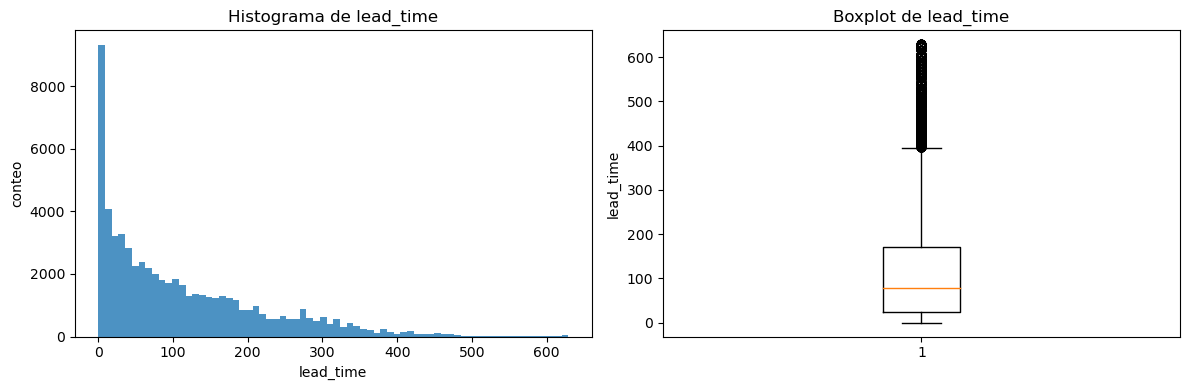

In [1157]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(df['lead_time'], bins = 70 , alpha = 0.8)
ax1.set_xlabel('lead_time')
ax1.set_ylabel('conteo')
ax1.tick_params(axis='y')
ax1.set_title('Histograma de lead_time')

ax2.boxplot(df['lead_time'])
ax2.set_ylabel('lead_time')
ax2.tick_params(axis='y')
ax2.set_title('Boxplot de lead_time')

plt.tight_layout()
plt.show()

Como se puede observar en el gráfico, notamos que las reservas se predisponen a hacer con poca antelación, mas cercana sobre la fecha de arribo al hotel. Ademas, podemos ver que la mayoría de los datos del dataset están dentro del rango intercuartil aproximado entre 25 y 180, tal como podemos ver en los cuartiles del boxplot.

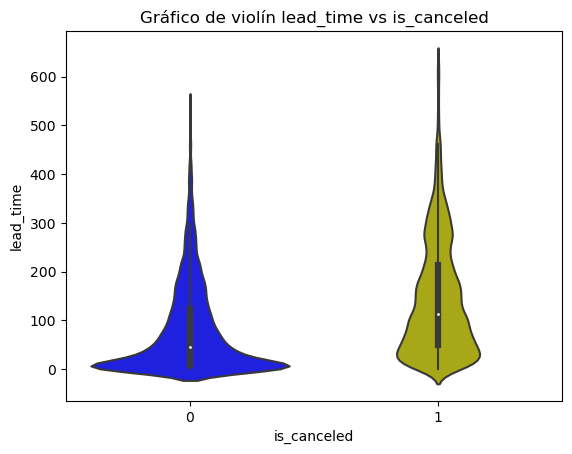

In [1158]:
ax = sns.violinplot(x="is_canceled", y="lead_time", data=df,palette=["b", "y"]).set(title="Gráfico de violín lead_time vs is_canceled",xlabel='is_canceled',ylabel='lead_time') 

Aquí podemos observar cierta tendencia donde las reservas que se hicieron con poca antelación tienen menor probabilidad a ser canceladas. Sin embargo, esto puede estar sesgado ya que la gran mayoría de las reservas se hacen con poca antelación, tal como podemos ver abajo. Por lo tanto, no podemos afirmar que la antelación de la reserva sea un factor determinante para la cancelación de la misma. 

In [1159]:
df[df['lead_time'] < 50].shape

(24014, 31)

##### year

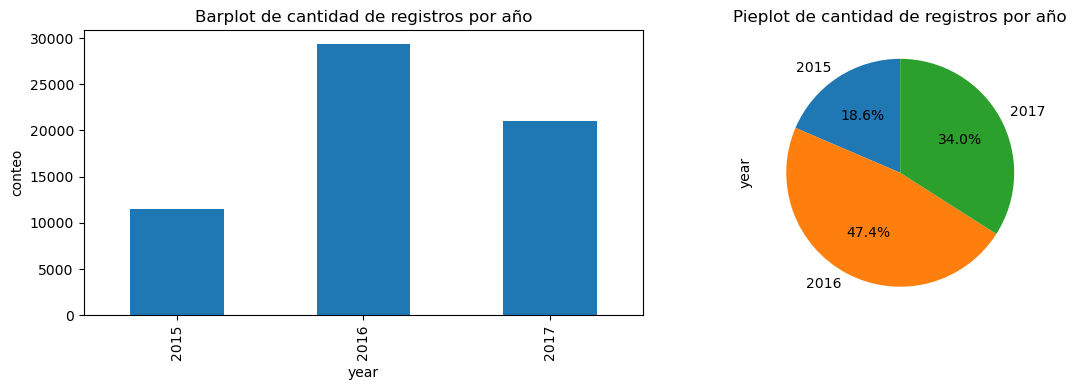

In [1160]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

conteo_years = df['year'].value_counts().sort_index()

conteo_years.plot(kind='bar', ax=ax1)
ax1.set_xlabel('year')
ax1.set_ylabel('conteo')
ax1.set_title('Barplot de cantidad de registros por año')

conteo_years2 = df['year'].value_counts().sort_index().reset_index()
conteo_years2.columns = ['categoría','cantidad']

ax2.pie(conteo_years2['cantidad'], labels=conteo_years2['categoría'], autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('year')
ax2.set_title('Pieplot de cantidad de registros por año')


plt.tight_layout()
plt.show()

Como nos indica el gráfico, el dataset solo contiene registros de los años 2015, 2016 y 2017, siendo el año predominante el 2016.

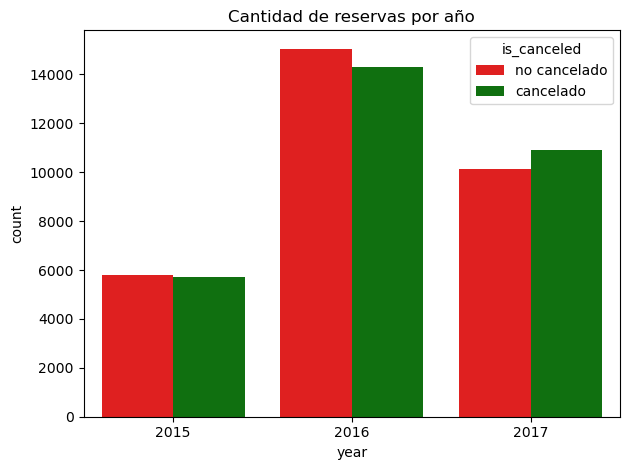

In [1161]:
fig, ax = plt.subplots()
conteo_por_anio = df.groupby(['year', 'is_canceled']).size().unstack(fill_value=0)

ax = sns.countplot(x="year", hue="is_canceled", data=df, palette=["r", "g"])
ax.set_title('Cantidad de reservas por año')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()


A su vez podemos observar que la cantidad de cancelaciones y reservas se mantienen relativamente constantes a lo largo de los años. No podemos determinar cierto patron o anomalía respecto de la variable year a simple vista.

##### week_number

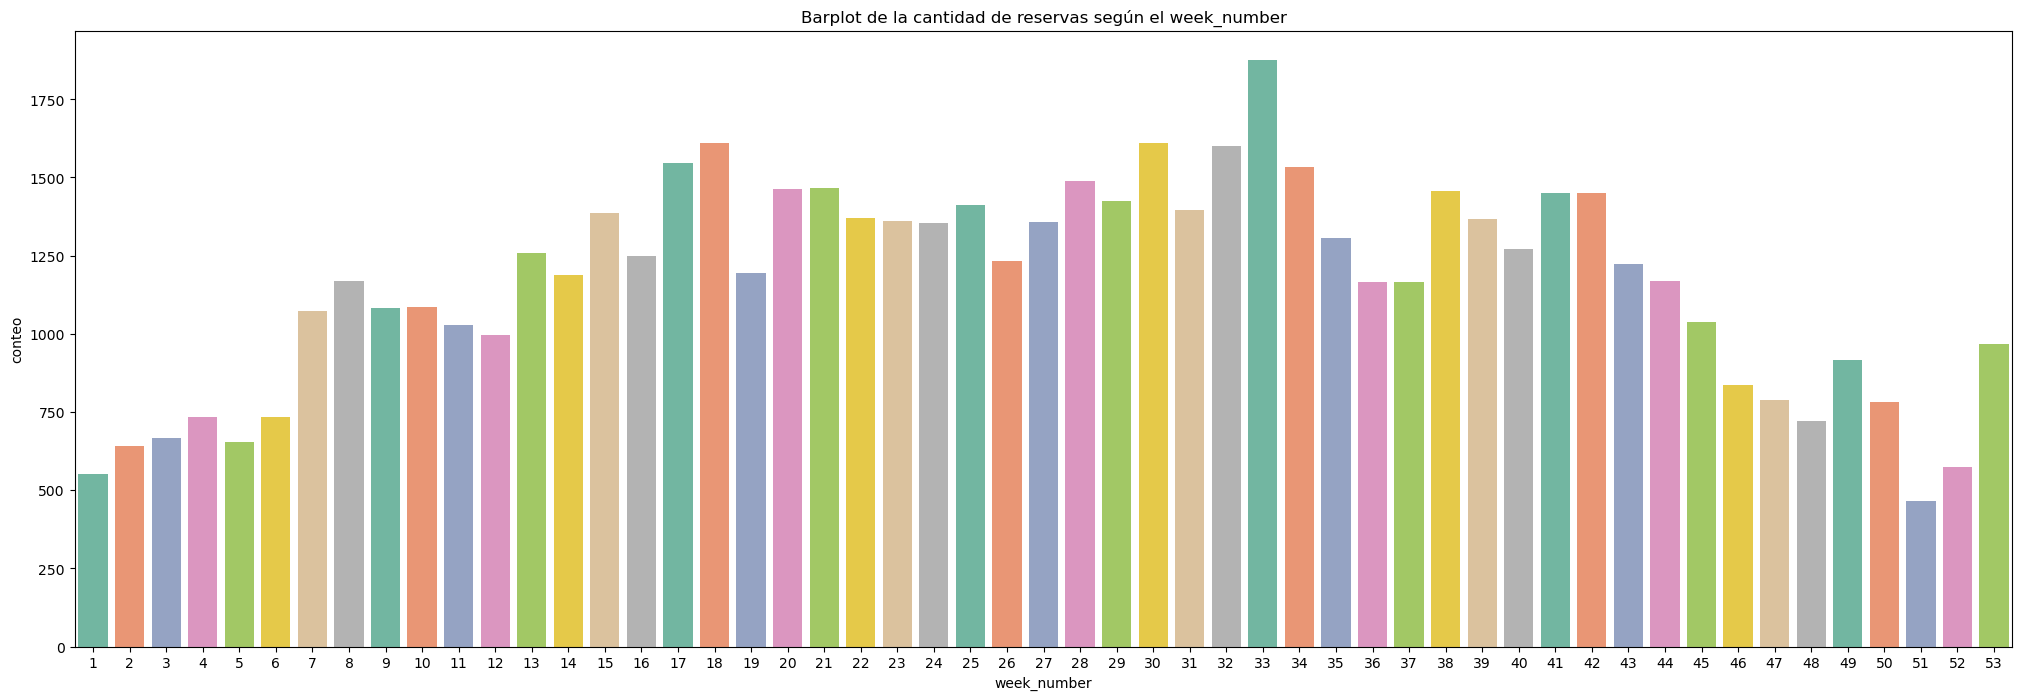

In [1162]:
fig1, ax1 = plt.subplots(1, 1, figsize=(25, 8))

sns.countplot(x = 'week_number', data=df, palette = 'Set2', ax=ax1)
ax1.set_xlabel('week_number')
ax1.set_ylabel('conteo')
ax1.tick_params(axis='y')
ax1.set_title('Barplot de la cantidad de reservas según el week_number')
plt.show()

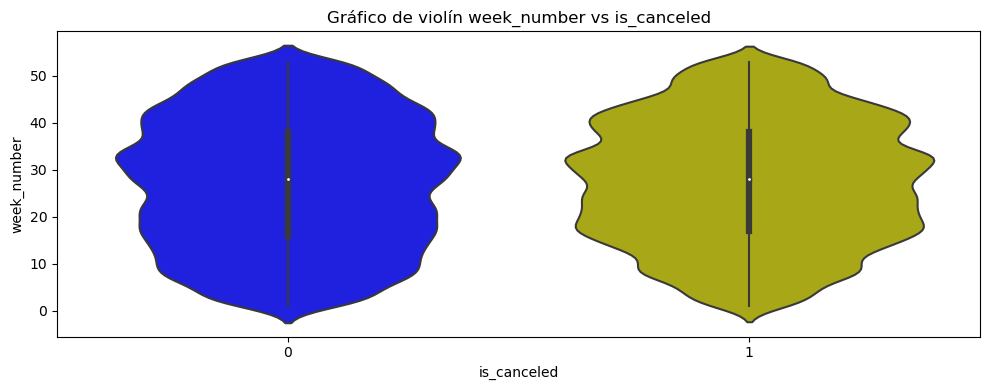

In [1163]:
fig = plt.figure(figsize=(10, 4))
sns.violinplot(x="is_canceled", y="week_number", data=df,palette=["b", "y"]).set(title="Gráfico de violín week_number vs is_canceled",xlabel='is_canceled',ylabel='week_number')
plt.tight_layout()
plt.show()

Podemos notar que la distribución de las reservas y cancelaciones a lo largo de las semanas del año es bastante uniforme, con una leve tendencia a que las reservas se hagan en las semanas 20 a 30, lo cual puede ser razonable ya que es época de vacaciones en el hemisferio norte. Ademas, tampoco encontramos correlación con nuestra variable objetivo ya que el gráfico de violin resulto ser bastante parejo.

In [1164]:
print('Registros de la semana 53:', df[(df['week_number'] == 53)].shape)
print('Registros del 2016 de la semana 53:', df[(df['week_number'] == 53) & (df['year'] == 2016)].shape)

Registros de la semana 53: (969, 31)
Registros del 2016 de la semana 53: (581, 31)


Si bien un año tiene 52 semanas técnicamente, pueden haber ocasiones especiales donde hayan 53, por lo tanto la información es correcta. Ademas, 2016 fue un año bisiesto, por lo tanto, es posible que haya tenido 53 semanas.

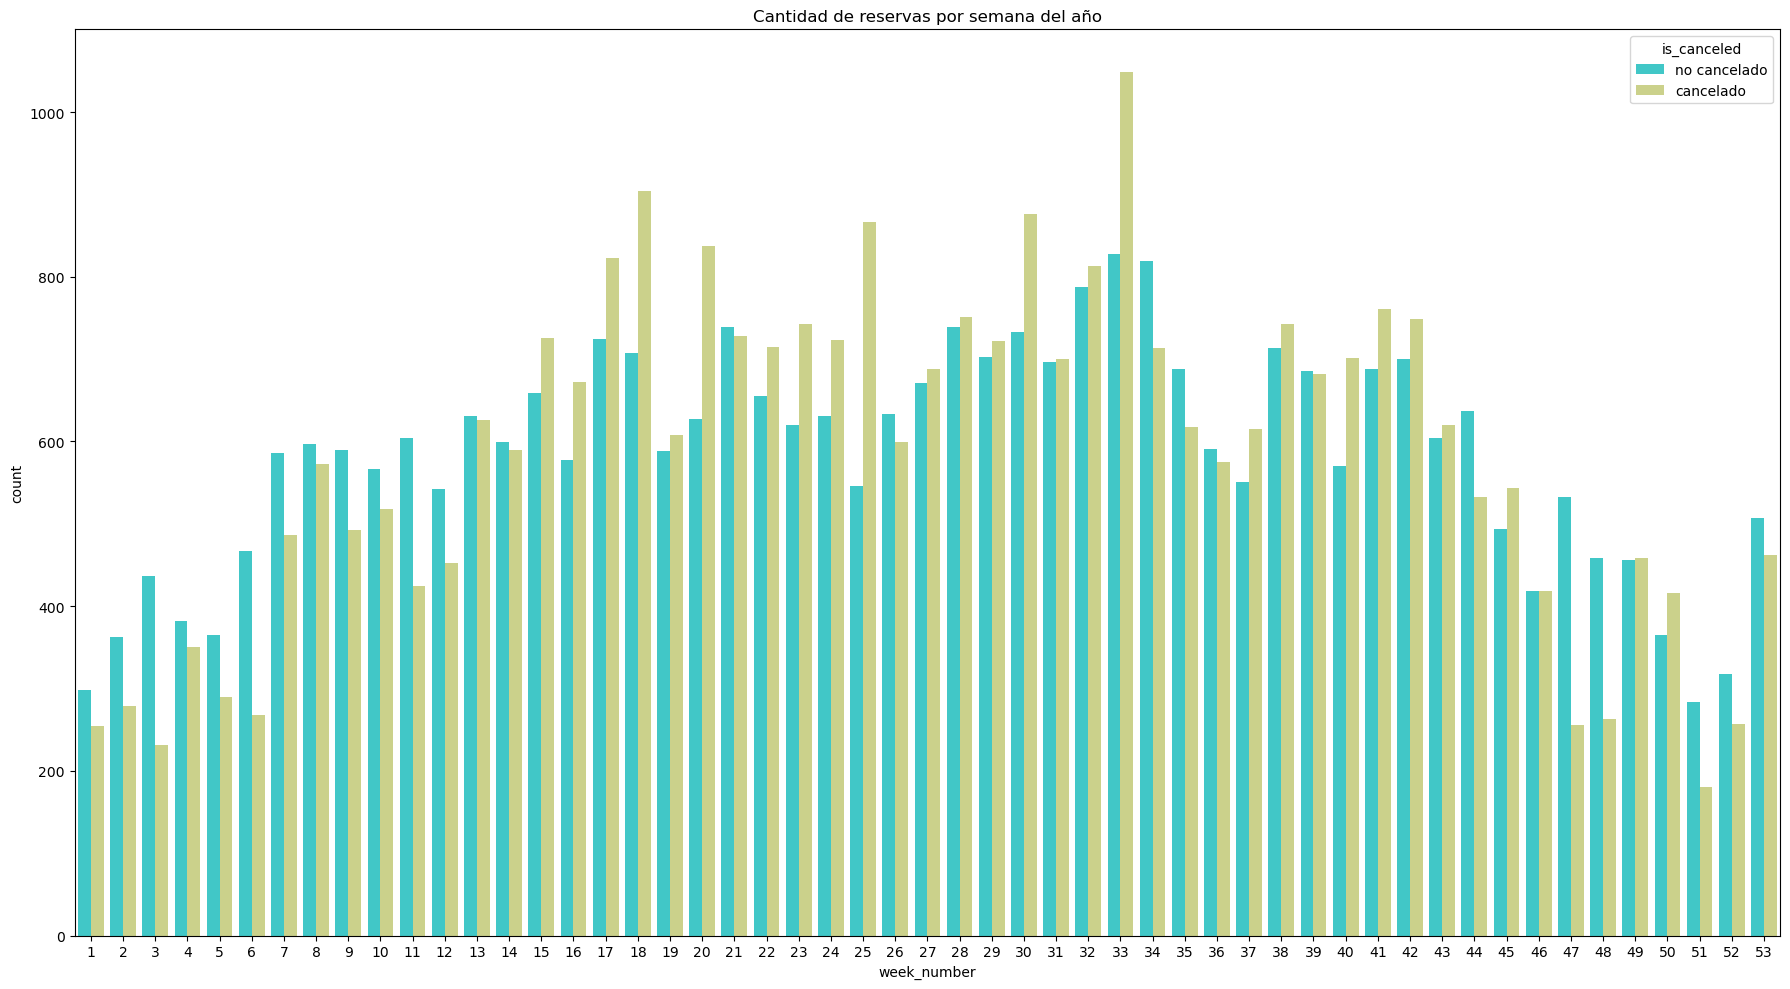

In [1165]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

ax = sns.countplot(x="week_number", hue="is_canceled", data=df, palette = 'rainbow')
ax.set_title('Cantidad de reservas por semana del año')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
ax.legend(title='is_canceled', loc = 'upper left')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()

La distribución es bastante pareja a lo largo de todas las semanas, exceptuando quizás una leve tendencia a cancelar entre la semana 17 y 25, sin embargo, no podemos determinar que la semana del año sea un factor determinante para la cancelación de la reserva.

##### day_of_month

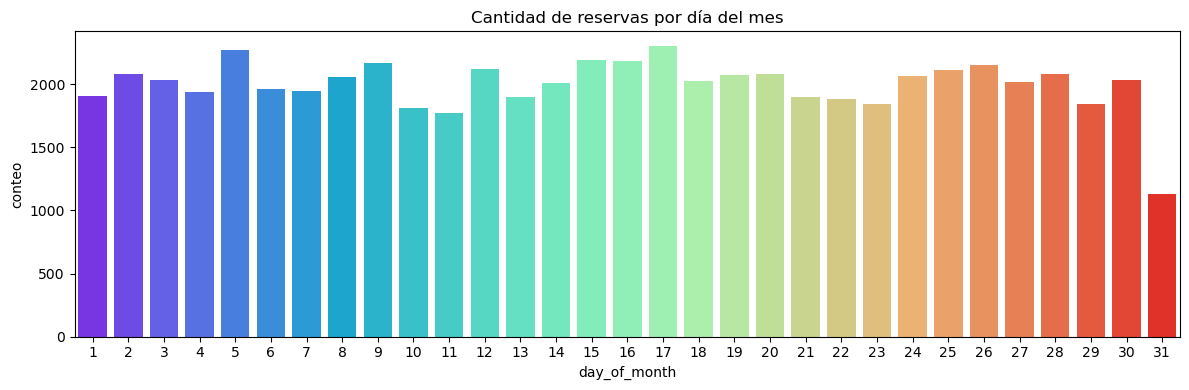

In [1166]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax= sns.countplot(x = 'day_of_month', data=df, palette = 'rainbow')

ax.set_xlabel('day_of_month')
ax.set_ylabel('conteo')
ax.tick_params(axis='y')
ax.set_title('Cantidad de reservas por día del mes')

plt.tight_layout()
plt.show()

Como se puede observar su distribución es prácticamente uniforme, lo cual es esperable ya que no hay ningún motivo por el cual las reservas se hagan mas en un dia que en otro. Esto exceptuando ciertos dias festivos o feriados, pero es una minoría y van variando según el país de origen.

##### stays_in_weekend_nights

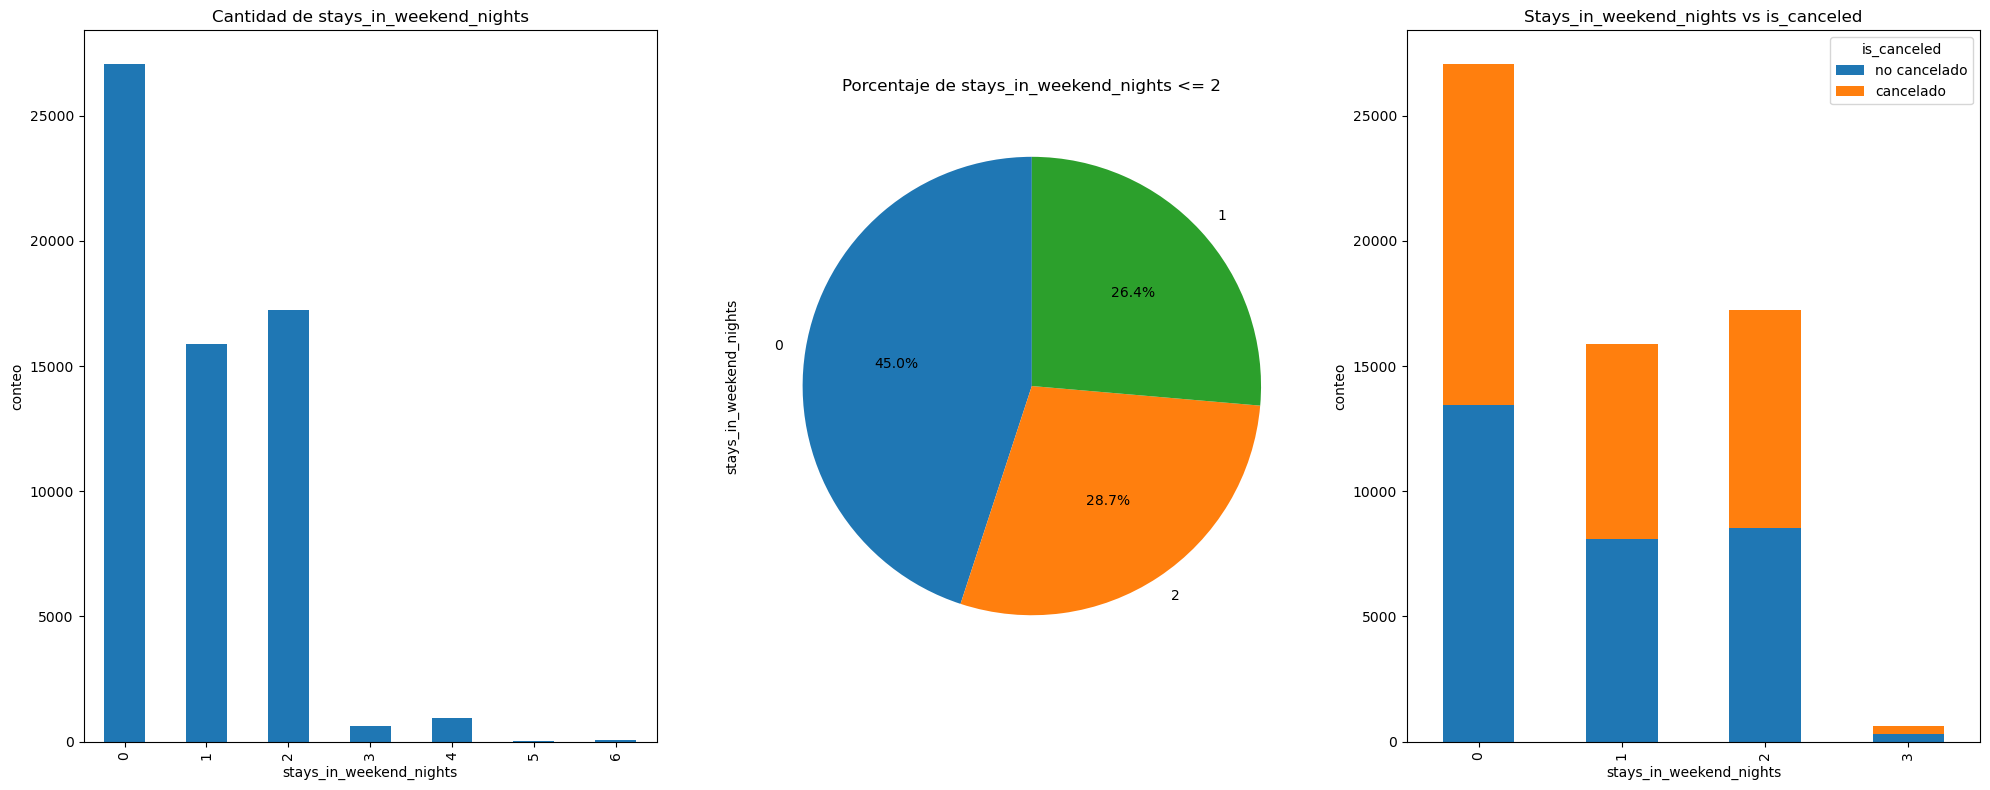

In [1167]:
conteo_weekend = df[df['stays_in_weekend_nights'] < 7]['stays_in_weekend_nights'].value_counts().sort_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

conteo_weekend.plot(kind='bar', ax=ax1)
ax1.set_xlabel('stays_in_weekend_nights')
ax1.set_ylabel('conteo')
ax1.set_title('Cantidad de stays_in_weekend_nights')

conteo_weekend2 = df[df['stays_in_weekend_nights'] <= 2]['stays_in_weekend_nights'].value_counts().reset_index()
conteo_weekend2.columns = ['categoria','conteo']

ax2.pie(conteo_weekend2['conteo'], labels=conteo_weekend2['categoria'], autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('stays_in_weekend_nights')
ax2.set_title('Porcentaje de stays_in_weekend_nights <= 2')

df_filtrado = df[df['stays_in_weekend_nights'] < 4]
conteo_weekend_filtrado = df_filtrado.groupby(['stays_in_weekend_nights', 'is_canceled']).size().unstack(fill_value=0)

conteo_weekend_filtrado.plot(kind='bar', stacked=True, ax=ax3)

ax3.set_xlabel('stays_in_weekend_nights')
ax3.set_ylabel('conteo')
ax3.set_title('Stays_in_weekend_nights vs is_canceled')

plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])

plt.tight_layout()
plt.show()

Con estos gráficos nos damos cuenta que existe una tendencia a que las reservas no se hagan para fines de semana. Esto suena raro ya que la mayoría de las personas trabajan de lunes a viernes, por lo tanto, es mas probable que quieran ir a un hotel en el fin de semana.
Por otro lado, en el tercer gráfico tenemos la comparación de los cancelados y no cancelados, donde podemos ver que la distribución es bastante similar.

##### adults and children

Vamos a analizar gráficamente ambos juntos ya que creemos que pueden tener cierta relación entre ellos.

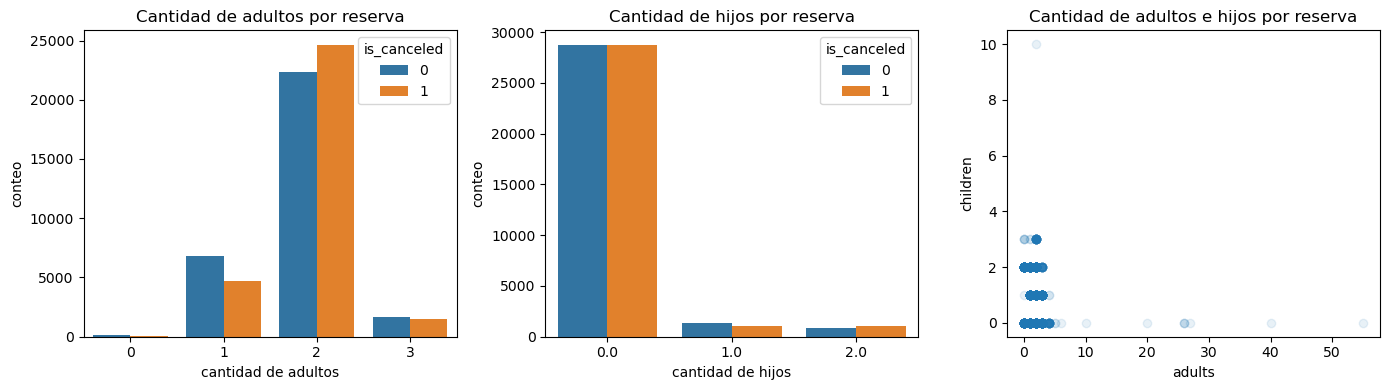

In [1168]:
adultos = df['adults'].value_counts().sort_index()
adultos_filtrado = df[df['adults'] < 4]
children =  df['children'].value_counts().sort_index()
children_filtrado = df[df['children'] < 3]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

sns.countplot(x="adults", data = adultos_filtrado, ax=ax1, hue = 'is_canceled')
ax1.set_xlabel('cantidad de adultos')
ax1.set_ylabel('conteo')
ax1.set_title('Cantidad de adultos por reserva')

sns.countplot(x="children", data = children_filtrado, ax=ax2, hue = 'is_canceled')
ax2.set_xlabel('cantidad de hijos')
ax2.set_ylabel('conteo')
ax2.set_title('Cantidad de hijos por reserva')

children_adultos_sin_nulos = df[['children','adults']].dropna()


ax3.scatter(children_adultos_sin_nulos['adults'], children_adultos_sin_nulos['children'], alpha = 0.1)
ax3.set_xlabel('adults')
ax3.set_ylabel('children')
ax3.set_title('Cantidad de adultos e hijos por reserva')

plt.tight_layout()
plt.show()

Antes de hacer los gráficos decidimos filtrar el dataset para solo graficar los valores mas importantes.
Se puede ver que la gran mayoría de reservas de hotel son hechas por parejas. Ademas, nos damos cuenta que la mayoría de las reservas no tienen hijos.

In [1169]:
sin_adultos = df[df['adults'] == 0]
sin_adultos.head()

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled
96,City Hotel,23,2016,May,21,21,2,4,0,2.0,0,BB,IND,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,128.49,0,0,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1
212,City Hotel,315,2017,July,27,7,0,1,0,2.0,0,BB,USA,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,91.85,0,2,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1
270,City Hotel,4,2017,February,8,21,0,3,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,0.00,0,0,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1
326,City Hotel,53,2016,November,49,29,0,4,0,2.0,0,BB,ROU,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9.0,NaN,0,Transient,77.86,0,2,74fe3153-e2ae-4650-a375-05fc52881a56,0
464,City Hotel,64,2015,October,42,16,2,3,0,0.0,0,SC,FRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,50.0,NaN,0,Transient-Party,0.00,0,0,cfe370c2-298a-4de8-82fd-f8d418febd7f,0


Aca tenemos otro inconveniente para resolver mas tarde, ya que no puede haber reservas sin adultos, y aun mas, sin personas.

##### babies

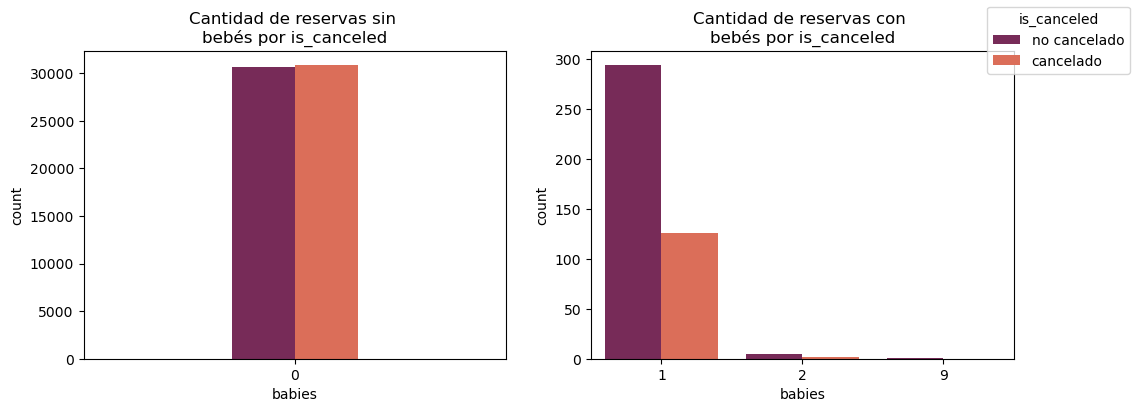

In [1170]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x="babies", hue="is_canceled", data=df[df['babies'] == 0], palette="rocket", ax=ax1, width=0.3)
ax1.set_title('Cantidad de reservas sin \nbebés por is_canceled')

sns.countplot(x="babies", hue="is_canceled", data=df[df['babies'] > 0], palette="rocket", ax=ax2)
ax2.set_title('Cantidad de reservas con \nbebés por is_canceled')

fig.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
ax1.legend([],[],frameon=False)
ax2.legend([],[],frameon=False)
plt.show()

A simple vista podemos observar que la cantidad de bebes es en su mayoría 0 ó 1. Decidimos separar los datos en dos grupos para poder analizarlos mejor, ya que la cantidad de reservas con 0 bebes era mucho mayor. Los datos sobre 0 bebes no dicen mucho aunque si miramos el gráfico de la derecha podemos ver que la cantidad de cancelaciones es levemente menor cuando hay reservas con bebes.

##### previous_cancellations

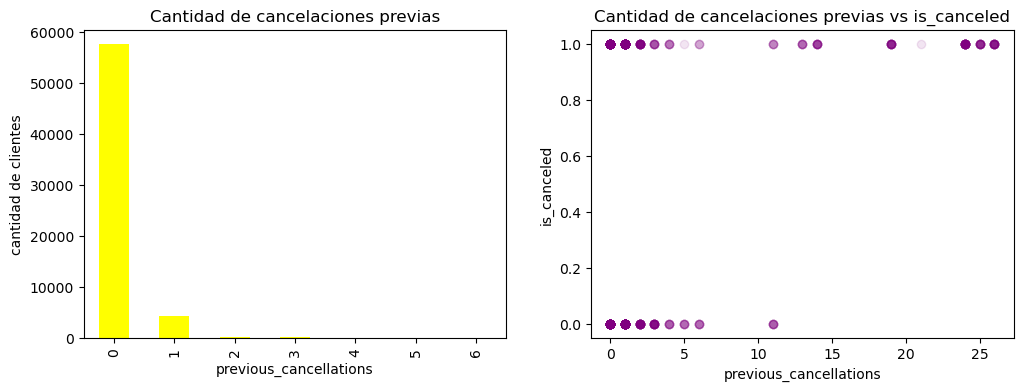

In [1171]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

previous_cancellations_acotado = df[df['previous_cancellations'] < 10]
previous_cancellations_acotado_cantidad = previous_cancellations_acotado['previous_cancellations'].value_counts().sort_index()

previous_cancellations_acotado_cantidad.plot(kind='bar', ax=ax1, color = 'yellow')
ax1.set_xlabel('previous_cancellations')
ax1.set_ylabel('cantidad de clientes')
ax1.set_title('Cantidad de cancelaciones previas')

ax2.scatter(df['previous_cancellations'], df['is_canceled'], alpha = 0.1, color = 'purple')
ax2.set_xlabel('previous_cancellations')
ax2.set_ylabel('is_canceled')
ax2.set_title('Cantidad de cancelaciones previas vs is_canceled')

plt.show()

Como es de esperarse la mayoría de clientes no tienen cancelaciones previas, decidimos realizar un filtrado de la cantidad de cancelaciones previas para mejorar la visualización de los datos. Sin embargo aquellos que tienen aproximadamente mas de 10 cancelaciones previas, como podemos observar en el scatter plot casi siempre cancelan la reserva. De aquí podríamos realizar en un futuro una regresión logística para predecir si un cliente va a cancelar su reserva. 

##### previous_bookings_not_canceled

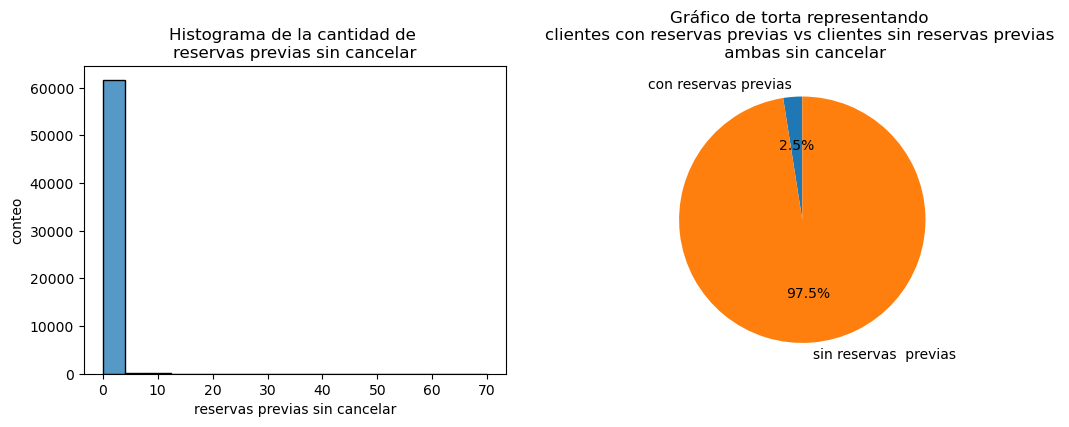

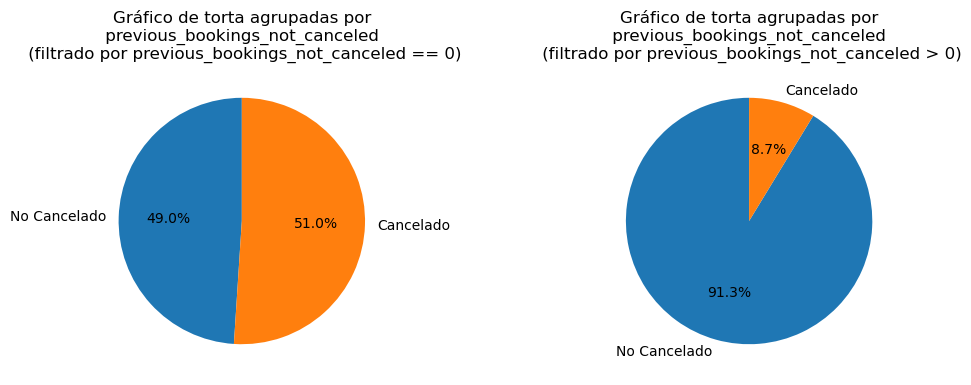

In [1172]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 4))

cantidad_cero = df[df['previous_bookings_not_canceled'] == 0].reset_index()
cantidad_mayor_a_0 = df[df['previous_bookings_not_canceled'] > 0].reset_index()



sns.histplot(data=df, x='previous_bookings_not_canceled', ax=ax1,)
ax1.set_xlabel('reservas previas sin cancelar')
ax1.set_ylabel('conteo')
ax1.set_title('Histograma de la cantidad de \nreservas previas sin cancelar')

conteo_reservas_cero = cantidad_cero["previous_bookings_not_canceled"].value_counts().sort_index().reset_index()
conteo_reservas_mas_de_cero = cantidad_mayor_a_0["previous_bookings_not_canceled"].value_counts().sort_index().reset_index()
conteo_reservas_cero["categoria"] = "sin reservas  previas"
conteo_reservas_mas_de_cero["categoria"] = "con reservas previas"


conteo_reservas = pd.concat([conteo_reservas_cero, conteo_reservas_mas_de_cero]).groupby('categoria').sum().reset_index()
ax2.pie(conteo_reservas['previous_bookings_not_canceled'], labels=conteo_reservas['categoria'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Gráfico de torta representando \nclientes con reservas previas vs clientes sin reservas previas \n ambas sin cancelar')

conteo_cancelados_cero = cantidad_cero["is_canceled"].value_counts().sort_index().reset_index()
conteo_cancelados_cero.columns = ['categoria','cantidad']
conteo_cancelados_cero['categoria'] = conteo_cancelados_cero['categoria'].apply(lambda x: 'No Cancelado' if x == 0 else 'Cancelado')
ax3.pie(conteo_cancelados_cero['cantidad'], labels=conteo_cancelados_cero['categoria'], autopct='%1.1f%%', startangle=90)
ax3.set_title('Gráfico de torta agrupadas por\n previous_bookings_not_canceled \n (filtrado por previous_bookings_not_canceled == 0)')


conteo_cancelados_mayor_a_0 = cantidad_mayor_a_0["is_canceled"].value_counts().sort_index().reset_index()
conteo_cancelados_mayor_a_0.columns = ['categoria','cantidad']
conteo_cancelados_mayor_a_0['categoria'] = conteo_cancelados_mayor_a_0['categoria'].apply(lambda x: 'No Cancelado' if x == 0 else 'Cancelado')
ax4.pie(conteo_cancelados_mayor_a_0['cantidad'], labels=conteo_cancelados_mayor_a_0['categoria'], autopct='%1.1f%%', startangle=90)
ax4.set_title('Gráfico de torta agrupadas por\n previous_bookings_not_canceled \n (filtrado por previous_bookings_not_canceled > 0)')


plt.show()

Al observar el primer gráfico podemos diferenciar que en su mayoría los clientes no tienen reservas previas no canceladas. En el segundo gráfico partimos los datos en dos, uno donde esta la mayoría de la población, que representa al grupo donde no había reservas previas donde, es casi uniforme la distribución entre cancelaciones. A la hora de analizar el segundo grupo, hay una tendencia a no cancelar si tiene reservas previas no canceladas. Sin embargo cabe recalcar que este ultimo grupo es mucho menor comparado al anterior

##### booking_changes

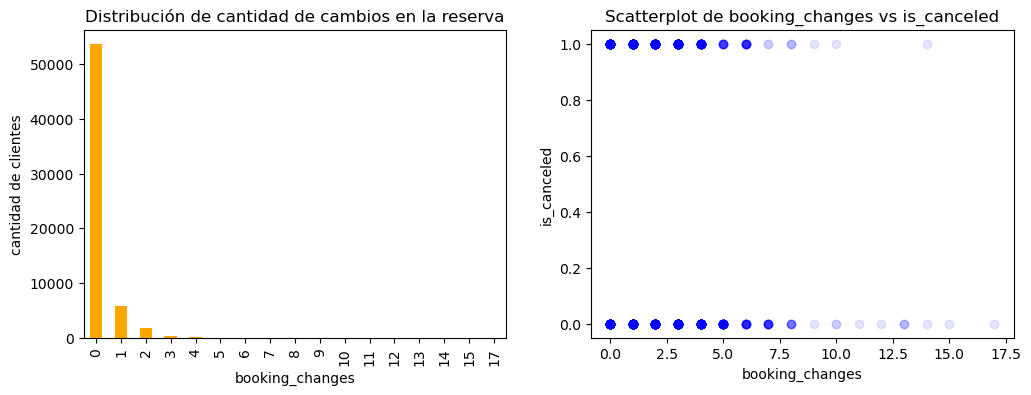

In [1173]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

booking_changes_cantidad = df['booking_changes'].value_counts().sort_index()

booking_changes_cantidad.plot(kind='bar', ax=ax1, color = "orange")
ax1.set_xlabel('booking_changes')
ax1.set_ylabel('cantidad de clientes')
ax1.set_title('Distribución de cantidad de cambios en la reserva')


ax2.scatter(df['booking_changes'], df['is_canceled'], alpha = 0.1, color = "blue")
ax2.set_xlabel('booking_changes')
ax2.set_ylabel('is_canceled')
ax2.set_title('Scatterplot de booking_changes vs is_canceled')

plt.show()

La distribución es de esperar ya que en su mayoría no se realizan cambios de reserva. De todas formas se observa cierta tendencia a mantener la reserva si es que se realizaron cambios. De nuevo podríamos obtener un predictor con una regresión logística.

##### days_in_waiting_list

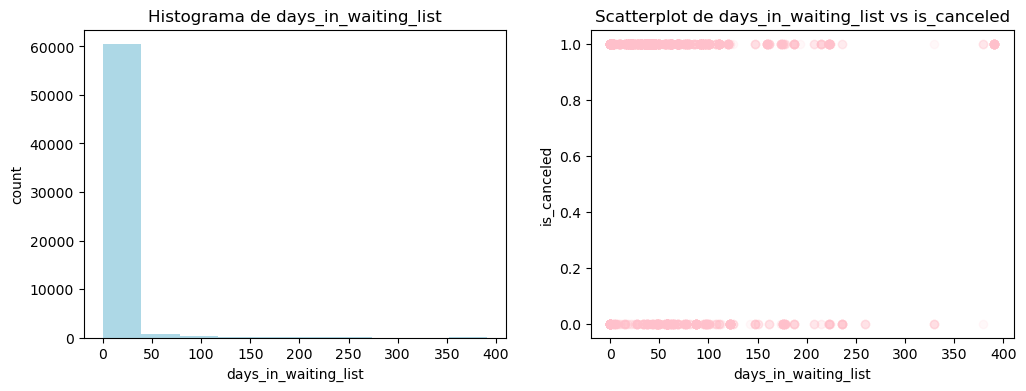

In [1174]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


df['days_in_waiting_list'].plot(kind='hist', ax=ax1, color = "lightblue")
ax1.set_xlabel('days_in_waiting_list')
ax1.set_ylabel('count')
ax1.set_title('Histograma de days_in_waiting_list')

ax2.scatter(df['days_in_waiting_list'], df['is_canceled'], alpha = 0.1, color = "pink")
ax2.set_xlabel('days_in_waiting_list')
ax2.set_ylabel('is_canceled')
ax2.set_title('Scatterplot de days_in_waiting_list vs is_canceled')

plt.show()

Como podemos observar en la distribucion, en su mayoria las reservas se resuelven dentro de los primeros 40 dias de haber realizado la reserva. Ademas en el scatter plot no podemos ver ninguna correlacion con las cancelaciones a priori

##### required_car_parking_spaces

Text(0.5, 1.0, 'Gráfico de torta agrupadas por\n required_car_parking_spaces \n (filtrado por required_car_parking_spaces = 0)')

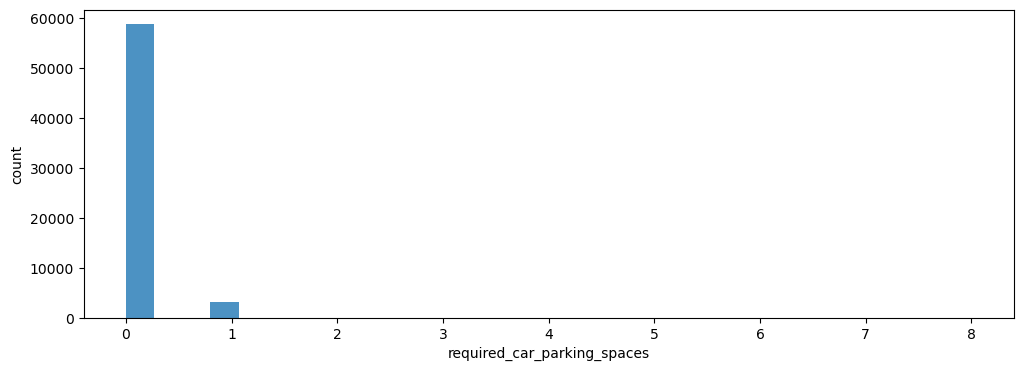

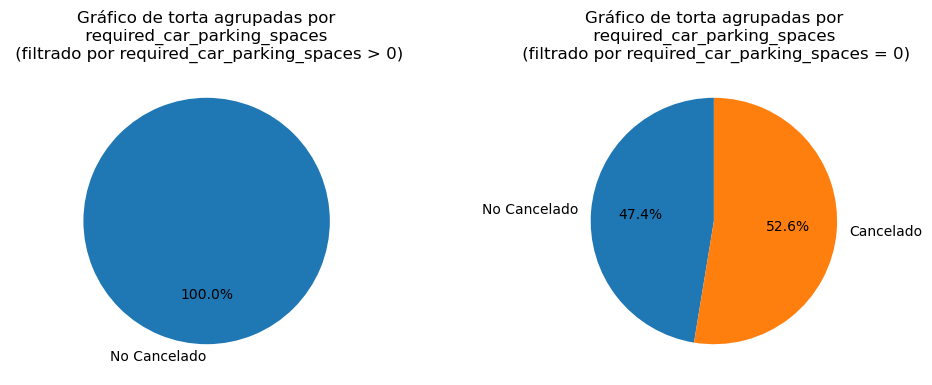

In [1175]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
fig2,  (ax2, ax3) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(df['required_car_parking_spaces'], bins = 30 , alpha = 0.8)
ax1.set_xlabel('required_car_parking_spaces')
ax1.set_ylabel('count')


conteo_requiere_espacio = df[df["required_car_parking_spaces"] > 0]["is_canceled"].value_counts().sort_index().reset_index()
conteo_requiere_espacio.columns = ['categoria','cantidad']
conteo_requiere_espacio['categoria'] = conteo_requiere_espacio['categoria'].apply(lambda x: 'No Cancelado' if x == 0 else 'Cancelado')
ax2.pie(conteo_requiere_espacio['cantidad'], labels=conteo_requiere_espacio['categoria'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Gráfico de torta agrupadas por\n required_car_parking_spaces \n (filtrado por required_car_parking_spaces > 0)')


conteo_no_requiere_espacio = df[df["required_car_parking_spaces"] == 0]["is_canceled"].value_counts().sort_index().reset_index()
conteo_no_requiere_espacio.columns = ['categoria','cantidad']
conteo_no_requiere_espacio['categoria'] = conteo_no_requiere_espacio['categoria'].apply(lambda x: 'No Cancelado' if x == 0 else 'Cancelado')
ax3.pie(conteo_no_requiere_espacio['cantidad'], labels=conteo_no_requiere_espacio['categoria'], autopct='%1.1f%%', startangle=90)
ax3.set_title('Gráfico de torta agrupadas por\n required_car_parking_spaces \n (filtrado por required_car_parking_spaces = 0)')


A pesar que la mayoría de la población se encuentra en el grupo donde no se requiere ningún estacionamiento, y dentro de ese grupo de distribuyen uniformemente entre los cancelados y no cancelados, podemos observar que en el grupo donde se requiere un estacionamiento, la mayoría de las reservas no se cancelan. Sin embargo hay que tener en consideración que este grupo es mucho menor comparado al anterior.

##### total_of_special_requests

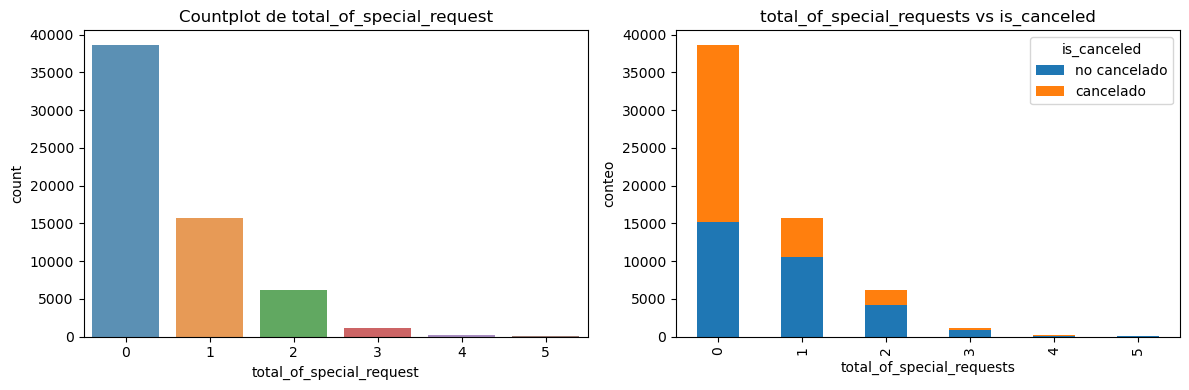

In [1176]:
fig2,  (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


sns.countplot(data=df,x='total_of_special_requests' ,alpha = 0.8, ax =ax1)
ax1.set_xlabel('total_of_special_request')
ax1.set_ylabel('count')
ax1.set_title('Countplot de total_of_special_request')

conteo_special_requests = df.groupby(['total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)

conteo_special_requests.plot(kind='bar', stacked=True, ax=ax2)

ax2.set_xlabel('total_of_special_requests')
ax2.set_ylabel('conteo')
ax2.set_title('total_of_special_requests vs is_canceled')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()

Podemos notar como en su mayoría las reservas no tienden a tener pedidos especiales, y la cantidad decrece exponencialmente a medida que aumentan los pedidos especiales. De todas formas podemos observar que en los grupos con pedidos especiales suele haber menos cancelaciones.

##### average_daily_rate

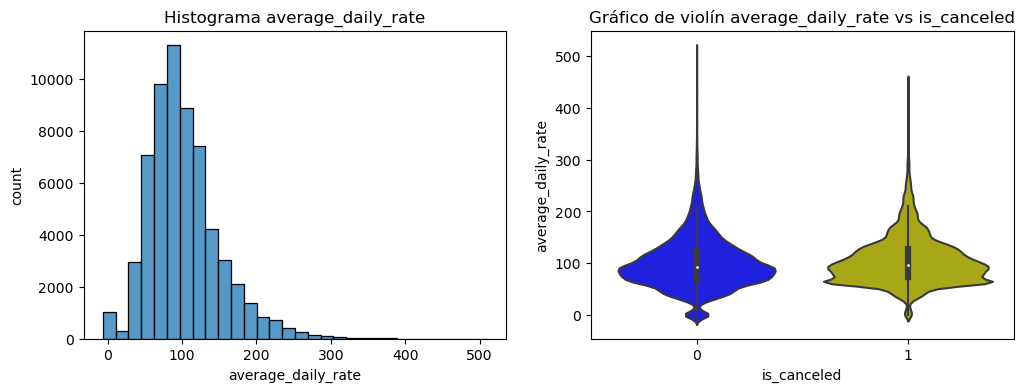

In [1177]:
fig2,  (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x='average_daily_rate', ax=ax1, bins=30).set(title="Histograma average_daily_rate",xlabel='average_daily_rate',ylabel='count')
ax1.set_xlabel('average_daily_rate')
ax1.set_ylabel('count')


ax2 = sns.violinplot(x="is_canceled", y="average_daily_rate", data=df,palette=["b", "y"]).set(title="Gráfico de violín average_daily_rate vs is_canceled",xlabel='is_canceled',ylabel='average_daily_rate') 

Con estos gráfico podríamos deducir que el average_daily_rate tiene una distribución que se asemeja a una normal o una gamma.
También podemos observar que no hay una tendencia marcada entre las cancelaciones y el average_daily_rate, salvo cuando el mismo tiene valores muy altos, donde no se cancelan.

#### Cualitativas

Por otro lado, con las variables cualitativas analizamos los diversos valores que pueden tomar, junto con la frecuencia que tomo cada valor y su respectivo porcentaje del total.

In [1178]:
columnas_cualitativas = df[[
  "hotel",
  "meal_type",
  "country",
  "market_segment",
  "distribution_channel",
  "reserved_room_type",
  "assigned_room_type",
  "deposit_type",
  "agent_id",
  "company",
  "customer_type",
  "is_canceled",
  "is_repeated_guest"
]]

tablas_de_frecuencia = {}

for columna in columnas_cualitativas.columns:
    frecuencia = df[columna].value_counts().reset_index()
    frecuencia.columns = ['Categoría', 'Frecuencia']
    frecuencia['Porcentaje'] = round(frecuencia['Frecuencia'] / df[columna].count() * 100, 2)
    tablas_de_frecuencia[columna] = frecuencia

for columna, tabla in tablas_de_frecuencia.items():
    print(f"Tabla de Frecuencias para '{columna}':")
    display(tabla)
    print("\n")

Tabla de Frecuencias para 'hotel':


,Categoría,Frecuencia,Porcentaje
0,City Hotel,42129,68.05
1,Resort Hotel,19784,31.95




Tabla de Frecuencias para 'meal_type':


,Categoría,Frecuencia,Porcentaje
0,BB,47837,77.26
1,HB,7452,12.04
2,SC,5556,8.97
3,Undefined,591,0.95
4,FB,477,0.77




Tabla de Frecuencias para 'country':


,Categoría,Frecuencia,Porcentaje
0,PRT,27950,45.31
1,GBR,5733,9.29
2,FRA,4809,7.80
3,ESP,4210,6.82
4,DEU,3312,5.37
...,...,...,...
144,HND,1,0.00
145,FJI,1,0.00
146,LIE,1,0.00
147,ATA,1,0.00




Tabla de Frecuencias para 'market_segment':


,Categoría,Frecuencia,Porcentaje
0,Online TA,29269,47.27
1,Offline TA/TO,12384,20.00
2,Groups,11545,18.65
3,Direct,5757,9.30
4,Corporate,2484,4.01
5,Complementary,359,0.58
6,Aviation,113,0.18
7,Undefined,2,0.00




Tabla de Frecuencias para 'distribution_channel':


,Categoría,Frecuencia,Porcentaje
0,TA/TO,51849,83.74
1,Direct,6799,10.98
2,Corporate,3172,5.12
3,GDS,89,0.14
4,Undefined,4,0.01




Tabla de Frecuencias para 'reserved_room_type':


,Categoría,Frecuencia,Porcentaje
0,A,45134,72.90
1,D,9585,15.48
2,E,3249,5.25
3,F,1451,2.34
4,G,1090,1.76
5,B,580,0.94
6,C,482,0.78
7,H,334,0.54
8,P,7,0.01
9,L,1,0.00




Tabla de Frecuencias para 'assigned_room_type':


,Categoría,Frecuencia,Porcentaje
0,A,40007,64.62
1,D,12190,19.69
2,E,3779,6.10
3,F,1821,2.94
4,G,1277,2.06
5,C,1127,1.82
6,B,1056,1.71
7,H,384,0.62
8,I,145,0.23
9,K,119,0.19




Tabla de Frecuencias para 'deposit_type':


,Categoría,Frecuencia,Porcentaje
0,No Deposit,51685,83.48
1,Non Refund,10150,16.39
2,Refundable,78,0.13




Tabla de Frecuencias para 'agent_id':


,Categoría,Frecuencia,Porcentaje
0,9.0,17004,31.48
1,240.0,7386,13.67
2,1.0,4424,8.19
3,14.0,1700,3.15
4,6.0,1639,3.03
...,...,...,...
291,420.0,1,0.00
292,352.0,1,0.00
293,450.0,1,0.00
294,283.0,1,0.00




Tabla de Frecuencias para 'company':


,Categoría,Frecuencia,Porcentaje
0,40.0,390,12.37
1,223.0,364,11.55
2,67.0,169,5.36
3,45.0,118,3.74
4,153.0,106,3.36
...,...,...,...
271,305.0,1,0.03
272,275.0,1,0.03
273,461.0,1,0.03
274,220.0,1,0.03




Tabla de Frecuencias para 'customer_type':


,Categoría,Frecuencia,Porcentaje
0,Transient,47449,76.64
1,Transient-Party,12168,19.65
2,Contract,2033,3.28
3,Group,263,0.42




Tabla de Frecuencias para 'is_canceled':


,Categoría,Frecuencia,Porcentaje
0,0,30972,50.03
1,1,30941,49.97




Tabla de Frecuencias para 'is_repeated_guest':


,Categoría,Frecuencia,Porcentaje
0,0,60180,97.2
1,1,1733,2.8


A continuación vamos a analizar gráficamente las variables mas relevantes dentro de las categóricas.

##### Hotel

Como sabemos, solo hay dos opciones de hotel en todo el dataset, donde la opción de City Hotel es ampliamente mas reservada que la opción de Resort Hotel. Es por esto que realizar un gráfico no va a aportar mucha información extra.

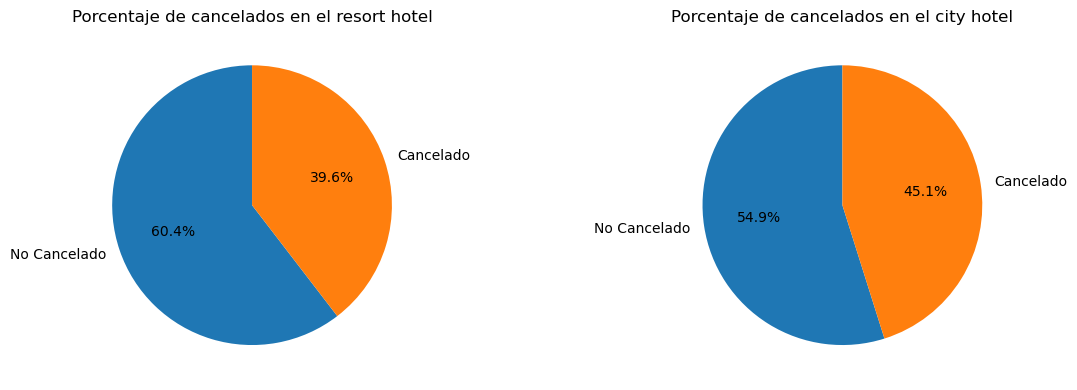

In [1179]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

resort_hotel = df[df['hotel'] == 'Resort Hotel']['is_canceled'].value_counts().reset_index()
resort_hotel.columns = ['is_canceled', 'cantidad']
resort_hotel['is_canceled'][0] = 'No Cancelado'
resort_hotel['is_canceled'][1] = 'Cancelado'
ax1.pie(resort_hotel['cantidad'], labels=resort_hotel['is_canceled'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Porcentaje de cancelados en el resort hotel')

city_hotel = df[df['hotel'] == 'City Hotel']['is_canceled'].value_counts().reset_index()
city_hotel.columns = ['is_canceled', 'cantidad']
city_hotel['is_canceled'][0] = 'No Cancelado'
city_hotel['is_canceled'][1] = 'Cancelado'
ax2.pie(city_hotel['cantidad'], labels=city_hotel['is_canceled'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Porcentaje de cancelados en el city hotel')

plt.tight_layout()
plt.show()

Ademas, podemos observar que se suelen realizar mas cancelaciones en el City Hotel que en el resort hotel, sin embargo, esto puede deberse a que hay mas reservas en el city hotel.

##### meal_type

SC y undefined significa lo mismo, o sea, que no tiene meal. Es por esto que decidimos unificarlos en un solo grupo en el primer gráfico. En el segundo gráfico no lo unimos porque tendríamos que alterar el dataset original. Esta tarea seguro la hagamos mas tarde cuando hagamos el análisis de datos faltantes y outliers.

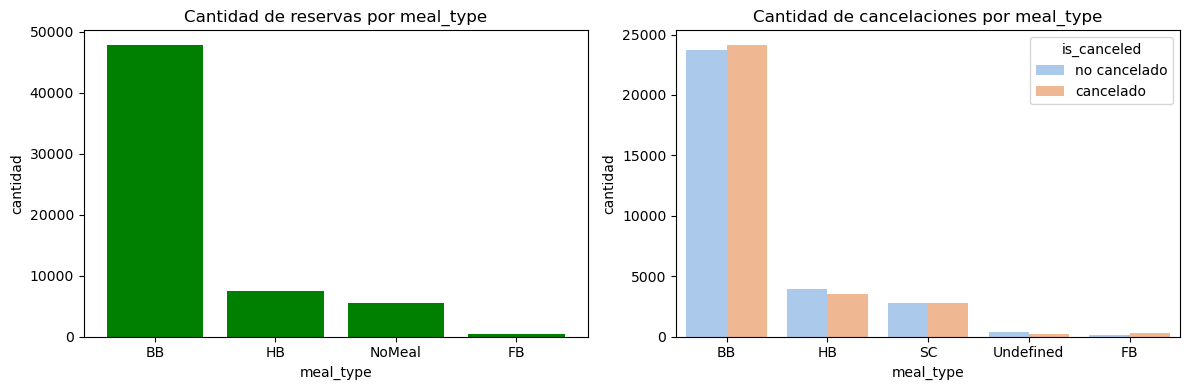

In [1180]:
meal_type = df[['meal_type']].value_counts().reset_index()
meal_type.columns = ['meal_type', 'cantidad']
meal_type['meal_type'].replace(['SC', 'Undefined'], 'NoMeal', inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(meal_type['meal_type'], meal_type['cantidad'], color = 'green')
ax1.set_xlabel('meal_type')
ax1.set_ylabel('cantidad')
ax1.set_title('Cantidad de reservas por meal_type')

ax2 = sns.countplot(x="meal_type", hue="is_canceled", data=df, palette = 'pastel').set(title="Cantidad de cancelaciones por meal_type",xlabel='meal_type',ylabel='cantidad')

plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout() 
plt.show()

Se nota una gran tendencia a reservar con el meal_type de bed and breakfast, y en segundo lugar el de half board parejo con el no meal packages. Sin embargo, no podemos observar una tendencia clara entre las cancelaciones y el meal_type.

##### country

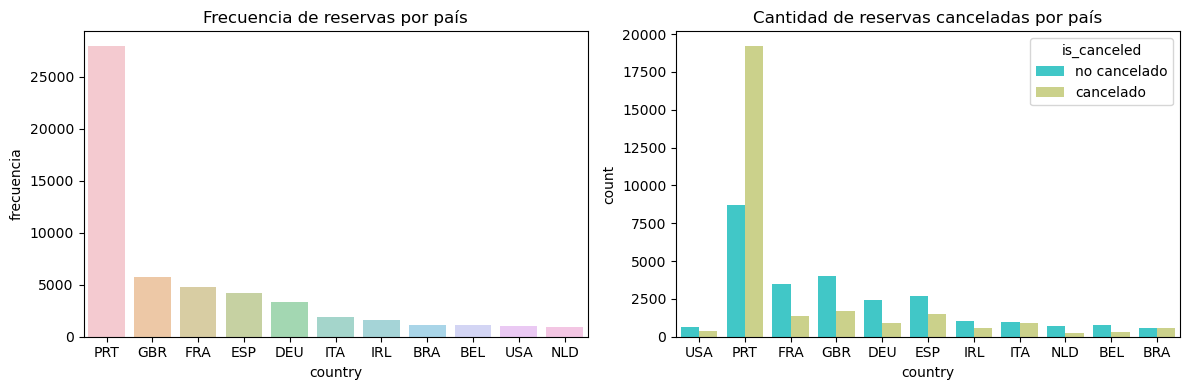

In [1181]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

paises = df[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 900]
sns.barplot(x='country', y='cantidad', data=paises_mayoritarios, alpha=0.5, ax = ax1).set(title="Frecuencia de reservas por país",ylabel='frecuencia',xlabel='country')

df_filtrado = df[df['country'].isin(paises_mayoritarios['country'])]
sns.countplot(x="country", hue="is_canceled", data=df_filtrado, palette="rainbow", ax=ax2)
ax2.set_title('Cantidad de reservas canceladas por país')

plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()


Aca si encontramos dos grandes patrones, y ambos se deben a la misma razón. El primero es que la gran mayoría de las reservas provienen de países europeos. El segundo patron es que las reservas de personas provenientes de Portugal son canceladas bastante mas seguido. La razón que le podemos dar a esto es que, si bien en el paper no especifica bien la localización de los hoteles (no encontramos info), podemos asumir que los hoteles están en Portugal, ya que los institutos que realizaron el paper son provenientes de Portugal.

##### market_segment

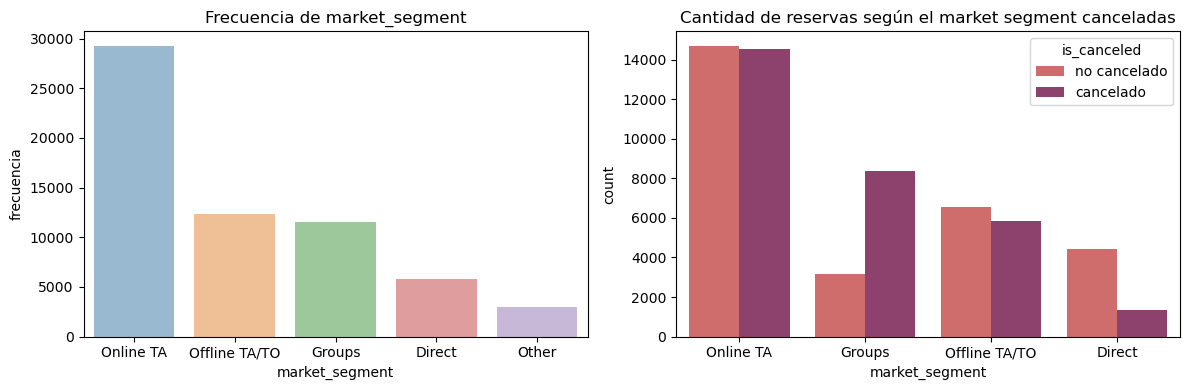

In [1182]:
market_segment = df['market_segment'].value_counts().reset_index()
market_segment.columns = ['market_segment', 'cantidad']

cantidad = market_segment[market_segment['cantidad'] < 2500]['cantidad'].sum()
market_segment.drop(market_segment[market_segment['cantidad'] < 2500].index, inplace = True)
market_segment.loc[len(market_segment.index)] = ['Other', cantidad]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
count_filtrado = market_segment[market_segment['cantidad'] > 2500]
df_filtrado = df[df['market_segment'].isin(count_filtrado['market_segment'])]


sns.countplot(x="market_segment", hue="is_canceled", data=df_filtrado, palette="flare", ax=ax2)
ax2.set_title('Cantidad de reservas según el market segment canceladas')

sns.barplot(x='market_segment', y='cantidad', data=market_segment, alpha=0.5, ax = ax1).set(title="Frecuencia de market_segment",ylabel='frecuencia',xlabel='market_segment')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()

Otra información clave para nuestra variable target es que las reservas hechas por el market segment de Groups se predisponen mas a ser canceladas.

##### distribution_channel

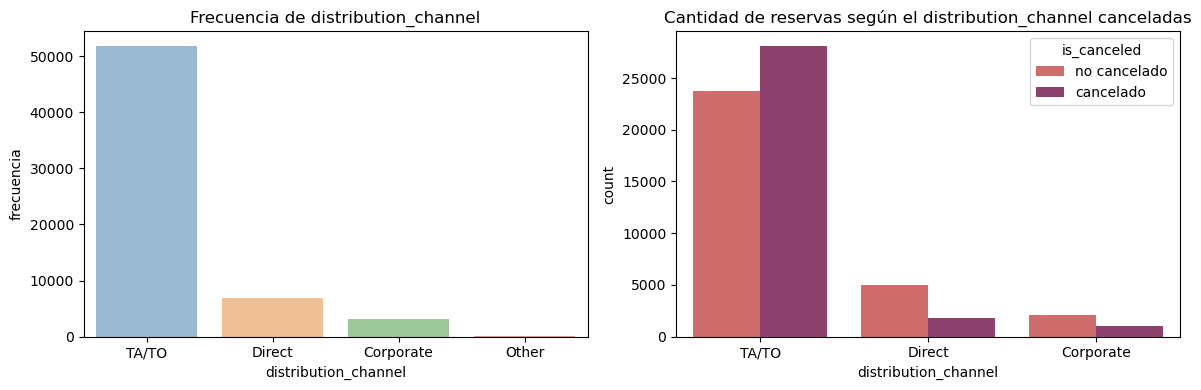

In [1183]:
distribution_channel = df['distribution_channel'].value_counts().reset_index()
distribution_channel.columns = ['distribution_channel', 'cantidad']

cantidad = distribution_channel[distribution_channel['cantidad'] < 2500]['cantidad'].sum()
distribution_channel.drop(distribution_channel[distribution_channel['cantidad'] < 2500].index, inplace = True)
distribution_channel.loc[len(distribution_channel.index)] = ['Other', cantidad]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
count_filtrado = distribution_channel[distribution_channel['cantidad'] > 2500]
df_filtrado = df[df['distribution_channel'].isin(count_filtrado['distribution_channel'])]


sns.countplot(x="distribution_channel", hue="is_canceled", data=df_filtrado, palette="flare", ax=ax2)
ax2.set_title('Cantidad de reservas según el distribution_channel canceladas')

sns.barplot(x='distribution_channel', y='cantidad', data=distribution_channel, alpha=0.5, ax = ax1).set(title="Frecuencia de distribution_channel",ylabel='frecuencia',xlabel='distribution_channel')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()

El canal principal de distribución es el TA/TO. También podemos observar que las reservas que se hacen por este mismo canal de directo son las que mas se suelen cancelar.

##### assigned_room_type y reserved_room_type

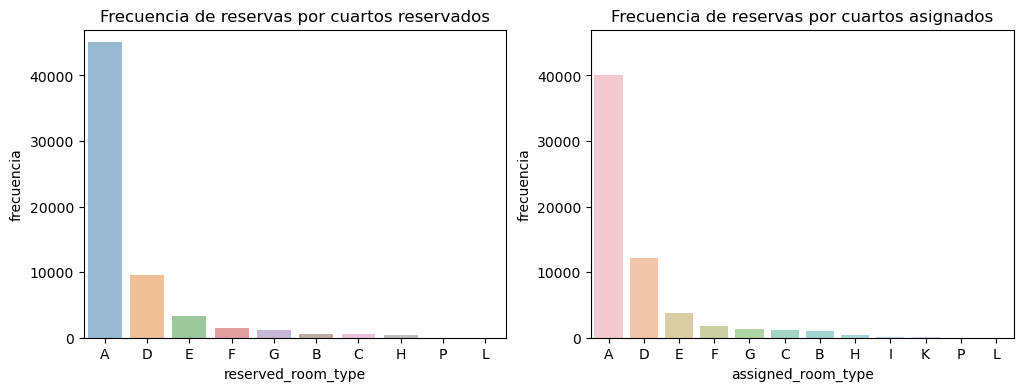

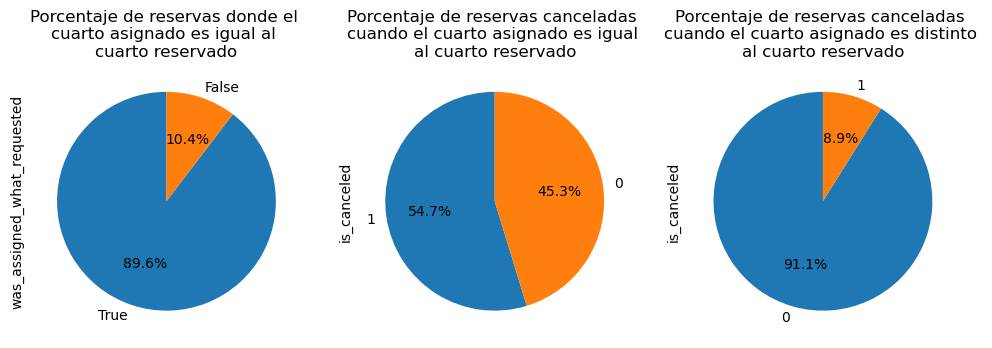

In [1184]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig2, (ax3, ax4, ax5) = plt.subplots(1, 3, figsize=(12, 4))

cuartos_asignados = df[['assigned_room_type']].value_counts().reset_index()
cuartos_asignados.columns = ['assigned_room_type', 'cantidad']
sns.barplot(x='assigned_room_type', y='cantidad', data=cuartos_asignados, alpha=0.5, ax = ax2).set(title="Frecuencia de reservas por cuartos asignados",ylabel='frecuencia',xlabel='assigned_room_type')

cuartos_pedidos = df[['reserved_room_type']].value_counts().reset_index()
cuartos_pedidos.columns = ['reserved_room_type', 'cantidad']
sns.barplot(x='reserved_room_type', y='cantidad', data=cuartos_pedidos, alpha=0.5, ax = ax1).set(title="Frecuencia de reservas por cuartos reservados",ylabel='frecuencia',xlabel='reserved_room_type')

ax1.set_ybound(0, 47000)
ax2.set_ybound(0, 47000)


assigned_vs_requested = (df['assigned_room_type'] == df['reserved_room_type']).reset_index()
assigned_vs_requested.columns = ['index', 'was_assigned_what_requested']

assigned_vs_requested['was_assigned_what_requested'].value_counts().plot(kind='pie', ax=ax3, autopct='%1.1f%%', startangle=90)
ax3.set_title('Porcentaje de reservas donde el \ncuarto asignado es igual al \ncuarto reservado')

df[df['assigned_room_type'] == df['reserved_room_type']]['is_canceled'].value_counts().plot(kind='pie', ax=ax4, autopct='%1.1f%%', startangle=90)
ax4.set_title('Porcentaje de reservas canceladas \ncuando el cuarto asignado es igual \nal cuarto reservado')

df[df['assigned_room_type'] != df['reserved_room_type']]['is_canceled'].value_counts().plot(kind='pie', ax=ax5, autopct='%1.1f%%', startangle=90)
ax5.set_title('Porcentaje de reservas canceladas \ncuando el cuarto asignado es distinto \nal cuarto reservado')

plt.show()

Como podemos ver en la primer figura, la alta demanda del tipo A no da abasto y se tiene que repartir entre otros tipos de habitación. Eso se ve representado en la segunda figura, donde aproximadamente el 10% de las reservas no coinciden con el tipo de habitación que se asigno. Una estadística interesante es que sobre ese 10% que no coinciden, el 91% de las reservas se mantienen.

##### deposit_type

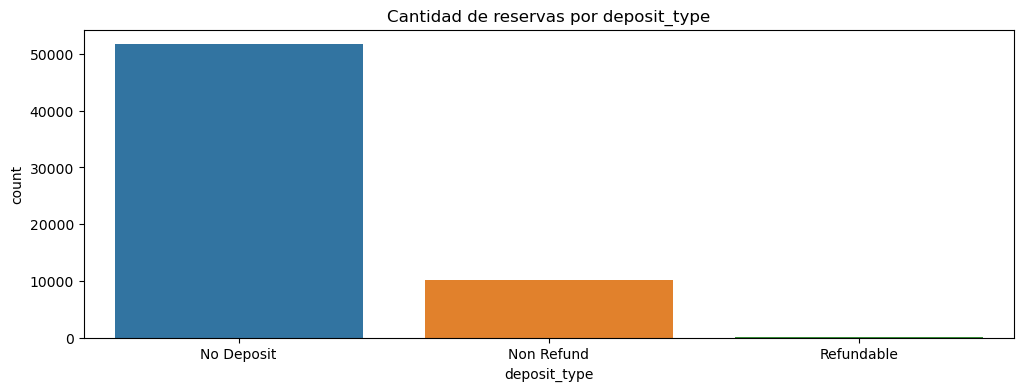

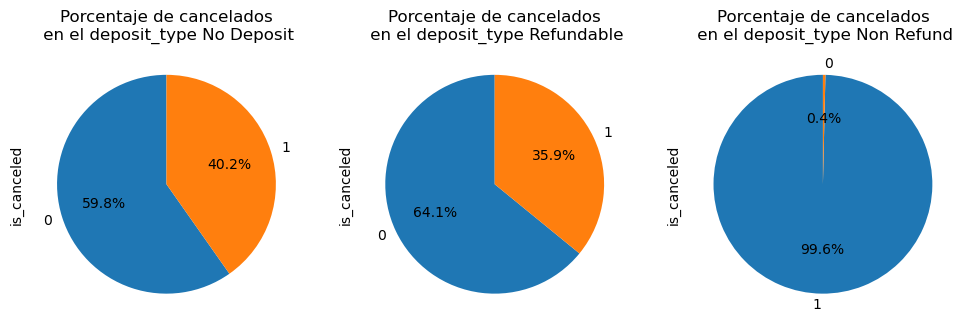

In [1185]:
fig, ax = plt.subplots(figsize=(12, 4))
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(x="deposit_type",  data=df, ax=ax)
ax.set_title('Cantidad de reservas por deposit_type')

df[df['deposit_type'] == 'No Deposit']['is_canceled'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90)
ax1.set_title('Porcentaje de cancelados\n en el deposit_type No Deposit')

df[df['deposit_type'] == 'Refundable']['is_canceled'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Porcentaje de cancelados\n en el deposit_type Refundable')

df[df['deposit_type'] == 'Non Refund']['is_canceled'].value_counts().plot(kind='pie', ax=ax3, autopct='%1.1f%%', startangle=90)
ax3.set_title('Porcentaje de cancelados\n en el deposit_type Non Refund')

plt.show()

Al analizar el gráfico podemos concluir que aquellas reservas sin deposito son mas frecuentes y por una pequeña diferencia suelen mantener la reserva, al igual que las reservas con reembolso. Sin embargo, en las reservas con deposito sin reembolso, en su gran mayoría son canceladas. 

##### agent_id

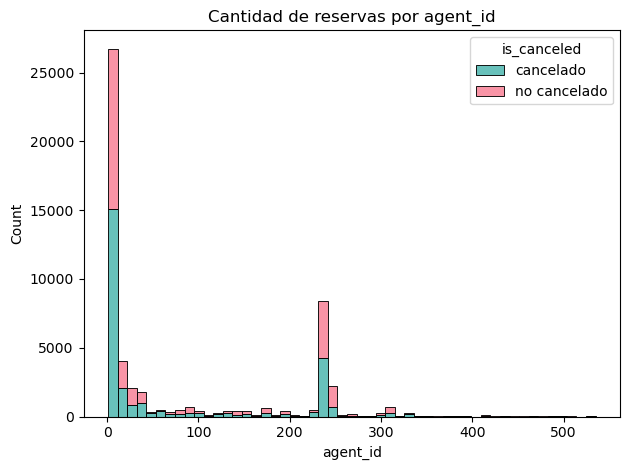

In [1186]:
ax = sns.histplot(x="agent_id", hue="is_canceled", data=df, palette = 'husl', multiple="stack")
ax.set_title('Cantidad de reservas por agent_id')

plt.legend(title='is_canceled', labels=['cancelado', 'no cancelado'])
plt.tight_layout()
plt.show()


Como podíamos ver por la taba de frecuencias, la cantidad de agentes distintos es muy grande y es difícil de analizar gráficamente. Del gráfico podemos rescatar que las distribuciones de cancelaciones son muy parejas, y que la mayoría de los agentes tienen una cantidad de reservas canceladas similar a la de reservas no canceladas.

##### company

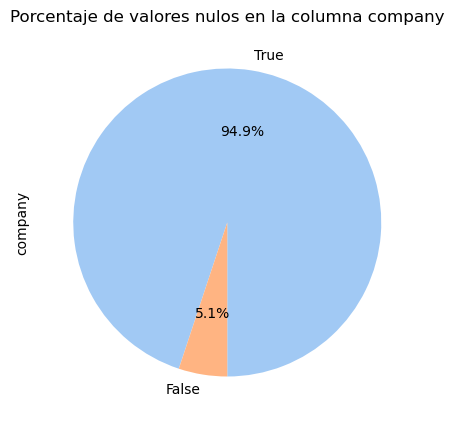

In [1187]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

df['company'].isna().value_counts().plot(kind='pie', ax=ax1,startangle=270, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
ax1.title.set_text('Porcentaje de valores nulos en la columna company')

plt.show()


Viendo la tabla de frecuencias, hay aproximadamente 270 comandas distintas, lo que dificulta en análisis de la distribución y por el pie chart podemos ver que ademas en su mayoría son nulos, por lo que no creemos que esta variable aporte información valiosa al análisis.

##### customer_type

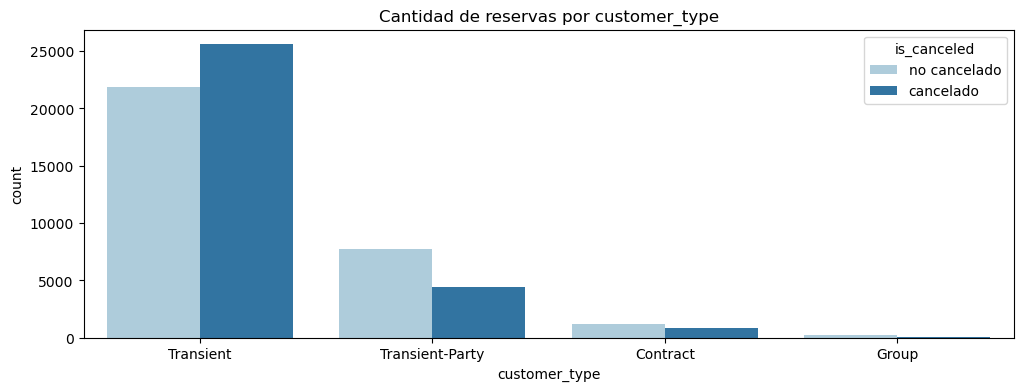

In [1188]:
fig, ax = plt.subplots(figsize=(12, 4))

ax = sns.countplot(x="customer_type", hue="is_canceled", data=df, palette="Paired")
ax.set_title('Cantidad de reservas por customer_type')

plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.show()

Al analizar el gráfico, podemos apreciar como en su mayoría son reservas de tipo transient, y dentro de ese grupo, hay una leve tendencia a cancelar, pero casi que despreciable. Lo opuesto sucede en el resto de los grupos, donde hay una leve tendencia a mantener la reserva.

##### is_repeated_guest

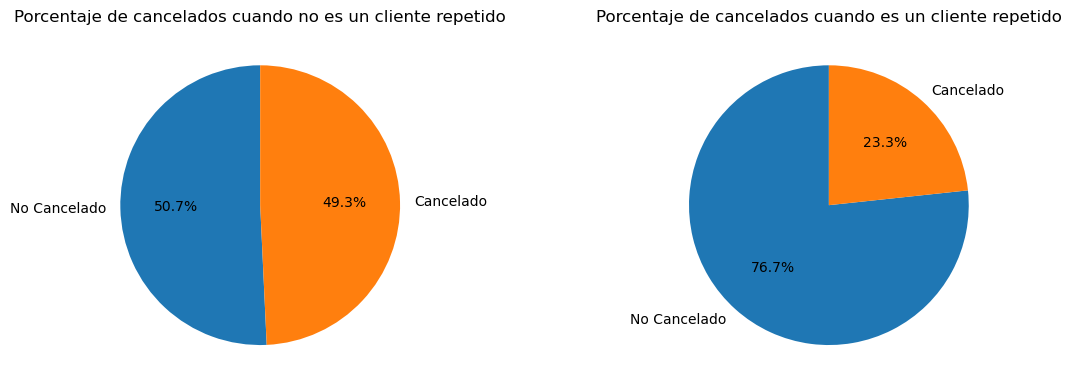

In [1189]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

is_not_repeated = df[df['is_repeated_guest'] == 0]['is_canceled'].value_counts().reset_index()
is_not_repeated.columns = ['is_canceled', 'cantidad']
is_not_repeated['is_canceled'][0] = 'No Cancelado'
is_not_repeated['is_canceled'][1] = 'Cancelado'
ax1.pie(is_not_repeated['cantidad'], labels=is_not_repeated['is_canceled'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Porcentaje de cancelados cuando no es un cliente repetido')

is_repeated = df[df['is_repeated_guest'] == 1]['is_canceled'].value_counts().reset_index()
is_repeated.columns = ['is_canceled', 'cantidad']
is_repeated['is_canceled'][0] = 'No Cancelado'
is_repeated['is_canceled'][1] = 'Cancelado'
ax2.pie(is_repeated['cantidad'], labels=is_repeated['is_canceled'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Porcentaje de cancelados cuando es un cliente repetido')

plt.tight_layout()
plt.show()

Como se puede apreciar en los gráficos de torta, en su mayoría los clientes repetidos tienden a no cancelar las reservas. A pesar de ello, teniendo en cuenta la tabla de frecuencias, tenemos que recordar que en su mayoría los clientes no son repetidos.

### Variables Irrelevantes

Hay varias variables que consideramos qie no serán relevantes a la hora de estimar la cancelación de una reserva, las siguientes son:

- **year**: No aporta información relevante ya que las reservas tienden a tener patrones mas por mes/temporada que por año. Podría tenerse en consideración si algún año en particular hubo algún evento que afecte directamente a las reservas, pero como son reservas de todas partes del mundo, y no ocurrió ningún evento como el COVID, o una guerra en los años a analizar en los años posibles (2015, 2016, 2017) no es relevante.



In [1190]:
year_frequency = df["year"].value_counts().reset_index()
year_frequency.columns = ["Año", "Cantidad"]
year_frequency

,Año,Cantidad
0,2016,29362
1,2017,21066
2,2015,11485


- **day_of_month**: Al igual que year, no aporta información relevante ya que las reservas tienden a tener patrones mas por mes/temporada que por dia del mes. Podría argumentarse que en ciertos dias las reservas pueden verse afectadas, como por ejemplo en navidad, sin embargo, esos casos ya están cubiertos por semana del año.

- **days_in_waiting_list**: Esta variable indica la cantidad de dias en lista de espera hasta que fue aceptada la reserva. Como pudimos observar en el análisis de las variables, el 75% de los datos son 0. Esto nos levanto alertas asi que decidimos investigar un poco mas sobre esta variable.

In [1191]:
tabla = df['days_in_waiting_list'].value_counts().reset_index()
tabla.columns = ['Cantidad de dias de espera', 'Cantidad de reservas']
tabla['Porcentaje'] = round(tabla['Cantidad de reservas'] / df['days_in_waiting_list'].count() * 100, 2)
tabla

,Cantidad de dias de espera,Cantidad de reservas,Porcentaje
0,0,59678,96.39
1,39,155,0.25
2,31,90,0.15
3,44,83,0.13
4,58,82,0.13
...,...,...,...
111,81,1,0.00
112,121,1,0.00
113,97,1,0.00
114,193,1,0.00


Como podemos observar, mas del 95% de los dias de espera son 0, por lo tanto podemos asumir que esta variable no aporta información valiosa al análisis.

### Análisis de correlaciones entre variables

#### Entre variables cuantitativas

In [1192]:
columns=[
 'lead_time',
 'week_number',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'total_of_special_requests',
 'average_daily_rate',
 'is_canceled',
 ]
ds_pairplot=df[columns].copy()
#sns.pairplot(ds_pairplot, hue='is_canceled')
plt.show()


Hacemos un calculo de correlación entre las variables cuantitativas para ver si existe alguna relación entre ellas. Para esto, utilizamos el método de Pearson, el cual nos da un valor entre -1 y 1, donde 1 es una correlación positiva perfecta, 0 es una correlación nula y -1 es una correlación negativa perfecta.

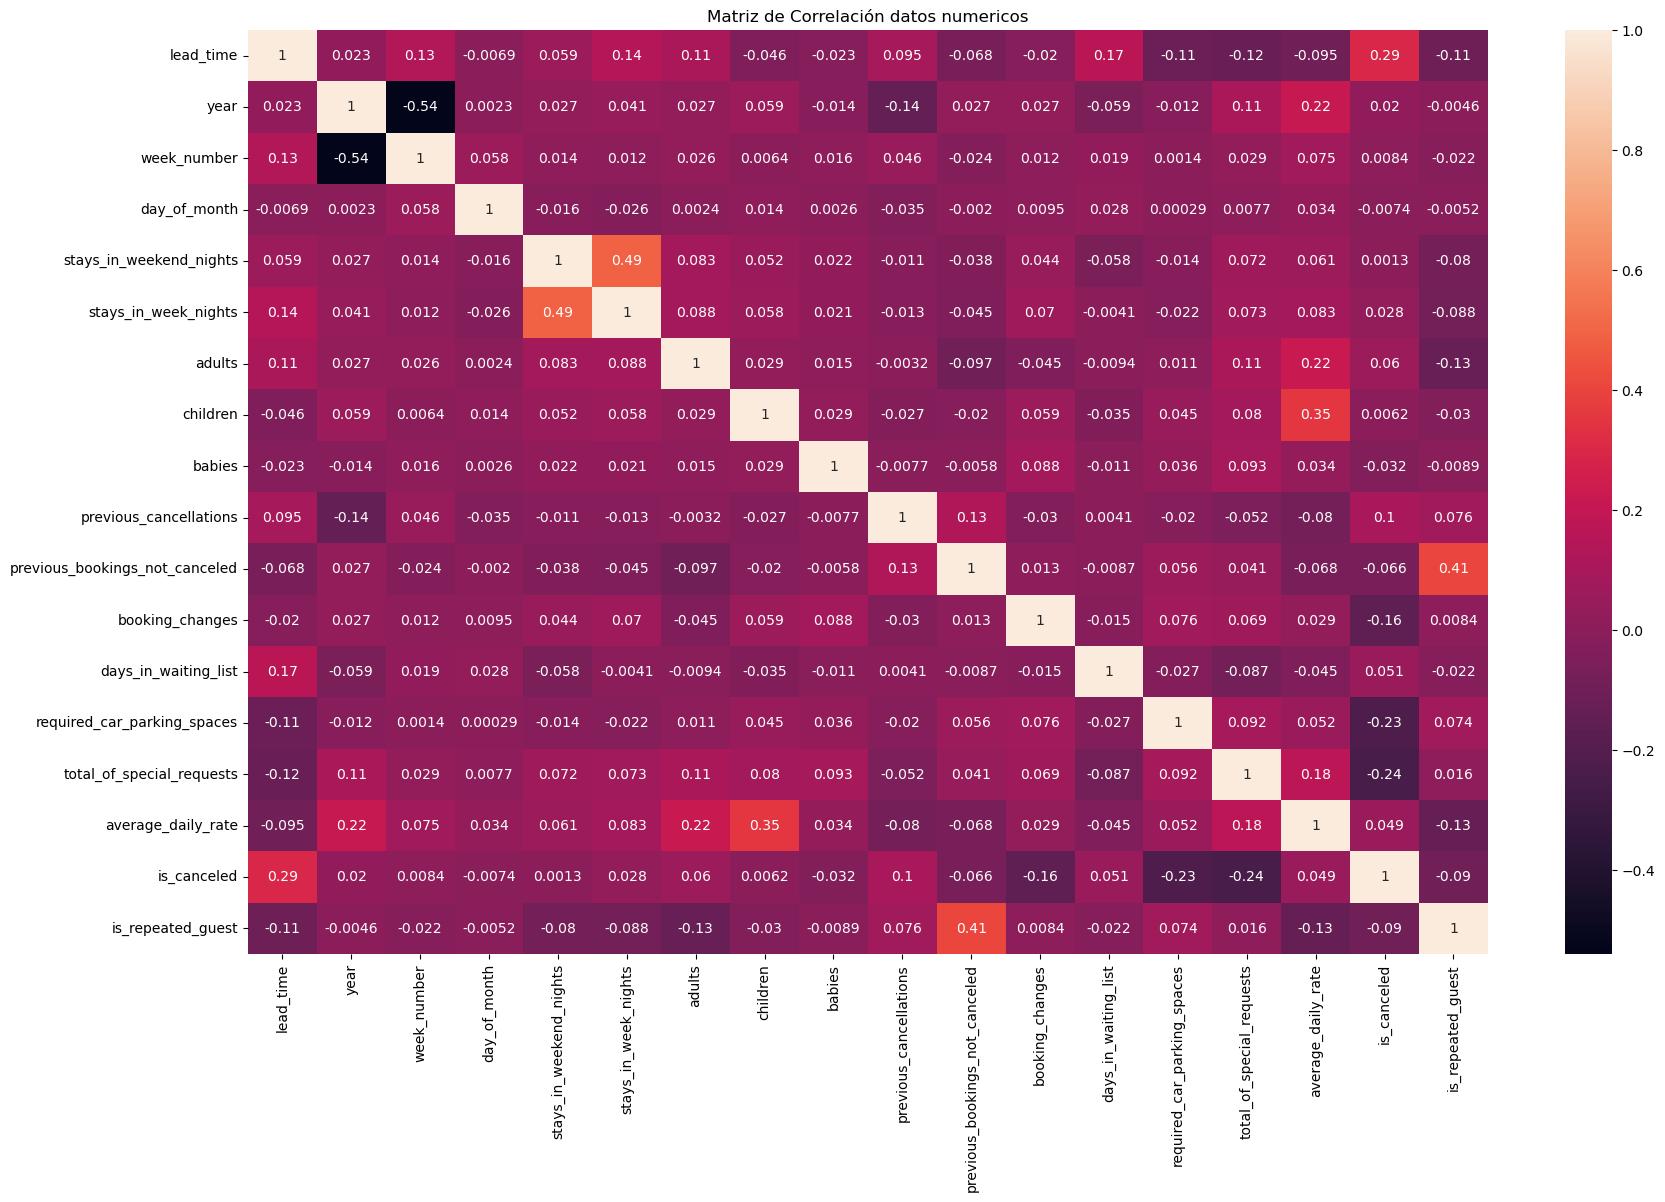

In [1193]:
df_numerico = df[[
    'lead_time',
    'year',
    'week_number',
    'day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'average_daily_rate',
    'is_canceled',
    'is_repeated_guest'
    ]]
correlation_matrix = df_numerico.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación datos numericos')
plt.show()

#### Comparación entre stays in week nights y stays in weekend nights

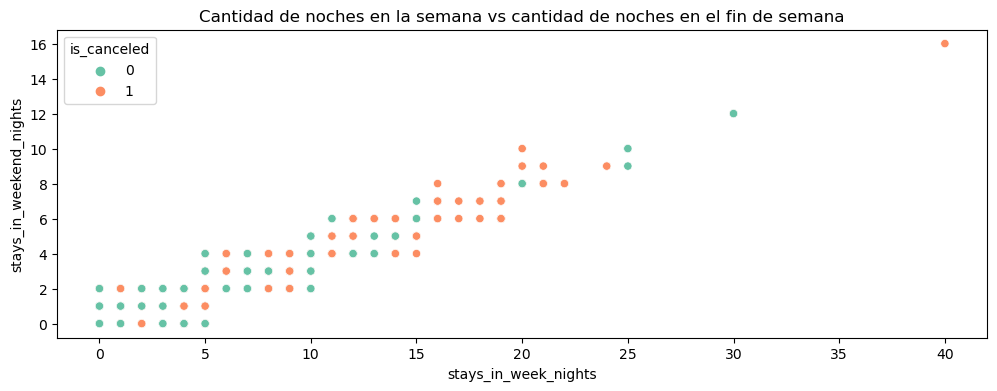

In [1194]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.scatterplot(x="stays_in_week_nights", y="stays_in_weekend_nights", hue="is_canceled", data=df, palette="Set2", ax=ax)
ax.set_title('Cantidad de noches en la semana vs cantidad de noches en el fin de semana')
plt.show()

Como era de esperarse, hay una correlación muy marcada entre las noches de semana y de fin de semana. A priori tampoco vemos outliers marcados.

#### Comparación entre la cantidad total de dias de estadía y la cantidad de booking_changes

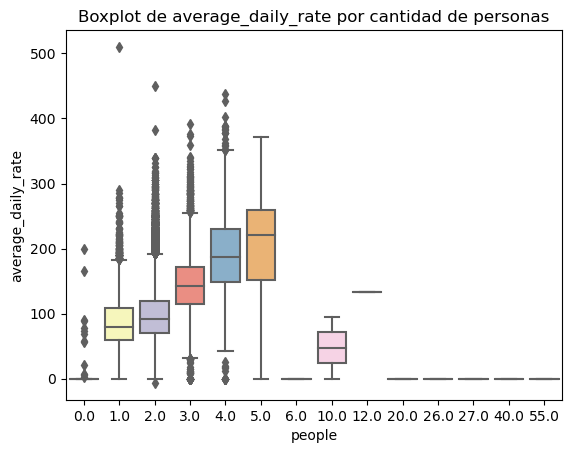

In [1195]:
df_people=df[["adults",'children', 'babies', "average_daily_rate", 'is_canceled']].copy()

people = df_people['adults'] + df_people['children'] + df_people['babies']

df_people['people'] = people
df_people.drop(columns=['adults', 'children', 'babies'], inplace=True)


sns.boxplot(x="people", y="average_daily_rate", data=df_people, palette="Set3").set_title("Boxplot de average_daily_rate por cantidad de personas")
plt.show()

In [1196]:
df_people[df_people['people'] >= 6].head()

,average_daily_rate,is_canceled,people
4064,0.0,1,40.0
11830,0.0,1,20.0
12659,95.0,0,10.0
13101,0.0,1,6.0
19146,0.0,1,26.0


Si descartamos los 5 casos donde la cantidad de personas en la reserva es mayor a 6, podemos observar cierta correlación positiva entre la cantidad de personas y el average_daily_rate

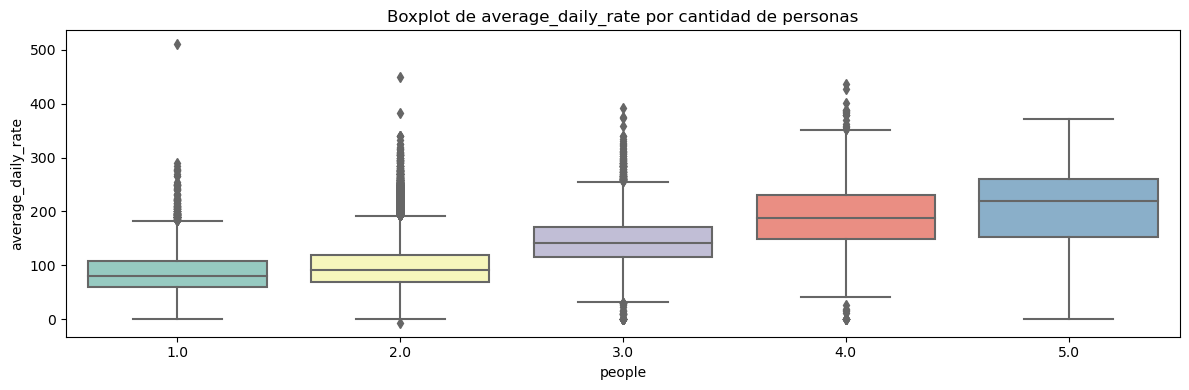

In [1197]:
fig, ax = plt.subplots(figsize=(12, 4))
df_people.drop(df_people[(df_people['people'] >= 6) | (df_people['people'] == 0)].index, inplace=True)
sns.boxplot(x="people", y="average_daily_rate", data=df_people, palette="Set3").set_title("Boxplot de average_daily_rate por cantidad de personas")
plt.tight_layout()
plt.show()

#### Comparación agent_id vs hotel

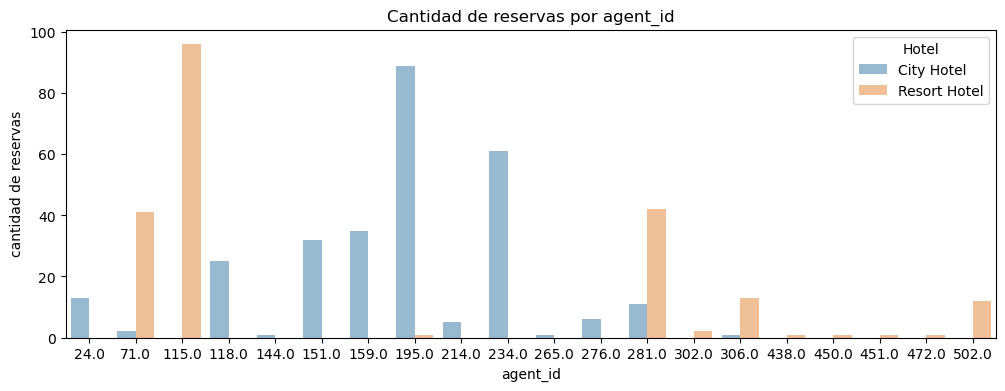

In [1198]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

sample_agent_ids = random.sample(df['agent_id'].unique().tolist(), 20)
df_sample = df[df['agent_id'].isin(sample_agent_ids)]
df_count_agents = df_sample.groupby(['agent_id', 'hotel']).size().reset_index(name='counts')
sns.barplot( x="agent_id",y='counts', data=df_count_agents, hue='hotel',  ax=ax, alpha=0.5)
ax.set_title('Cantidad de reservas por agent_id')
ax.set_xlabel('agent_id')
ax.set_ylabel('cantidad de reservas')
    
plt.legend(title='Hotel', loc = 'upper right')
plt.show()

Como podemos observar, hay una fuerte correlación entre agent id y el hotel. Como había muchos agente decidimos tomar una muestra aleatoria para poder visualizar los datos correctamente. Esta correlación es esperable ya que cada agencia de viajes trabaja con ciertos hoteles, y no con todos.

#### Comparación assigned_room_type vs average_daily_rate

Como podemos observar, existen ciertos room_types los cuales les generan mas ganancias al hotel.

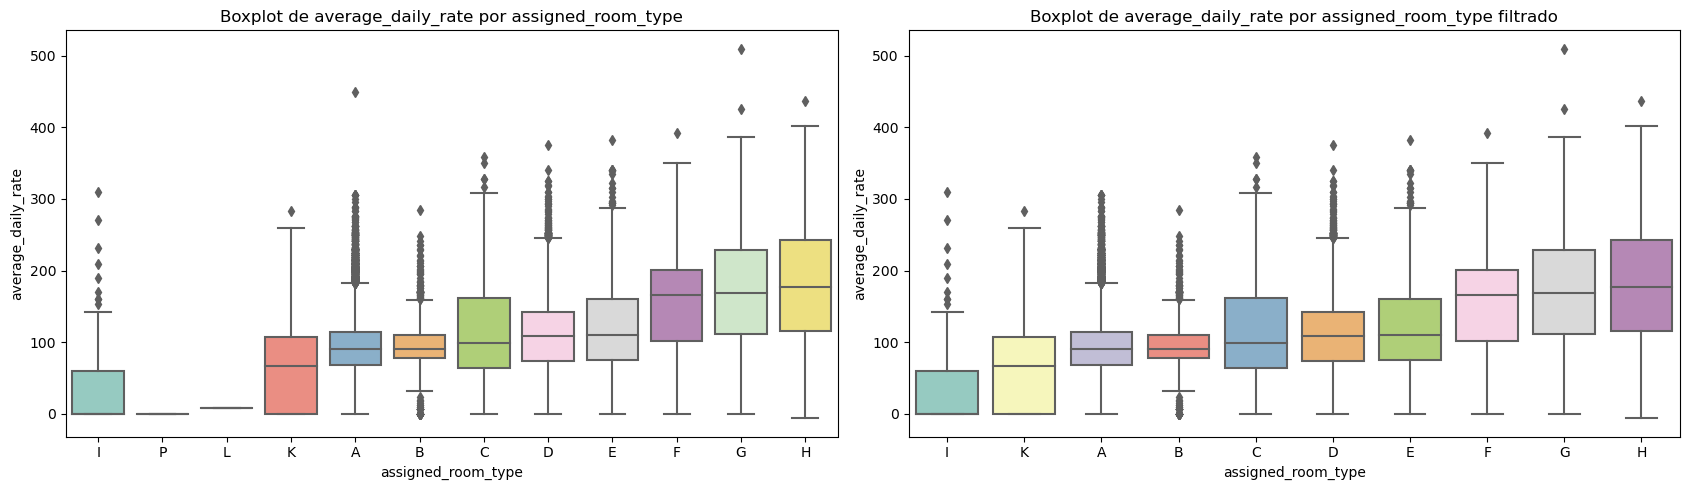

In [1199]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))
medianas = df.groupby('assigned_room_type')['average_daily_rate'].median()
cuartos_ordenados = list(medianas.sort_values().index)

df_sorted = df.sort_values(by=['assigned_room_type'], key=lambda x: x.map(cuartos_ordenados.index))

sns.boxplot(x="assigned_room_type", y="average_daily_rate", data=df_sorted, palette="Set3", ax = ax1).set_title("Boxplot de average_daily_rate por assigned_room_type")

index_to_drop_l = df_sorted[df_sorted['assigned_room_type'] == 'L'].index
index_to_drop_p = df_sorted[df_sorted['assigned_room_type'] == 'P'].index
index_to_drop_a = df_sorted[(df_sorted['assigned_room_type'] == 'A') & (df_sorted['average_daily_rate'] > 400)].index
df_sorted.drop(index=index_to_drop_a, inplace=True)
df_sorted.drop(index=index_to_drop_l, inplace=True)
df_sorted.drop(index=index_to_drop_p, inplace=True)

sns.boxplot(x="assigned_room_type", y="average_daily_rate", data=df_sorted, palette="Set3", ax = ax2)
plt.title('Boxplot de average_daily_rate por assigned_room_type filtrado')
plt.tight_layout()
plt.show()

También existe una correlación entre el average_daily_rate y el assigned_room_type, como podemos apreciar en los boxplot, hay ciertos tipos de habitaciones donde el average_daily_rate es mayor. Es mas fácil de apreciar la tendencia de los distintos tipos de habitaciones al estar ordenados por sus medias. Podemos ver que entre las habitaciones I y K no hay mucha diferencia, y que los valores comprendidos entre las habitaciones A y D es despreciable, sin embargo hay una gran diferencia entre las habitaciones E y H. También filtramos 3 datos, un outlier de la categoría A, y dos categorías que no tenían datos suficientes para poder analizar.

#### Comparación average_daily_rate y lead time vs week_number

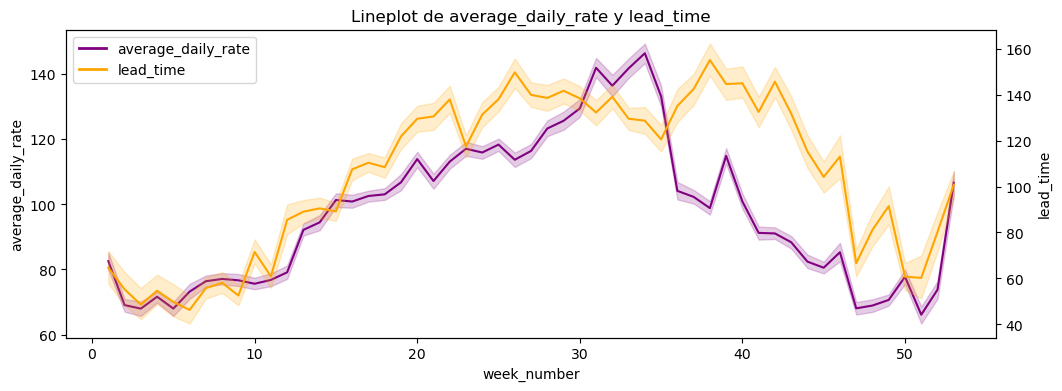

In [1200]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.lineplot(x="week_number", y="average_daily_rate",data=df, color = 'purple')
ax2 = ax.twinx()
ax2 = sns.lineplot(x="week_number", y="lead_time",data=df, color='orange')

legend_etiquetas = ['average_daily_rate', 'lead_time']
legend_colores = ['purple', 'orange'] 

custom_legend = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colores]

plt.legend(custom_legend, legend_etiquetas, loc='upper left')
plt.title('Lineplot de average_daily_rate y lead_time')
plt.show()

Se puede ver una cierta correlación entre las mismas, esto debido a que por ejemplo entre las semanas 20 y 30 el lead time aumenta debido a que es época de vacaciones en el hemisferio norte, y por lo tanto, las personas reservan con mas antelación. Entonces como la demanda es mas alta, también sube el average_daily_rate.

#### Comparación entre las naciones con mas reservas y el average_daily_rate

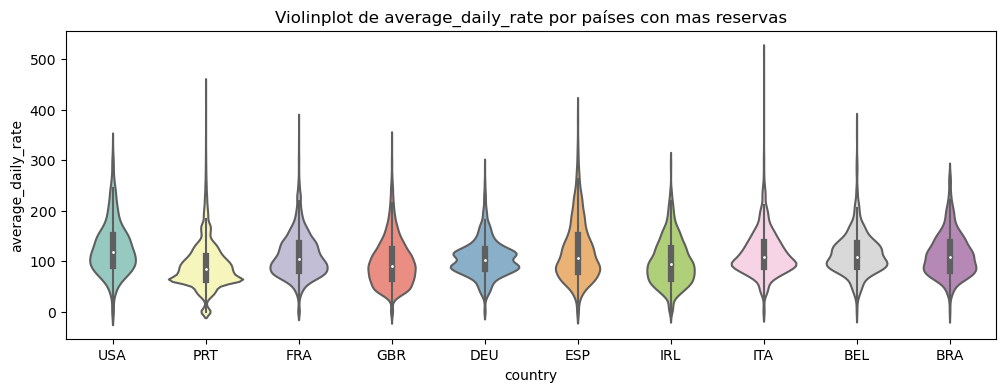

In [1201]:
plt.figure(figsize=(12, 4))
naciones_con_mas_reservas = df['country'].value_counts().head(10).index
df_filtrado = df[df['country'].isin(naciones_con_mas_reservas)]
sns.violinplot(x="country", y="average_daily_rate", data=df_filtrado, palette="Set3")
plt.title('Violinplot de average_daily_rate por países con mas reservas')
plt.show()

Notamos que no hay país que le genere una gran ganancia al hotel, son todas muy parejas entre si. 

#### Comparación entre la cantidad total de dias de estadía y la cantidad de booking_changes

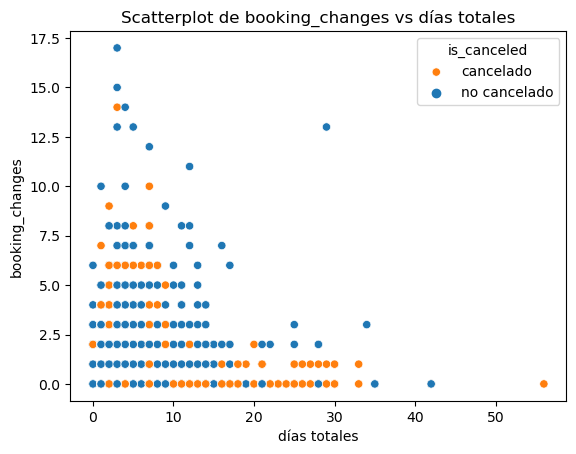

In [1202]:
dias_totales = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
sns.scatterplot(x = dias_totales, y = "booking_changes", hue = "is_canceled", data=df).set(xlabel='días totales')
plt.legend(title='is_canceled', labels=['cancelado', 'no cancelado'])
plt.title('Scatterplot de booking_changes vs días totales')
plt.show()

Podemos notar un patron que las personas con mayor estadía y sin cambios previos tienden mas a cancelar las reservas.

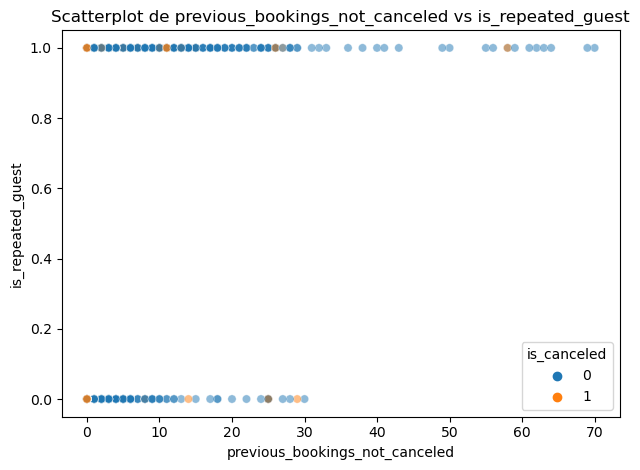

In [1203]:
sns.scatterplot(data=df, x='previous_bookings_not_canceled', y='is_repeated_guest', hue='is_canceled', alpha=0.5)
plt.title('Scatterplot de previous_bookings_not_canceled vs is_repeated_guest')
plt.tight_layout()
plt.show()

Vimos que en el heatmap había cierta correlación interesante entre estas dos variables. Pero cuando indagamos mas profundo podemos notar que no es asi ya que la variable previous_bookings_not_canceled en su mayoría vale 0. Lo que pude ser que levante la correlación son reservas del estilo que tienen mas de 50 reservas no canceladas lo cual no es muy usual. Mas tarde vamos a lidiar con este tipo de valores y decidir que hacer con los mismos.

In [1204]:
display(df['is_repeated_guest'].value_counts().reset_index())
display(df.groupby(['previous_bookings_not_canceled', 'is_repeated_guest', 'is_canceled']).size())

,index,is_repeated_guest
0,0,60180
1,1,1733


previous_bookings_not_canceled  is_repeated_guest  is_canceled
0                               0                  0              29346
                                                   1              30511
                                1                  0                222
                                                   1                296
1                               0                  0                148
                                                                  ...  
62                              1                  0                  1
63                              1                  0                  1
64                              1                  0                  1
69                              1                  0                  1
70                              1                  0                  1
Length: 101, dtype: int64

#### Comparación entre el país de origen de la reserva y su tipo de depósito

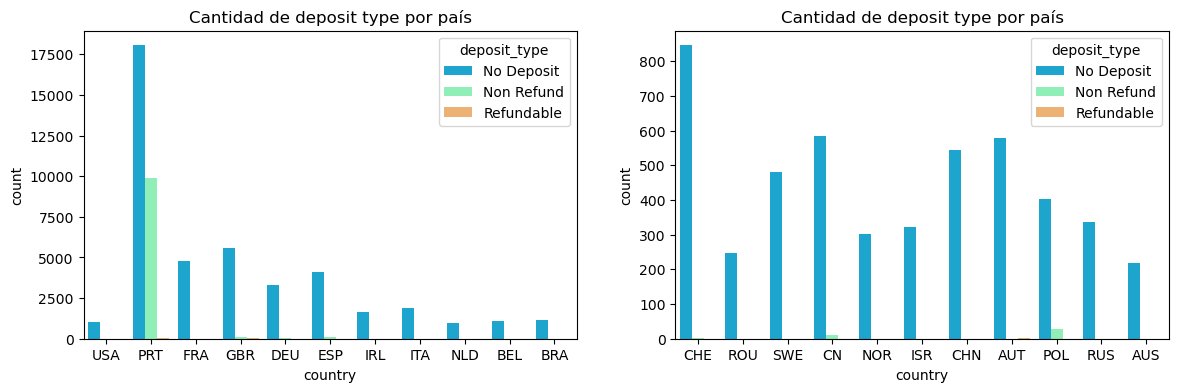

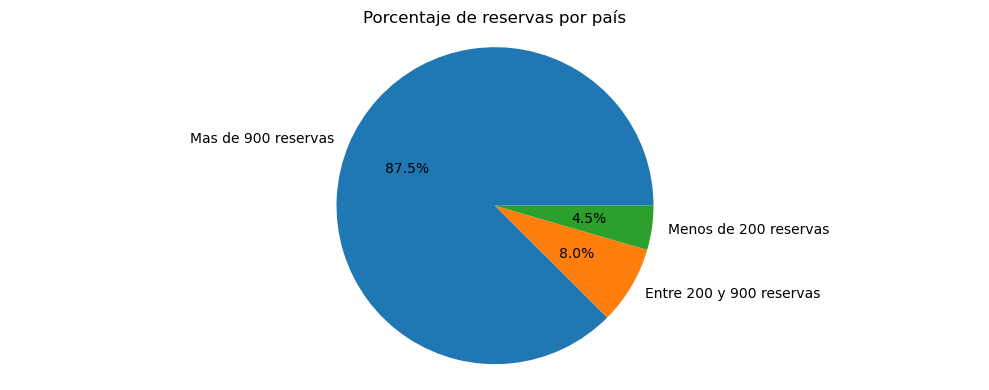

In [1205]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig1, ax3 = plt.subplots(1, 1, figsize=(10, 4))

paises = df[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 900]
paises_mid = paises[(paises['cantidad'] < 900) & (paises['cantidad'] > 200)]

df_may= df[df['country'].isin(paises_mayoritarios['country'])]
df_mid= df[df['country'].isin(paises_mid['country'])]
sns.countplot(x="country", hue="deposit_type", data=df_may, palette="rainbow", ax=ax1)
sns.countplot(x="country", hue="deposit_type", data=df_mid, palette="rainbow", ax=ax2)
ax2.set_title('Cantidad de deposit type por país')
ax1.set_title('Cantidad de deposit type por país')

mas_900 = paises_mayoritarios['cantidad'].sum()
menos_900 = paises_mid['cantidad'].sum()
menos_200 = paises[paises['cantidad'] < 200]['cantidad'].sum()

labels = 'Mas de 900 reservas', 'Entre 200 y 900 reservas', 'Menos de 200 reservas'

sizes = [mas_900, menos_900, menos_200]

ax3.pie(sizes, labels=labels, autopct='%1.1f%%')
ax3.axis('equal')
ax3.set_title('Porcentaje de reservas por país')



plt.tight_layout()
plt.show()

Decidimos hacer dos gráficos para poder visualizar los datos ya que el volumen de cantidad de países es muy grande. En el primero graficamos donde hay mas de 900 reservas (representando el 87.5% de la población), y como podemos observar la gran mayoría no tienen deposito. Sin embargo vemos que hay un país en particular que aproximadamente  1/3 de sus reservas son sin reembolso, y este país es Portugal. Esto podría explicarse, como se nombro anteriormente, que esto se debe por ser el país local. Evaluando el sector del medio, entre 200 y 900 (representando el 8% de la población), en su totalidad hay una cantidad ínfima de depósitos con y sin reembolso comparado con la cantidad sin deposito. Y el ultimo grupo decidimos no evaluarlo ya que la cantidad de países era enorme y representa un porcentaje muy pequeño de la población (4.5%).

#### Comparación de children vs reserved_room_type

Primero hacemos un groupby para ver como esta distribuida nuestra data para luego elegir la mejor opción posible a la hora de graficar. Como la gran mayoría de las reservas tienen 0 hijos, decidimos splittear la data en reservas con 0 hijos y reservas con 1 o mas hijos.

In [1206]:
df.groupby(['children', 'reserved_room_type']).size().reset_index(name='counts')

,children,reserved_room_type,counts
0,0.0,A,43683
1,0.0,B,393
2,0.0,C,124
3,0.0,D,9233
4,0.0,E,3036
5,0.0,F,619
6,0.0,G,305
7,0.0,H,56
8,0.0,L,1
9,0.0,P,7


También filtramos temporalmente la reserva que tiene 10 hijos ya que no es usual y no nos aporta información relevante. Ademas filtramos las categorías C, P, H y L del gráfico sin hijos ya que tienen un valor muy bajo y no se aprecia bien la distribución.

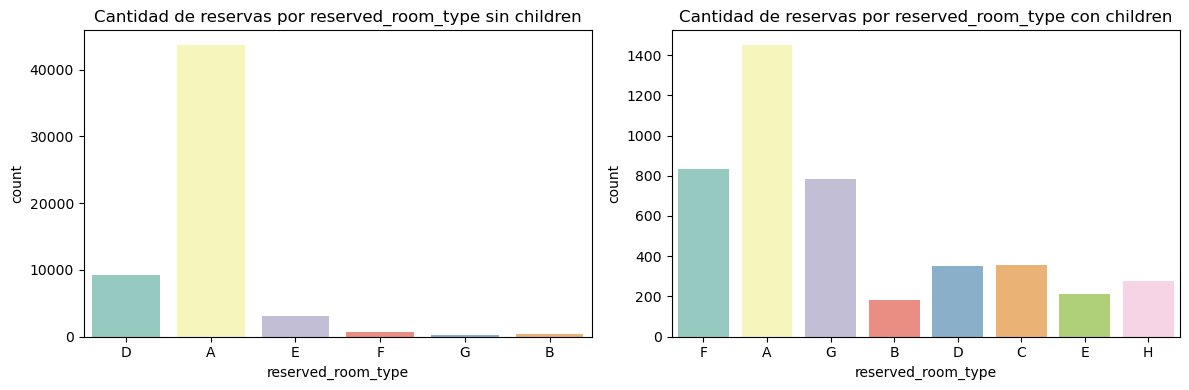

In [1207]:
df_sin_children = df[df['children'] == 0]
df_con_children = df[(df['children'] > 0) & (df['children'] < 10)]

df_sin_children = df_sin_children[(df_sin_children['reserved_room_type']!='C')&(df_sin_children['reserved_room_type']!='P')
                                  &(df_sin_children['reserved_room_type']!='H')&(df_sin_children['reserved_room_type']!='L')]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x="reserved_room_type", data=df_sin_children, palette="Set3", ax=ax1)
sns.countplot(x="reserved_room_type", data=df_con_children, palette="Set3", ax=ax2)

ax1.set_title('Cantidad de reservas por reserved_room_type sin children')
ax2.set_title('Cantidad de reservas por reserved_room_type con children')
plt.tight_layout()
plt.show()


Existe una tendencia a que las reservas sin hijos vayan a la habitación A. Podríamos suponer que se trata de una habitación para parejas pero esto no nos parece correcto ya que cuando vemos el otro gráfico, donde tienen hijos, también se ve una tendencia a la habitación A. Por lo tanto, podríamos suponer que la habitación A es la mas barata y por lo tanto, la mas reservada.

#### Comparación de las cancelaciones según el tipo de habitación reservada

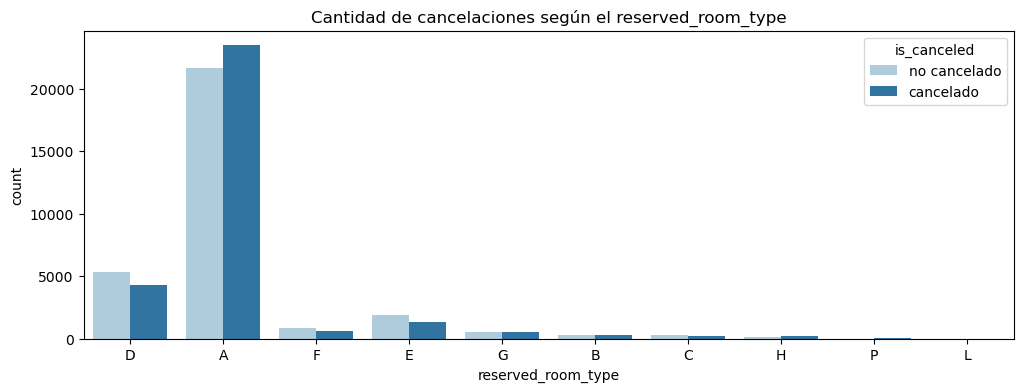

In [1208]:
fig, ax = plt.subplots(figsize=(12, 4))

ax = sns.countplot(x="reserved_room_type", hue="is_canceled", data=df, palette="Paired")
ax.set_title('Cantidad de cancelaciones según el reserved_room_type')

plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.show()

La cantidad de cancelaciones son muy parejas en todos las habitaciones, por lo tanto, no podríamos identificar cierto patron entre estas variables.

### Manipulación de datos

#### Actualización de datos

##### total_nights

In [1209]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.head()

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,3
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,1
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,1
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,7
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0,7


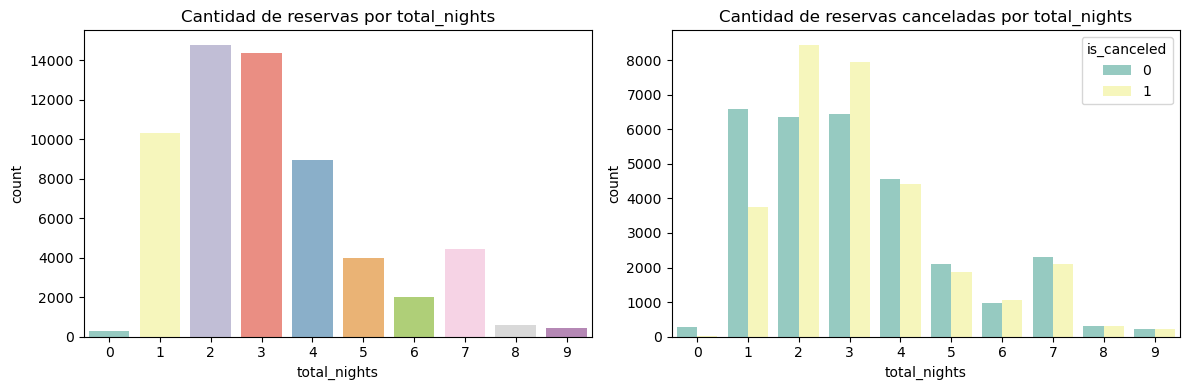

In [1210]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
total_nights = df[df['total_nights'] < 10]
sns.countplot(x="total_nights", data=total_nights, palette="Set3", ax = ax1).set(title="Cantidad de reservas por total_nights")
sns.countplot(x="total_nights", hue = 'is_canceled', data=total_nights, palette="Set3", ax = ax2).set(title="Cantidad de reservas canceladas por total_nights")
plt.tight_layout()
plt.show()

##### adults, children and babies

Vamos a retomar el análisis de estas variables ya que nos dimos cuenta que hay reservas que no tienen adultos, y esto no tiene sentido. Por lo tanto, vamos a filtrar el dataset para quedarnos con las reservas que tengan al menos un adulto.

In [1211]:
df_sin_adultos = df[df['adults'] <= 0]
df_sin_adultos.head()


,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights
96,City Hotel,23,2016,May,21,21,2,4,0,2.0,0,BB,IND,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,128.49,0,0,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1,6
212,City Hotel,315,2017,July,27,7,0,1,0,2.0,0,BB,USA,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,91.85,0,2,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1,1
270,City Hotel,4,2017,February,8,21,0,3,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,0.00,0,0,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1,3
326,City Hotel,53,2016,November,49,29,0,4,0,2.0,0,BB,ROU,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9.0,NaN,0,Transient,77.86,0,2,74fe3153-e2ae-4650-a375-05fc52881a56,0,4
464,City Hotel,64,2015,October,42,16,2,3,0,0.0,0,SC,FRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,50.0,NaN,0,Transient-Party,0.00,0,0,cfe370c2-298a-4de8-82fd-f8d418febd7f,0,5


In [1212]:
df_sin_adultos.shape

(197, 32)

In [1213]:
df.drop(df[df['adults'] <= 0].index, inplace=True)
df.shape

(61716, 32)

Tenemos 197 reservas las cuales no tienen sentido, por lo tanto las vamos a eliminar. Una vez hecho esto, ahora podemos crear una columna nueva a nuestro dataset la cual va a contener el numero total de personas por cada reserva.

In [1214]:
df['total_people'] = df['adults'] + df['children'] + df['babies']

##### meal_type

In [1215]:
df['meal_type'].replace(['SC', 'Undefined'], 'NoMeal', inplace=True)
df['meal_type'].value_counts()

BB        47690
HB         7446
NoMeal     6103
FB          477
Name: meal_type, dtype: int64

Vamos a unificar los registros que contengan SC con undefined ya que ambos apuntan a lo mismo, que no hay meal. Esto fue tomado tal como dice en el paper.

##### required_car_parking_spaces

In [1216]:
display(df[df['adults'] < df['required_car_parking_spaces']])
display(df[df['required_car_parking_spaces'] > 2])
df.drop(df[df['required_car_parking_spaces'] > 2].index, inplace=True)

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,total_people
8269,Resort Hotel,138,2017,March,12,19,2,2,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,NaN,NaN,122,Transient-Party,80.0,8,0,174365a6-2548-48c4-ae12-7842d5498f12,0,4,2.0
13713,Resort Hotel,205,2017,June,26,26,3,10,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,250.0,NaN,0,Transient,111.0,3,0,4267af65-0a89-4489-b099-e0332c6c51fe,0,13,2.0


,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,total_people
8269,Resort Hotel,138,2017,March,12,19,2,2,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,NaN,NaN,122,Transient-Party,80.0,8,0,174365a6-2548-48c4-ae12-7842d5498f12,0,4,2.0
13713,Resort Hotel,205,2017,June,26,26,3,10,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,250.0,NaN,0,Transient,111.0,3,0,4267af65-0a89-4489-b099-e0332c6c51fe,0,13,2.0


Decidimos eliminar estos registros ya que es ilógico la cantidad de estacionamientos pedidos para esa cantidad de adultos.

#### Datos faltantes

In [1217]:
NAs_table = df.isna().sum().reset_index()
NAs_table.columns = ['columna', 'cantidad']

NAs_table['porcentaje'] = round(NAs_table['cantidad'] / df.shape[0] * 100, 2)
NAs_table.drop(NAs_table[NAs_table['cantidad'] == 0].index, inplace=True)

NAs_table

,columna,cantidad,porcentaje
9,children,4,0.01
12,country,216,0.35
22,agent_id,7861,12.74
23,company,58573,94.91
32,total_people,4,0.01


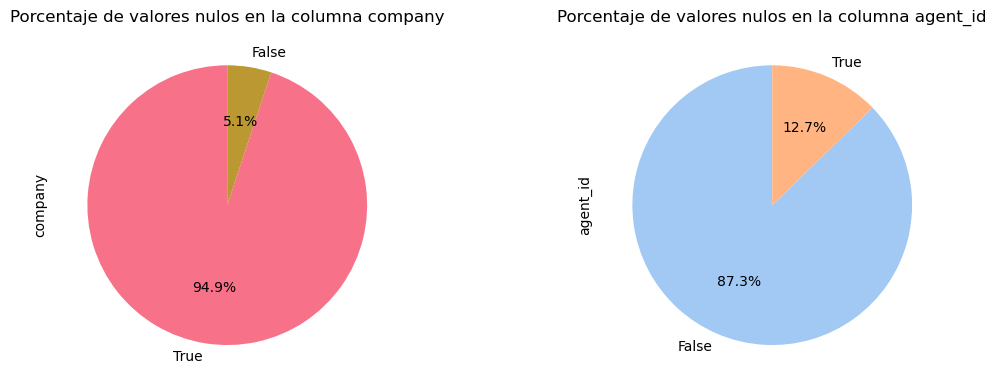

In [1218]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df['company'].isna().value_counts().plot(kind='pie', ax=ax1,startangle=90, autopct='%1.1f%%', colors=sns.color_palette("husl"))
ax1.title.set_text('Porcentaje de valores nulos en la columna company')

df['agent_id'].isna().value_counts().plot(kind='pie', ax=ax2,startangle=90, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
ax2.title.set_text('Porcentaje de valores nulos en la columna agent_id')

plt.tight_layout()
plt.show()

Solo graficamos los valores mas relevantes ya que los gráficos con valores bajos no son muy agradables a la vista.

##### company

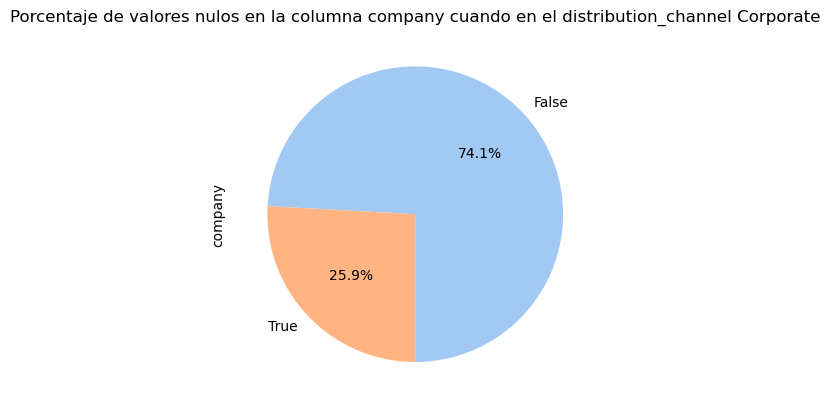

In [1219]:
df_corporate = df[df['distribution_channel'] == 'Corporate']

df_corporate['company'].isna().value_counts().plot(kind='pie', startangle=270, autopct='%1.1f%%', colors=sns.color_palette("pastel")).set(title="Porcentaje de valores nulos en la columna company cuando en el distribution_channel Corporate")
plt.show()

Decidimos eliminar esta columna principalmente porque el 95% de los datos son NAs. Ademas, donde distribution_channel es "Corporate" consideramos que si o si company debería tener un valor no nulo pero 25% sigue siendo nulo, por lo tanto esta variable termina aportando muy poca información útil al análisis, donde cualquier predicción que querramos hacer de esta variable va a estar sesgada debido a la poca cantidad de datos reales que tenemos disponibles.

In [1220]:
df.drop(columns=['company'], inplace=True)

##### children

A continuación vamos a analizar los casos donde faltan valores para la variable children. Como son pocos casos de nuestro dataset, vamos a rellenar con 0 y luego, vamos a actualizar la columna de total_people. Elegimos cero ya que existe cierto patron en estas reservas, entonces utilizamos ese patron para ver cual valor sería el mas adecuado.

In [1221]:
undefined_children = df[df['children'].isna()]
undefined_children.head()

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,total_people
27359,City Hotel,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,0,Transient-Party,18.0,0,2,6ad2b270-d3ae-464f-9d4d-0722e4c4e7bc,1,2,NaN
32654,City Hotel,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,0,Transient-Party,12.0,0,1,af8b8f11-dae4-494a-81f9-9aabb9d3b9ba,1,2,NaN
50323,City Hotel,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,0,Transient-Party,76.5,0,1,322fd306-7177-4752-88c2-891293fceba6,1,7,NaN
58511,City Hotel,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,0,Transient-Party,12.0,0,1,d94b4fca-243f-498c-a52f-14b52e7e5e72,1,1,NaN


In [1222]:
df[(df['hotel'] == 'City Hotel') & (df['year'] == 2015) & (df['month'] == 'August') & (df['meal_type'] == 'BB') & (df['country'] == 'PRT')]['children'].value_counts()

0.0    751
2.0     13
1.0      7
Name: children, dtype: int64

In [1223]:
df['children'].fillna(0, inplace=True)
df['total_people'] = df['adults'] + df['children'] + df['babies']
nas_table = df.isna().sum().reset_index()
nas_table.columns = ['columna', 'cantidad']
nas_table[nas_table['cantidad'] > 0]

,columna,cantidad
12,country,216
22,agent_id,7861


##### agent_id

In [1224]:
df_pre_imputation = df.copy()
display(df[(df['agent_id'].isna()) & (df['distribution_channel'] != 'Direct')].shape)
display(df[(df['agent_id'].isna())].shape[0] - df[(df['agent_id'].isna()) & (df['distribution_channel'] != 'Direct')].shape[0])

(4394, 32)

3467

Podemos ver que tenemos 3465 reservas con agent_id nulo correctos ya que la reserva fue hecha directamente con el hotel (distribution_channel == Direct), por lo tanto, no hay agente de por medio. Es por esto que vamos a rellenar los valores nulos de agent_id de estas reservas con -1, un caracter que no se encuentra en el dataset original. Como es una variable mas bien categórica, el -1 no debería afectar ya que solo categoriza.

In [1225]:
for index, row in df.iterrows():
    if (pd.isna(row['agent_id'])) & (row['distribution_channel'] == 'Direct'):
        df.loc[index, 'agent_id'] = -1
(df[(df['agent_id'].isna()) & (df['distribution_channel'] == 'Direct')].shape)
df[df['agent_id'] == -1].shape

(3467, 32)

Por otro lado, para rellenar los valores restantes vamos a ver si encontramos una correlación entre el hotel reservado, el país de origen y el agent_id, ya que pensamos que pueden estar fuertemente relacionados.

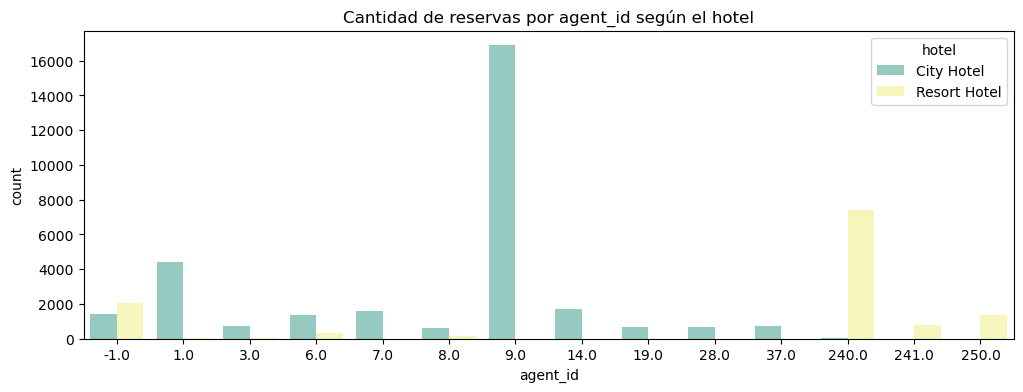

In [1226]:
plt.figure(figsize=(12, 4))

agent_id_mayores = df['agent_id'].value_counts().reset_index()
agent_id_mayores.columns = ['agent_id', 'cantidad']
agent_id_mayores_filtrado = agent_id_mayores[agent_id_mayores['cantidad'] > 600]
a = df[df['agent_id'].isin(agent_id_mayores_filtrado['agent_id'])]
sns.countplot(x='agent_id', hue = 'hotel', data=a, palette="Set3").set_title("Cantidad de reservas por agent_id según el hotel")
plt.show()

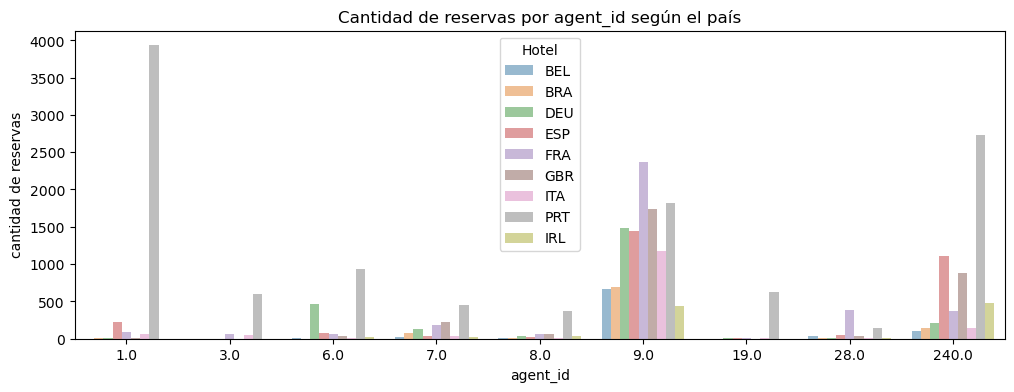

In [1227]:
df_filtrado = df[(~df['agent_id'].isna()) & (df['distribution_channel'] != 'Direct')]
paises = df_filtrado[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 900]
df_filtrado = df_filtrado[(df_filtrado['country'].isin(paises_mayoritarios['country']))]

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

agent_id_mayores = df_filtrado['agent_id'].value_counts().reset_index()
agent_id_mayores.columns = ['agent_id', 'cantidad']
agent_id_mayores2 = agent_id_mayores[agent_id_mayores['cantidad'] > 600]
a = df_filtrado[df_filtrado['agent_id'].isin(agent_id_mayores2['agent_id'])]

df_count_agents = a.groupby(['agent_id', 'country']).size().reset_index(name='counts')
sns.barplot( x="agent_id",y='counts', data=df_count_agents, hue='country',  ax=ax, alpha=0.5)
ax.set_title('Cantidad de reservas por agent_id según el país')
ax.set_xlabel('agent_id')
ax.set_ylabel('cantidad de reservas')
    
plt.legend(title='Hotel', loc = 'best')
plt.show()

Con las dos figuras anteriores pudimos notar dos tendencias. La primera es que hay dos tendencias respecto a los hoteles, el agente mayoritario del City Hotel es el 9, seguido del 1 y el del Resort Hotel es el 240. La segunda es que hay ciertos agentes que son mayoritarios en ciertos países, por ejemplo el agente 1 es mayoritario en Portugal, cuando el 9 y 240 están distribuidos entre varios países. Siguiendo estas dos tendencias vamos a rellenar los valores nulos de agent_id con los agentes mayoritarios de cada hotel y país. Si el país es Portugal y pertenece al City Hotel, vamos a reemplazar con el agente 1, si es de otro país entonces corresponde el agente 9. En el caso del Resort Hotel, vamos a rellenar todos con el agente 240.

In [1228]:
for index, row in df.iterrows():
    if (not pd.isna(row['agent_id'])) or (row['distribution_channel'] == 'Direct'):
        continue
    if row['hotel'] == 'City Hotel':
        if row['country'] == 'PRT':
            df.loc[index, 'agent_id'] = 1.0
        else: 
            df.loc[index, 'agent_id'] = 9.0
    else:
        df.loc[index, 'agent_id'] = 240.0
df['agent_id'].isna().value_counts()

False    61714
Name: agent_id, dtype: int64

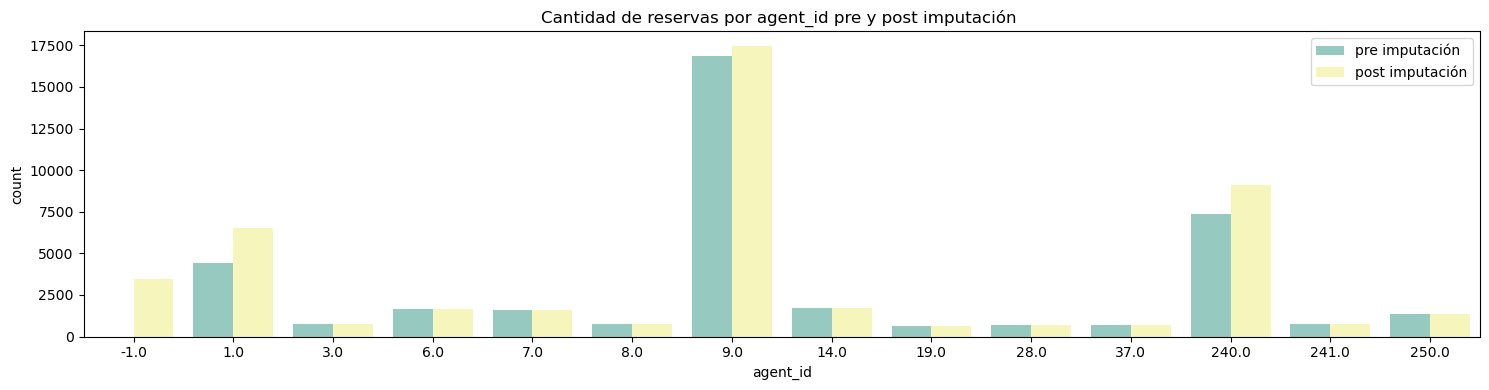

In [1229]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))

agent_id_mayores = df['agent_id'].value_counts().reset_index()
agent_id_mayores.columns = ['agent_id', 'cantidad']
agent_id_mayores_filtrado = agent_id_mayores[agent_id_mayores['cantidad'] > 600]
a = df[df['agent_id'].isin(agent_id_mayores_filtrado['agent_id'])].copy()
b = df_pre_imputation[df_pre_imputation['agent_id'].isin(agent_id_mayores_filtrado['agent_id'])].copy()
a['pre imputación'] = 'no'
b['pre imputación'] = 'si'

c = pd.concat([b, a]) 

sns.countplot(x='agent_id', hue = 'pre imputación', data=c , palette="Set3", ax = ax1).set_title("Cantidad de reservas por agent_id pre y post imputación ")
plt.legend(title='', labels=['pre imputación', 'post imputación'])
plt.tight_layout()
plt.show()

Como podemos observar, la distribución de agentes se mantuvo muy parecida a la original, y ademas pudimos rellenar todos los valores nulos.

##### country

In [1230]:
display(df[(df['country'].isna()) & (df['deposit_type'] == 'Non Refund')].shape)
display(df[(df['country'].isna()) & (df['deposit_type'] != 'Non Refund') & (df['hotel'] == 'Resort Hotel')].shape)
df[(df['country'].isna()) & (df['deposit_type'] != 'Non Refund')]['hotel'].value_counts()

(11, 32)

(204, 32)

Resort Hotel    204
City Hotel        1
Name: hotel, dtype: int64

También, podemos ver que casi todas las reservas sin country asignado fueron hechas al mismo hotel. Es por eso que vamos a ver si encontramos una nación que se repita mas veces que las demás en ese hotel, y si es asi, vamos a asignarle ese país a las reservas sin país.

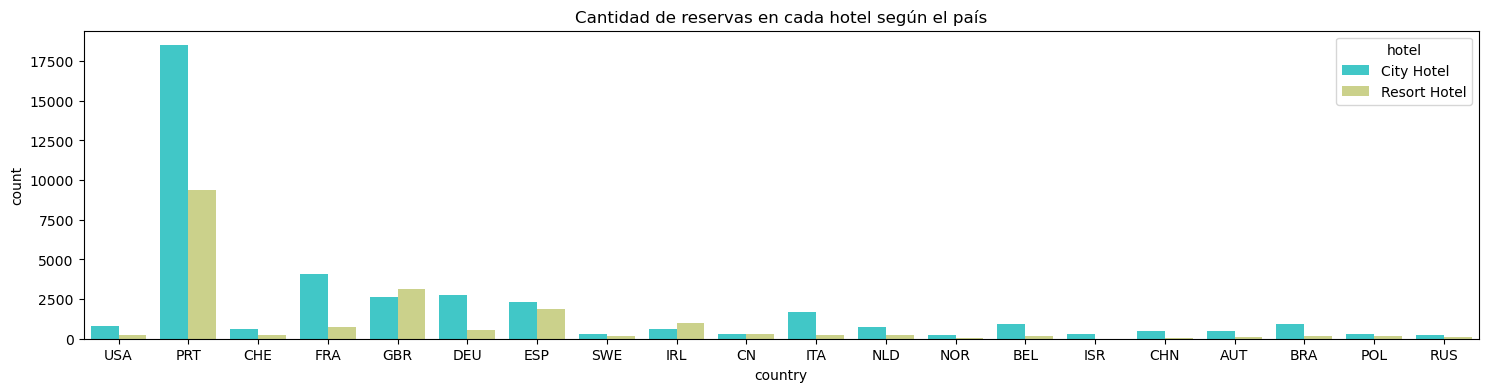

In [1231]:
fig, ax1 = plt.subplots(figsize=(18, 4))
paises = df[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 300]

df_filtrado = df[df['country'].isin(paises_mayoritarios['country'])]
sns.countplot(x="country", hue="hotel", data=df_filtrado, palette="rainbow", ax=ax1)
ax1.set_title('Cantidad de reservas en cada hotel según el país')
plt.show()

Como notamos previamente en el análisis hecho en cada variable que la gran mayoría de las reservas con deposit type non refund eran de Portugal, decidimos rellenar las reservas que tenían ese deposit type y country nulo con ese valor.

In [1232]:
for index, row in df.iterrows():
    if pd.isna(row['country']) and row['deposit_type'] == 'Non Refund':
        df.loc[index, 'country'] = 'PRT'


A continuación intentaremos buscar una correlación entre el country y el market segment para ver si podemos rellenar los valores nulos de country con algún valor mas acertado.

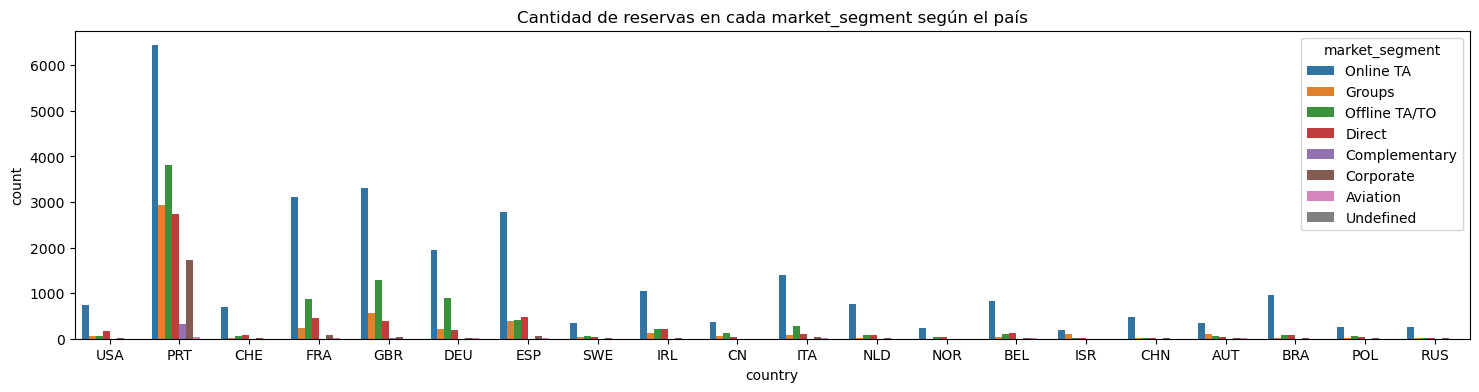

In [1233]:
fig, ax1 = plt.subplots(figsize=(18, 4))
paises = df[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 300]

df_filtrado = df[(df['country'].isin(paises_mayoritarios['country'])) & (df['deposit_type'] != 'Non Refund')]
sns.countplot(x="country", hue="market_segment", data=df_filtrado, ax=ax1)
ax1.set_title('Cantidad de reservas en cada market_segment según el país')
plt.show()

In [1234]:
df[(df['country'].isna()) ]['market_segment'].value_counts()

Corporate        79
Direct           66
Online TA        33
Offline TA/TO    24
Groups            2
Complementary     1
Name: market_segment, dtype: int64

Como notamos que el ratio de reservas según el market segment de Offline TA/TO, corporate y direct es mucho mas elevado con las personas de Portugal, decidimos rellenar los valores nulos de country con Portugal, donde tengan algún market segment de estos.

In [1235]:
for index, row in df.iterrows():
    if pd.isna(row['country']) and (row['market_segment'] == 'Corporate' or row['market_segment'] == 'Offline TA/TO' or row['market_segment'] == 'Direct'):
        df.loc[index, 'country'] = 'PRT'

df[df['country'].isna()].shape

(36, 32)

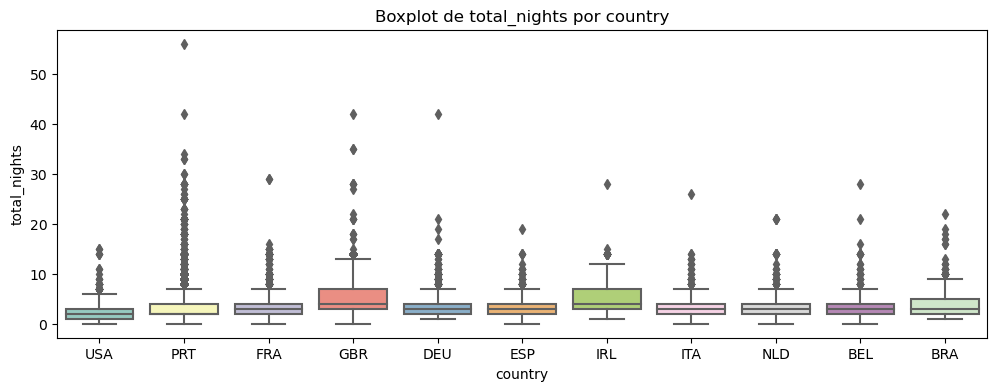

In [1236]:
fig, ax = plt.subplots(figsize=(12, 4))
paises = df[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 900]

df_filtrado = df[df['country'].isin(paises_mayoritarios['country'])]
sns.boxplot(x="country", y="total_nights", data=df_filtrado, palette="Set3", ax=ax)
plt.title('Boxplot de total_nights por country')
plt.show()

En base a la cantidad de dias totales de estadía tampoco podemos encontrar información para asignar los valores nulos restantes, es por esto que decidimos eliminar los registros restantes. En total eliminaríamos 36 registros, un numero muy bajo comparando a la cantidad de registros que tenemos.

In [1237]:
indices = df[df['country'].isna()].index
df.drop(index=indices, inplace=True)
df[df['country'].isna()].shape

(0, 32)

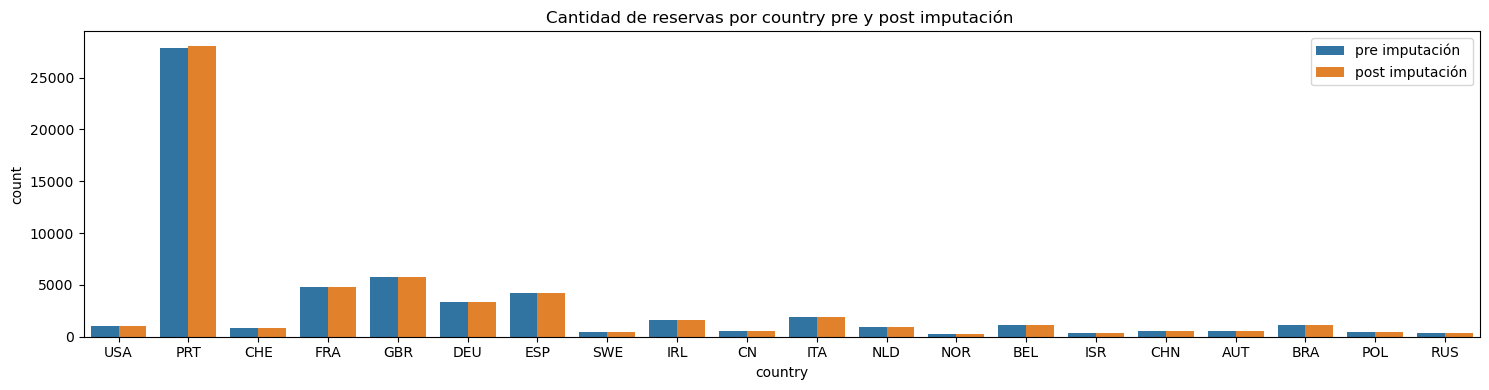

In [1238]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))

country_mayores = df['country'].value_counts().reset_index()
country_mayores.columns = ['country', 'cantidad']
country_mayores_filtrado = country_mayores[country_mayores['cantidad'] > 300]
a = df[df['country'].isin(country_mayores_filtrado['country'])].copy()
b = df_pre_imputation[df_pre_imputation['country'].isin(country_mayores_filtrado['country'])].copy()
a['pre imputación'] = 'no'
b['pre imputación'] = 'si'

c = pd.concat([b, a]) 

sns.countplot(x='country', hue = 'pre imputación', data=c , ax = ax1).set_title("Cantidad de reservas por country pre y post imputación ")
plt.legend(title='', labels=['pre imputación', 'post imputación'])
plt.tight_layout()
plt.show()

Al analizar las distribuciones de los países antes y  después que los datos faltantes hayan sido imputados, podemos ver que se mantienen muy parejas, por lo tanto, podemos asumir que la imputación de los datos fue correcta.

In [1239]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
lead_time                         0
total_nights                      0
is_canceled                       0
id                                0
total_of_special_requests         0
required_car_parking_spaces       0
average_daily_rate                0
customer_type                     0
days_in_waiting_list              0
agent_id                          0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal_type                         0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
day_of_month                

Como podemos observar, ya no tenemos valores faltantes en nuestro dataset.

### Análisis de valores atípicos

In [1240]:
df_con_outliers = df.copy()
df_con_outliers_test = df.copy()
df.describe()

,lead_time,year,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent_id,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,is_canceled,total_nights,total_people
count,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000,61678.000000
mean,112.331172,2016.154642,27.212750,15.784931,0.924171,2.509971,1.868948,0.101317,0.007166,0.027676,0.115163,0.115422,0.194380,80.577645,2.643001,102.547882,0.049791,0.522715,0.500438,3.434142,1.977431
std,110.752845,0.708625,13.517015,8.795278,0.992688,1.882698,0.580497,0.394399,0.092246,0.164044,0.995548,1.398623,0.605231,108.754305,18.635241,47.666062,0.218407,0.774968,0.500004,2.520535,0.729544
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,70.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,78.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,1.000000,3.000000,2.000000
75%,172.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,126.000000,0.000000,1.000000,1.000000,4.000000,2.000000
max,629.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,391.000000,510.000000,2.000000,5.000000,1.000000,56.000000,55.000000


Con esta información podemos ver que hay ciertos valores atípicos en nuestro dataset los cuales vamos a analizar a continuación, los siguientes son:
- lead time
- stays_in_week_nights
- stays_in_weekend_nights
- adults
- children
- babies
- previous cancellation
- previous bookings not canceled
- booking changes
- days in waiting list
- average daily rate
- total special requests

#### lead_time

Vamos a utilizar el z-score modificado para analizar los outliers de esta variable. Esto se debe a que con el z-score normal, un outlier puede seguir distorsionando los datos.

In [1241]:
mediana_lead_time = df['lead_time'].median()
MAD = (np.absolute(df['lead_time']-mediana_lead_time)).median()

df['zm_lead_time']=(df['lead_time'] - mediana_lead_time) * 0.6745 / MAD
df[np.absolute(df['zm_lead_time'] > 3.5)].shape

(1078, 33)

También vamos a realizar un mahalanobis entre lead_time e is_canceled ya que en el heat map se puede ver un poco de correlación.

In [1242]:
def calculate_mahalanobis_distance_2variables(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1, random_state=33)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

df['mahalanobis_lead_time'] = calculate_mahalanobis_distance_2variables(df, 'lead_time', 'is_canceled')['mahalanobis']

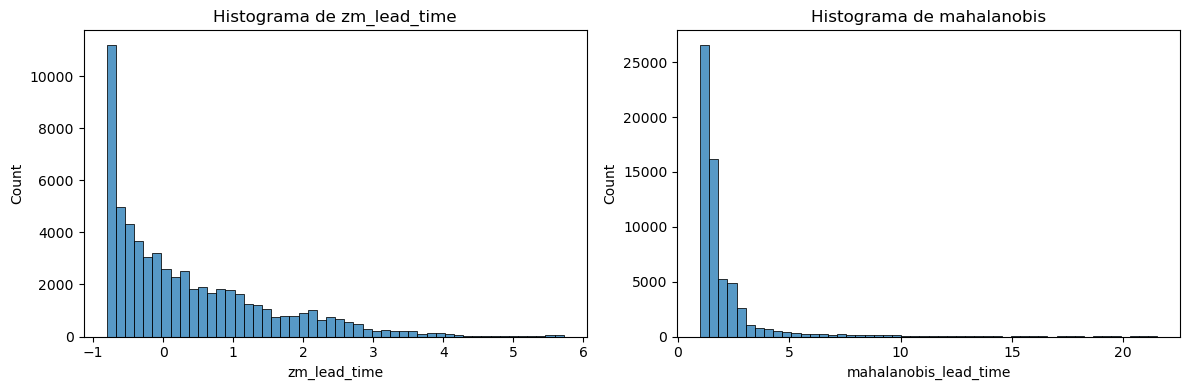

In [1243]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x="zm_lead_time", data=df, bins=50, ax = ax1).set_title("Histograma de zm_lead_time")
sns.histplot(x="mahalanobis_lead_time", data=df, bins=50, ax = ax2).set_title("Histograma de mahalanobis")
plt.tight_layout()
plt.show()

In [1244]:
df[np.absolute(df['mahalanobis_lead_time'] > 8)].shape

(1222, 34)

Como no tenemos la certeza de que los valores más altos suelen cancelar menos/más, tal como sucede con los valores bajos, creemos estar habilitados a borrar alrededor de 1200 registros con outliers, que representan un 1.9% de nuestro dataset.

In [1245]:
indices = df[np.absolute(df['zm_lead_time'] > 3.5)].index
df.drop(index=indices, inplace=True)

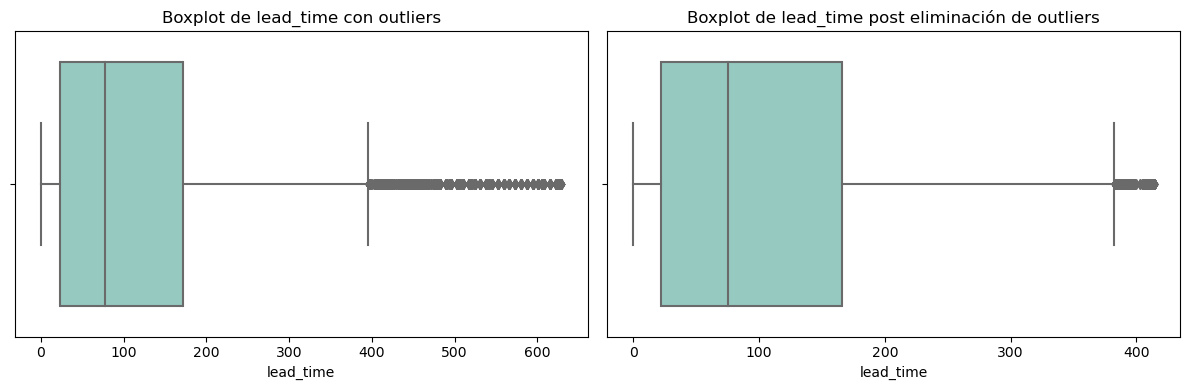

In [1246]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x="lead_time", data=df_con_outliers, palette="Set3", ax = ax1).set_title("Boxplot de lead_time con outliers")
sns.boxplot(x="lead_time", data=df, palette="Set3", ax = ax2).set_title("Boxplot de lead_time post eliminación de outliers")
plt.tight_layout()
plt.show()

#### stays_in_week_nights and stays_in_weekend_nights

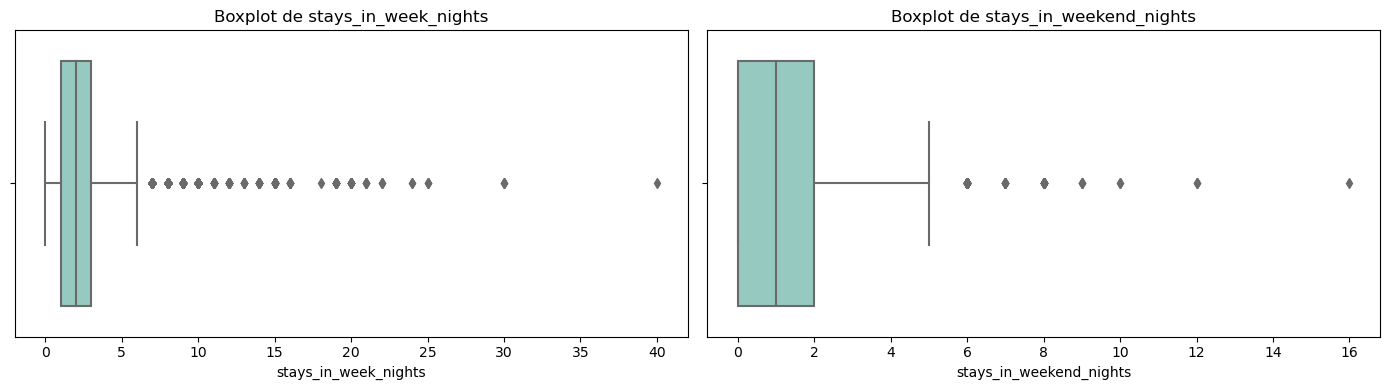

In [1247]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.boxplot(x="stays_in_week_nights", data=a, palette="Set3", ax= ax1).set_title("Boxplot de stays_in_week_nights")
sns.boxplot(x="stays_in_weekend_nights", data=a, palette="Set3", ax=ax2).set_title("Boxplot de stays_in_weekend_nights")
plt.tight_layout()
plt.show()

Calculamos la distancia de mahalanobis entre los 2 ya que están muy correlacionadas. Esto nos dará una mejor información con respecto a los outliers.

In [1248]:
df['mahalanobis_stays_in_week_nights'] = calculate_mahalanobis_distance_2variables(df, 'stays_in_week_nights', 'stays_in_weekend_nights')['mahalanobis']
df[df['mahalanobis_stays_in_week_nights'] > 9.5].shape

(1226, 35)

Aca sacaríamos alrededor de 1200 registros, que representan un 1.9% de nuestro dataset.

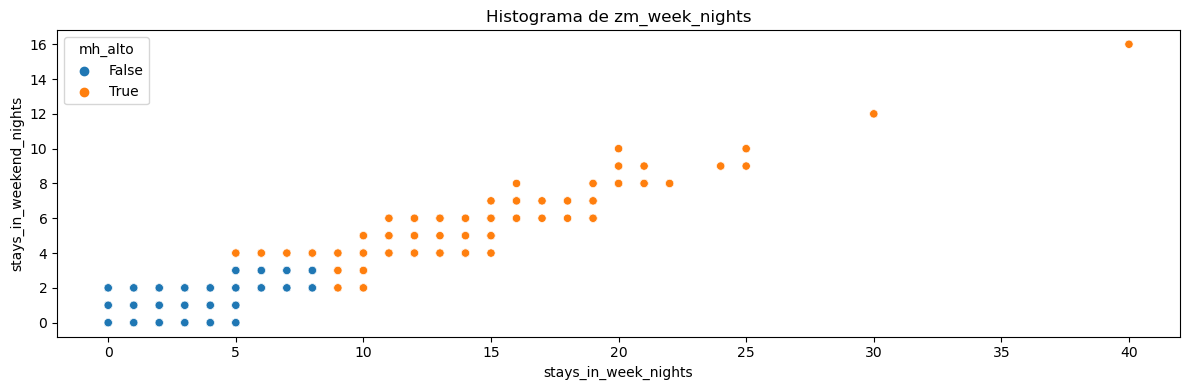

In [1249]:
fig, ax = plt.subplots(figsize=(12, 4))
df['mh_alto'] = df['mahalanobis_stays_in_week_nights'] > 9.5
sns.scatterplot(x="stays_in_week_nights", y = 'stays_in_weekend_nights', hue = 'mh_alto', data=df, ax = ax).set_title("Histograma de zm_week_nights")
plt.tight_layout()
plt.show()

In [1250]:
df.drop(index=df[df['mh_alto'] == True].index, inplace=True)

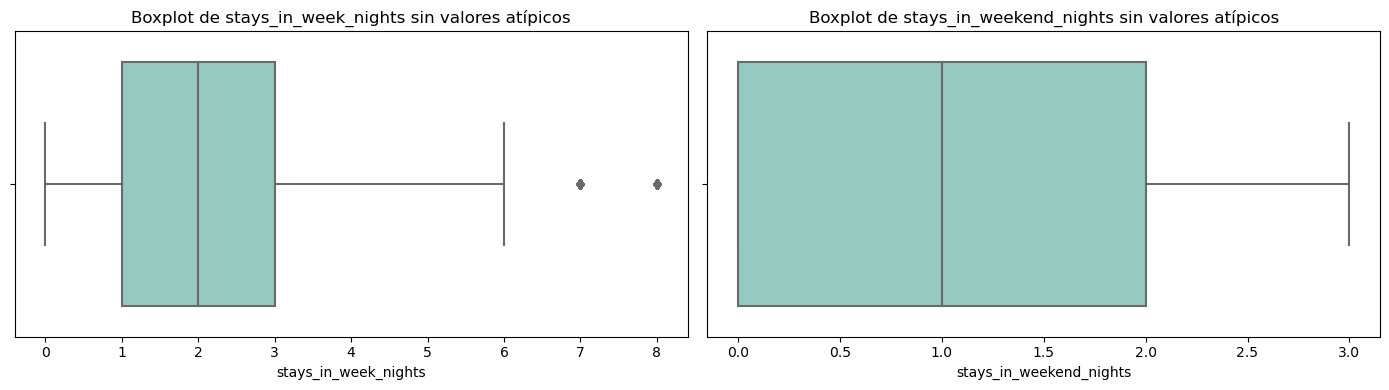

In [1251]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.boxplot(x="stays_in_week_nights", data=df, palette="Set3", ax= ax1).set_title("Boxplot de stays_in_week_nights sin valores atípicos")
sns.boxplot(x="stays_in_weekend_nights", data=df, palette="Set3", ax=ax2).set_title("Boxplot de stays_in_weekend_nights sin valores atípicos")
plt.tight_layout()
plt.show()

Si bien quedan algunos posibles valores atípicos de manera univariada, al analizarlos de manera multivariada, podemos ver que quizás no son tan atípicos como parecían.

#### adults

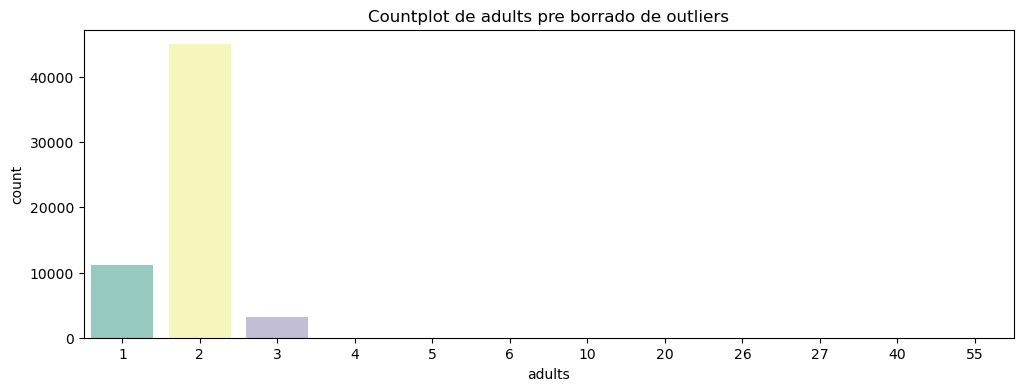

In [1252]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x="adults", data=df, palette="Set3", ax=ax)
plt.title('Countplot de adults pre borrado de outliers')
plt.show()

Como no es normal que una reserva tenga mas de 20 adultos, vamos a eliminar estos registros del dataset.

In [1253]:
indices = df[df['adults'] > 20].index
df.drop(index=indices, inplace=True)
mediana_adults = df['adults'].median()
MAD = (np.absolute(df['adults']-mediana_adults)).median()
print("El valor de mad es: ", MAD)

El valor de mad es:  0.0


Como el mad da 0, el z-score modificado da infinito, por lo tanto no es una buena herramienta para utilizar en este caso. Es por ello que vamos usar el z-score normal, pero ya habiendo sacado reservas con valores irrisorios de adultos.

In [1254]:
df['z_adults']=st.zscore(df['adults'])
df[np.absolute(df['z_adults'] > 3)].shape

(35, 37)

In [1255]:
indices = df[np.absolute(df['z_adults'] > 3)].index
df.drop(index=indices, inplace=True)

Como ya comprobamos que la variable adults no impacta en nuestro target y, tenemos una cantidad muy baja de registros con valores atípicos, decidimos eliminarlos.

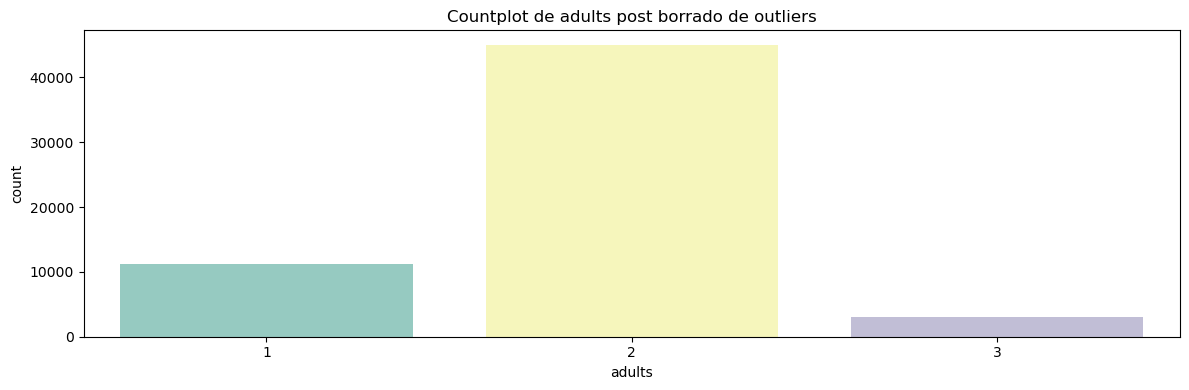

In [1256]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
sns.countplot(x="adults", data=df, palette="Set3", ax=ax1).set_title("Countplot de adults post borrado de outliers")
plt.tight_layout()
plt.show()

#### children

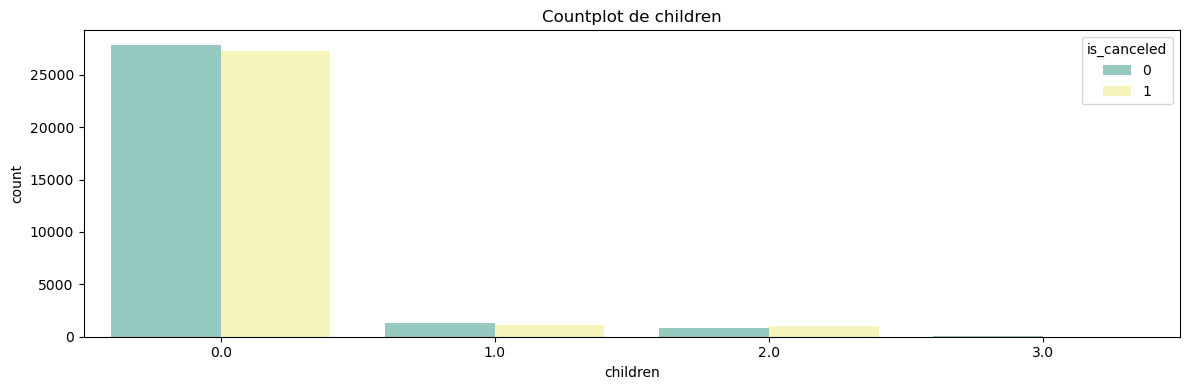

In [1257]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x="children", data=df, hue = 'is_canceled', palette="Set3", ax=ax)
plt.title('Countplot de children')
plt.tight_layout()
plt.show()

In [1258]:
df['z_children'] = st.zscore(df['children'])
df[np.absolute(df['z_children'] > 5)].shape

(35, 38)

Si bien, 5 desvíos estándares es demasiado, consideramos preservar los valores con 1 y 2. Con esto eliminamos los registros con 3 children ya que hay un porcentaje muy bajo de reservas con esa cantidad de niños. 

In [1259]:
df.drop(index=df[np.absolute(df['z_children'] > 5)].index, inplace=True)

In [1260]:
df[df['children'] > 0]['is_canceled'].value_counts()

0    2125
1    2069
Name: is_canceled, dtype: int64

In [1261]:
df['mahalanobis_children'] = calculate_mahalanobis_distance_2variables(df, 'children', 'average_daily_rate')['mahalanobis']

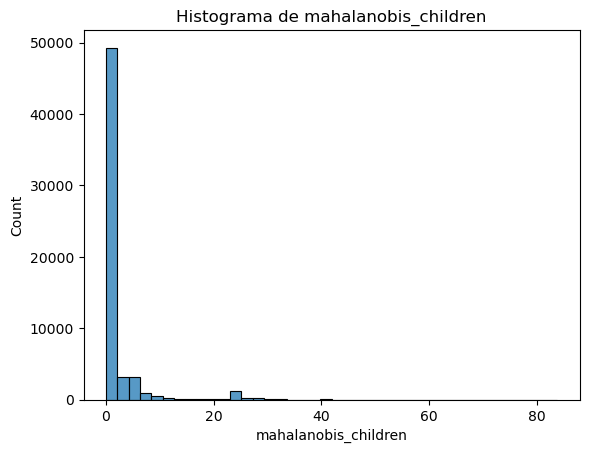

(610, 39)

In [1262]:
sns.histplot(x="mahalanobis_children", data=df, bins=40).set_title("Histograma de mahalanobis_children")
plt.show()
display(df[df['mahalanobis_children'] > 25].shape)

El análisis multivariado tampoco que nos aporto mucha información extra respecto del tema. Es por esto que decidimos dejar los registros con 1 y 2 niños, los cuales podrían ser considerados outliers. Sin embargo, son valores razonables dentro del rango posible y, si borramos todos dejaríamos una columna entera de ceros la cual no va a aportar información a futuro. Cabe destacar que había registros con mas niños, sin embargo fueron eliminados en análisis previos

#### babies

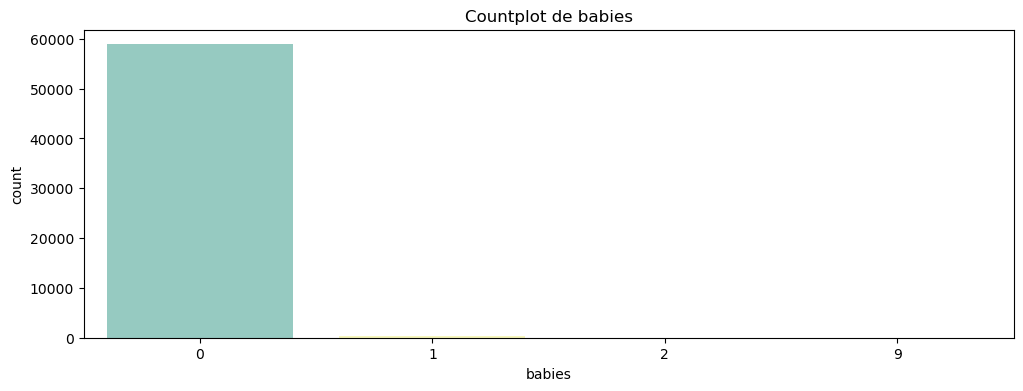

In [1263]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x="babies", data=df, palette="Set3", ax=ax)
plt.title('Countplot de babies')
plt.show()

Primero borramos los registros con nueve bebes ya que esto no tiene sentido. Tiene un solo adulto para nueve bebes.

In [1264]:
display(df[df['babies'] >= 9])
index = df[df['babies'] >= 9].index
df.drop(index=index, inplace=True)

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,total_people,zm_lead_time,mahalanobis_lead_time,mahalanobis_stays_in_week_nights,mh_alto,z_adults,z_children,mahalanobis_children
12659,City Hotel,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,0,Transient-Party,95.0,0,0,a864cf91-980a-48da-9b71-c0b487096239,0,3,10.0,-0.695254,1.434846,3.30941,False,-1.793841,-0.259841,0.070659


In [1265]:
df['z_babies']=st.zscore(df['babies'])
display(df[np.absolute(df['z_babies'] > 3)].shape)
df[df['babies'] > 0].shape

(417, 40)

(417, 40)

Si bien los valores de 1 y 2 de esta variable son claramente outliers, los vamos a dejar ya que con nuestro análisis previo notamos una patron con nuestra variable target, por más de que sean muy pocos registros.

#### previous_cancellations

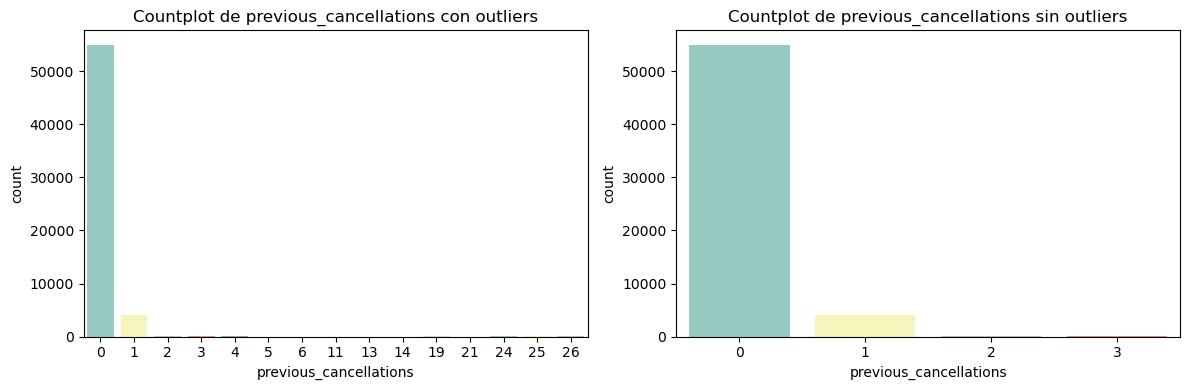

In [1266]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df['z_previous_cancellations']=st.zscore(df['previous_cancellations'])

sns.countplot(x="previous_cancellations", data=df, palette="Set3", ax=ax1).set_title("Countplot de previous_cancellations con outliers")
sns.countplot(x="previous_cancellations", data=df[(np.absolute(df['z_previous_cancellations']) < 3)], palette="Set3", ax=ax2).set_title("Countplot de previous_cancellations sin outliers")
plt.tight_layout()
plt.show()

In [1267]:
display(df[(np.absolute(df['z_previous_cancellations'] ) > 3)].shape)
indices = df[(np.absolute(df['z_previous_cancellations'] ) > 3)].index
df.drop(index=indices, inplace=True)

(162, 41)

Para previous_cancellations decidimos usar el z-score normal ya que en el modificado el MAD era igual a 0, resultando en NaNs. Como podemos ver, hay pocos valores atípicos, por lo tanto, decidimos eliminarlos. Al ver la distribución posterior, podemos observar que esta mucho mas limpia, donde hay pocos valores donde la cantidad es menor a los 5000.

#### previous_bookings_not_canceled

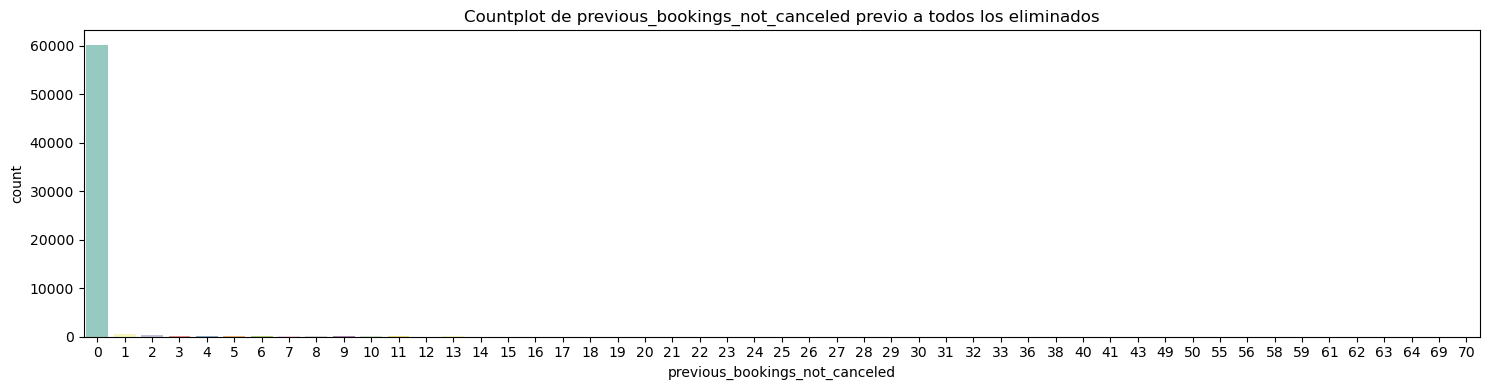

In [1268]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.countplot(x="previous_bookings_not_canceled", data = df_con_outliers, palette="Set3", ax=ax1)
plt.title('Countplot de previous_bookings_not_canceled previo a todos los eliminados')
plt.tight_layout()
plt.show()

In [1269]:
df[df['previous_bookings_not_canceled'] > 45].shape

(0, 41)

Aca nos damos cuenta que en las eliminaciones previas, también se eliminaron los registros con mas de 45 previous bookings not canceled.

Como podemos ver, la gran mayoría de los valores de nuestra variable suceden muy poco, exceptuando el cero obviamente. Es por esto que vamos a realizar un test de z-score para ver si hay outliers. No realizamos un modificado ya que el MAD da cercano a cero, y por lo tanto, el z-score modificado da infinito. 

In [1270]:
df['z_previous_bookings_not_canceled']=st.zscore(df['previous_bookings_not_canceled'])
df[np.absolute(df['z_previous_bookings_not_canceled'] > 3)].head()

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,total_people,zm_lead_time,mahalanobis_lead_time,mahalanobis_stays_in_week_nights,mh_alto,z_adults,z_children,mahalanobis_children,z_babies,z_previous_cancellations,z_previous_bookings_not_canceled
227,Resort Hotel,33,2017,July,28,12,0,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,8,A,A,0,No Deposit,240.0,0,Transient,135.0,0,0,c416e24d-7d73-402a-82f5-e40334db1c17,0,2,1.0,-0.466962,1.210242,0.973170,False,-1.793841,-0.259841,0.740330,-0.083487,-0.116773,7.606838
267,Resort Hotel,0,2016,April,15,6,0,1,1,0.0,0,BB,PRT,Direct,Direct,1,0,6,A,D,0,No Deposit,-1.0,0,Transient,50.0,0,1,a666c3a2-18ae-48b3-9a4b-d224225fa146,0,1,1.0,-0.809400,1.579061,1.095131,False,-1.793841,-0.259841,1.203299,-0.083487,-0.116773,5.681697
735,City Hotel,45,2016,April,16,11,1,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,7,E,E,1,No Deposit,1.0,0,Transient,106.0,0,1,f282ff4b-d60a-4978-b394-5645e467c619,0,2,1.0,-0.342438,1.123601,0.881813,False,-1.793841,-0.259841,0.097527,-0.083487,-0.116773,6.644267
768,Resort Hotel,0,2016,March,13,23,0,1,1,0.0,0,BB,PRT,Online TA,Direct,1,0,7,A,A,0,No Deposit,314.0,0,Transient,42.4,0,0,50c9d6cb-c8b0-47e8-9619-bee3f60d14d5,0,1,1.0,-0.809400,1.579061,1.095131,False,-1.793841,-0.259841,1.591702,-0.083487,-0.116773,6.644267
867,City Hotel,6,2016,June,24,8,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,1.0,0,Transient,65.0,0,1,3e41be78-9f00-46a6-a917-5670c13fd289,0,1,1.0,-0.747138,1.497761,1.095131,False,-1.793841,-0.259841,0.603868,-0.083487,-0.116773,3.756556


Pasando el tercer desvío estándar, ya son considerados outliers. Sin embargo, vamos a determinar cierto umbral a la hora de borrarlos debido a que habíamos notado que si las previous bookings not canceled eran mayores a 0, era mucho mas probable que no cancelen la reserva. Cabe aclarar que son muy pocos registros de todas maneras.

In [1271]:
display(df[np.absolute(df['z_previous_bookings_not_canceled'] > 3)].shape)
df.drop(index=df[np.absolute(df['z_previous_bookings_not_canceled'] > 3)].index, inplace=True)

(452, 42)

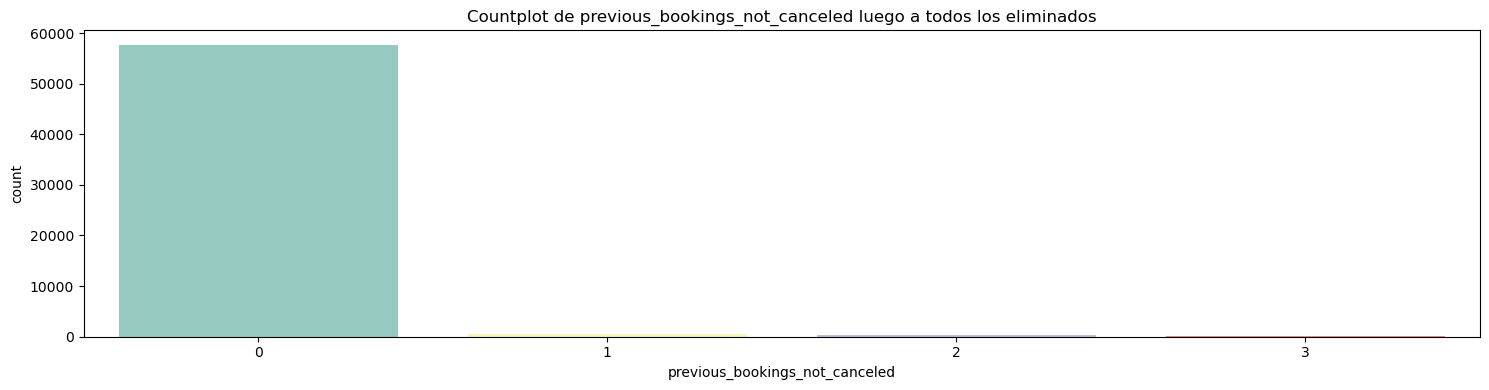

In [1272]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.countplot(x="previous_bookings_not_canceled", data = df, palette="Set3", ax = ax1)
plt.title('Countplot de previous_bookings_not_canceled luego a todos los eliminados')
plt.tight_layout()
plt.show()

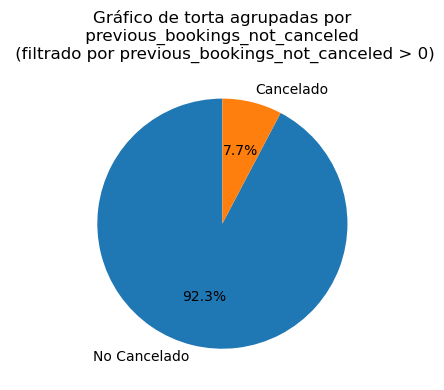

In [1273]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
cantidad_mayor_a_0 = df[df['previous_bookings_not_canceled'] > 0].reset_index()
conteo_cancelados_mayor_a_0 = cantidad_mayor_a_0["is_canceled"].value_counts().sort_index().reset_index()
conteo_cancelados_mayor_a_0.columns = ['categoria','cantidad']
conteo_cancelados_mayor_a_0['categoria'] = conteo_cancelados_mayor_a_0['categoria'].apply(lambda x: 'No Cancelado' if x == 0 else 'Cancelado')
ax1.pie(conteo_cancelados_mayor_a_0['cantidad'], labels=conteo_cancelados_mayor_a_0['categoria'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Gráfico de torta agrupadas por\n previous_bookings_not_canceled \n (filtrado por previous_bookings_not_canceled > 0)')
plt.tight_layout()
plt.show()

Como podemos ver, luego del borrado de outliers se sigue manteniendo esa tendencia. Tomamos la correcta decisión de respetar la regla de oro con el z-score.

#### booking_changes

(652, 43)

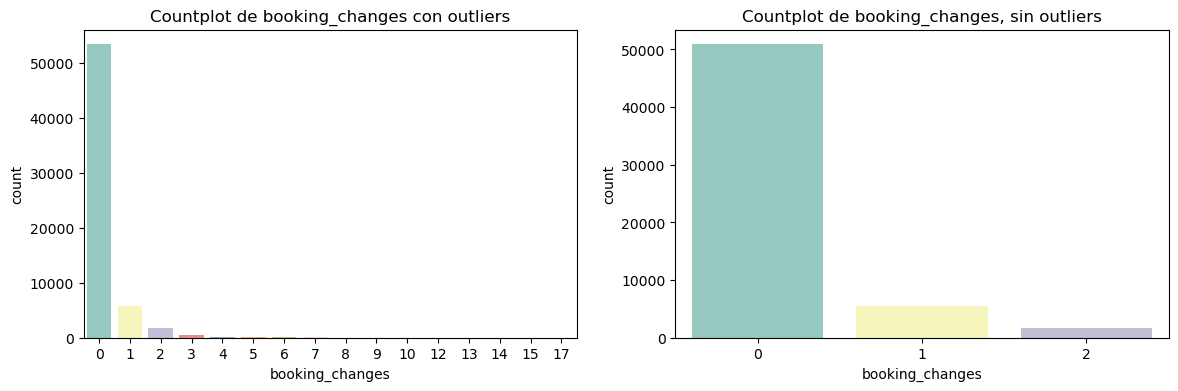

In [1274]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

df['z_booking_changes'] = st.zscore(df['booking_changes'])
display(df[np.absolute(df['z_booking_changes']) > 3.5].shape)

sns.countplot(x="booking_changes", data=df_con_outliers, palette="Set3", ax= ax1).set_title("Countplot de booking_changes con outliers")
sns.countplot(x="booking_changes", data=df[np.absolute(df['z_booking_changes']) < 3.5], palette="Set3", ax= ax2).set_title("Countplot de booking_changes, sin outliers")
plt.show()

Como se puede ver en el gráfico, los valores están muy dispersos, decidimos aplicar z-score para identificar outliers y pudimos detectar aproximadamente 600 registros que están a mas de 3.5 desvíos estándar. Decidimos utilizar 3.5 en lugar de 3, ya que si utilizábamos 3, se eliminaban muchos registros y no nos parecía correcto teniendo en cuenta que tiene cierta correlación con la variable target.

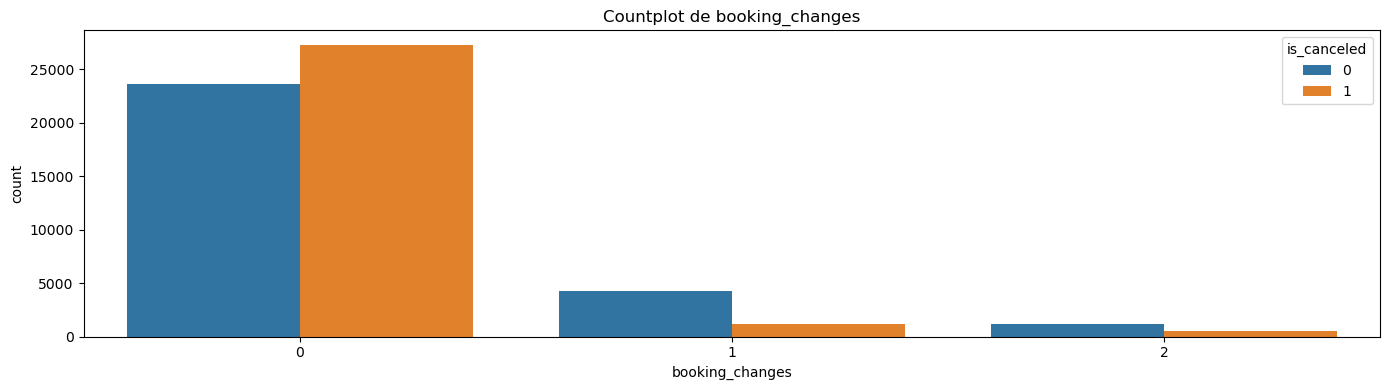

In [1275]:
indices = df[np.absolute(df['z_booking_changes']) > 3.5].index
df.drop(index=indices, inplace=True)

fig, (ax1) = plt.subplots( figsize=(14, 4))

sns.countplot(data=df, x='booking_changes', hue='is_canceled', ax=ax1).set_title("Countplot de booking_changes")
plt.tight_layout()
plt.show()


Como se puede ver, aun después de haber realizado la limpieza de valores atípicos, sigue habiendo cierta correlación con la variable target.

#### days_in_waiting_list

In [1276]:

df['z_days_in_waiting_list'] = st.zscore(df['days_in_waiting_list'])
display(df[np.absolute(df['z_days_in_waiting_list'] > 3)].shape)

df.drop(index=df[np.absolute(df['z_days_in_waiting_list'] > 3)].index, inplace=True)

display('Varianza con outliers: ' + f"{round(df_con_outliers['days_in_waiting_list'].std(), 2)}")
display("Varianza sin outliers: " +f"{round(df[np.absolute(df['z_days_in_waiting_list'] < 3)]['days_in_waiting_list'].std(), 2)}")

(1092, 44)

'Varianza con outliers: 18.64'

'Varianza sin outliers: 4.41'

Para analizar los dias en lista de espera utilizamos otra métrica, ya que los valores son muy dispersos y no se puede apreciar bien en el boxplot. Utilizamos el z-score para identificar outliers y pudimos detectar aproximadamente 1000 registros que están a mas de 3 desvíos estándar. Luego de eliminar estos valores atípicos, comparamos las varianzas y pudimos ver que la distribución ahora es mucho mas compacta, habiendo eliminado pocos registros.

#### average_daily_rate

Para el average_daily_rate vamos a utilizar el z-score modificado ya que el z-score normal puede estar sesgado por los valores atípicos. Siguiendo la 'regla de oro', vamos a eliminar todos los valores que estén a mas de 3.5 desvíos estándar

In [1277]:
mediana_average_daily_rate=np.median(df['average_daily_rate'])
MAD=np.median(np.absolute(df['average_daily_rate']-mediana_average_daily_rate))

df['zm_average_daily_rate']=(df['average_daily_rate'] - mediana_average_daily_rate)*0.6745/MAD
df[np.absolute(df['zm_average_daily_rate'] > 3.5)].shape
df.drop(index=df[np.absolute(df['zm_average_daily_rate'] > 3.5)].index, inplace=True)

También notamos que hay valores menores que 0. Esto es imposible ya que el average daily rate se calcula mediante la siguiente formula:

$$
ADR = \frac{Suma\ de\ todos\ los\ ingresos\ de\ habitaciones}{Cantidad\ de\ habitaciones\ vendidas}
$$

Por lo tanto, no puede ser menor a 0. Es por esto que vamos a eliminar estos registros.

In [1278]:
indices = df[df['average_daily_rate'] < 0].index
df.drop(index=indices, inplace=True)

In [1279]:
display(df[(df['average_daily_rate'] == 0)].shape)
df[(df['average_daily_rate'] == 0) & (df['deposit_type'] != 'No Deposit')].shape

(721, 45)

(0, 45)

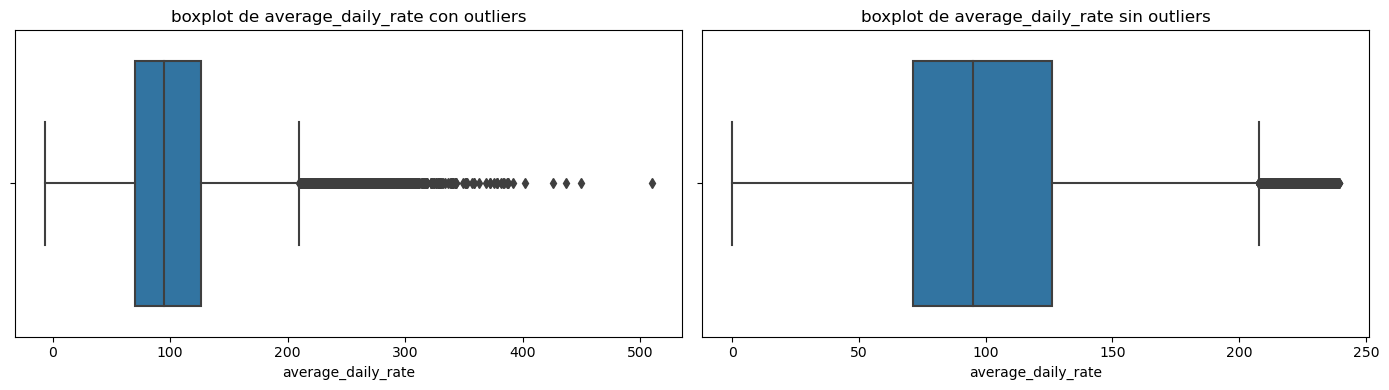

In [1280]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(x="average_daily_rate", data=df_con_outliers, ax= ax1).set_title("boxplot de average_daily_rate con outliers")
sns.boxplot(x="average_daily_rate", data=df, ax= ax2).set_title("boxplot de average_daily_rate sin outliers")

plt.tight_layout()
plt.show()

Ademas vimos que también hay valores con 0, lo cual al principio nos hizo un poco de ruido ya que si hay una reserva, entonces debe haber un ingreso. Sin embargo no consideramos que al realizar reservas no siempre haya ingreso, ya que la mayoría de reservas son sin depósito. Por eso corroboramos que la cantidad de reservas con 0 de average daily rate sean las mismas que las reservas sin deposito, y efectivamente lo son. Por lo tanto, no vamos a eliminar estos registros.

#### total_of_special_requests

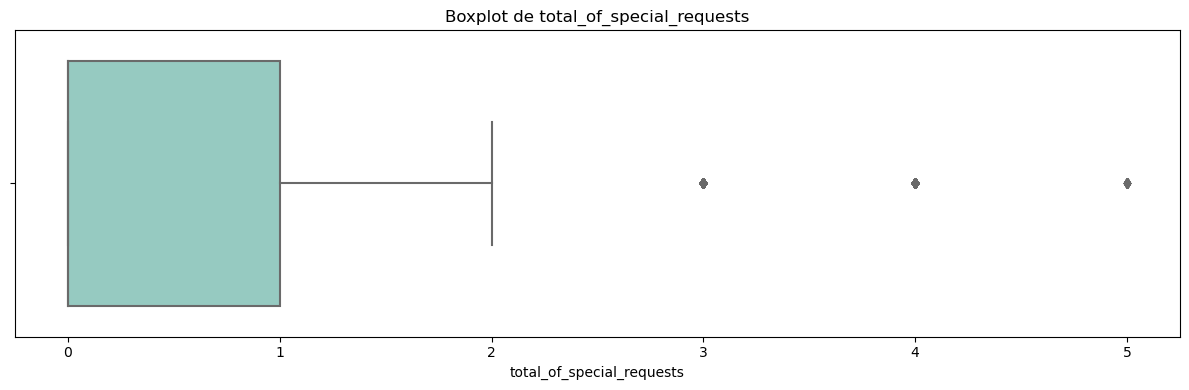

In [1281]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(x="total_of_special_requests", data=df_con_outliers, palette="Set3", ax=ax).set_title("Boxplot de total_of_special_requests")
plt.tight_layout()
plt.show()

Poemos notar unos posibles outliers en la variable total_of_special_requests cuando el total_of_special_requests > 2. Para profundizar esto, vamos a realizar un z-score normal para ver si hay outliers. Utilizamos un zscore normal ya que con valores tan puntuales el zscore modificado trae inconvenientes.

In [1282]:
df['z_total_of_special_requests']=st.zscore(df['total_of_special_requests'])
df[np.absolute(df['z_total_of_special_requests'] > 3)].shape

(1190, 46)

In [1283]:
df['mahalanobis_total_of_special_requests'] = calculate_mahalanobis_distance_2variables(df, 'total_of_special_requests', 'is_canceled')['mahalanobis']
df[df['mahalanobis_total_of_special_requests'] > 11].shape

(431, 47)

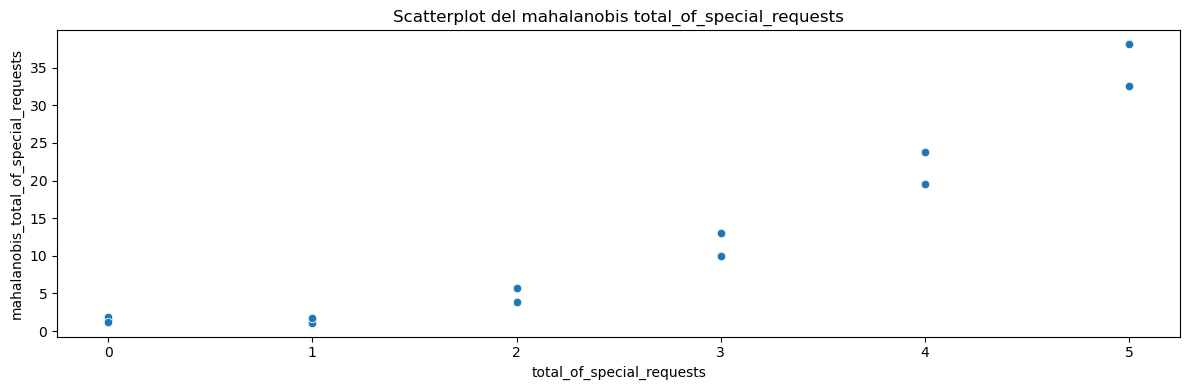

In [1284]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(x="total_of_special_requests", y="mahalanobis_total_of_special_requests", data=df, ax=ax).set_title("Scatterplot del mahalanobis total_of_special_requests")
plt.tight_layout()
plt.show()

Como el z-score normal nos da alrededor de un total del 1200 registros a eliminar, lo cual es casi un 1.9% de nuestro dataset, decidimos hacer un análisis multivariado por medio de mahalanobis para determinar un umbral mas acertado. Con esto determinamos un umbral de 11 para borrado de outliers, el cual baja el numero de registros eliminados a 445, un 0.7% de nuestro dataset.

In [1285]:
df.drop(index=df[df['mahalanobis_total_of_special_requests'] > 11].index, inplace=True)

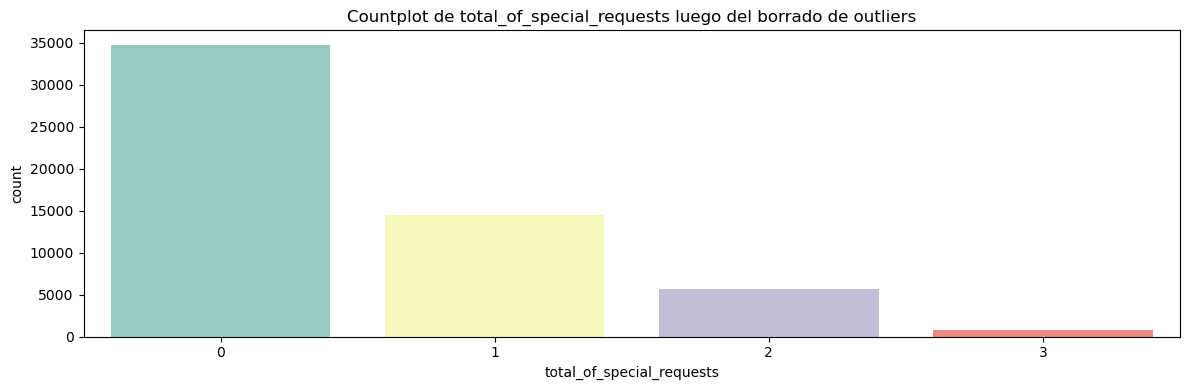

In [1286]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x="total_of_special_requests", data=df, palette="Set3", ax=ax).set_title("Countplot de total_of_special_requests luego del borrado de outliers")
plt.tight_layout()
plt.show()

Ahora eliminamos todas las columnas auxiliares que utilizamos para el borrado de outliers.

In [1287]:
df.columns
nombre_columna_final = 'total_people'
df = df.loc[:, :nombre_columna_final]

df.shape

(55655, 32)

In [1288]:
df.describe()

,lead_time,year,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent_id,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,is_canceled,total_nights,total_people
count,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000,55655.000000
mean,103.732746,2016.147947,27.021741,15.805049,0.867451,2.353751,1.863462,0.088815,0.006289,0.021813,0.071207,0.026556,0.150139,78.146043,0.555332,100.923968,0.048531,0.505795,0.494978,3.221202,1.958566
std,99.213806,0.711323,13.546683,8.778102,0.864226,1.496833,0.468727,0.362914,0.080181,0.146074,0.260504,0.223207,0.430021,107.608911,4.456333,42.899969,0.215472,0.732456,0.499979,1.923903,0.619754
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,71.100000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,73.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,0.000000,3.000000,2.000000
75%,162.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,173.000000,0.000000,125.800000,0.000000,1.000000,1.000000,4.000000,2.000000
max,414.000000,2017.000000,53.000000,31.000000,3.000000,8.000000,3.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,535.000000,47.000000,239.300000,2.000000,3.000000,1.000000,11.000000,5.000000


Como se puede ver, luego de nuestro análisis de valores atípicos la distribución de las variables es mucho mas limpia, y se puede apreciar mejor la distribución de los datos, exceptuando ciertos casos que ya fue explicada anteriormente la razón por la cual decidimos conservar posibles outliers.

#### Variables Categóricas

##### market_segment

In [1289]:
df['market_segment'].value_counts().reset_index()

,index,market_segment
0,Online TA,27168
1,Offline TA/TO,10880
2,Groups,9998
3,Direct,5149
4,Corporate,2062
5,Complementary,297
6,Aviation,99
7,Undefined,2


In [1290]:
df[df['market_segment'] == 'Undefined'].head()

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,total_people
27359,City Hotel,1,2015,August,32,5,0,2,3,0.0,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,1.0,0,Transient-Party,18.0,0,2,6ad2b270-d3ae-464f-9d4d-0722e4c4e7bc,1,2,3.0
58511,City Hotel,2,2015,August,32,3,1,0,2,0.0,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,1.0,0,Transient-Party,12.0,0,1,d94b4fca-243f-498c-a52f-14b52e7e5e72,1,1,2.0


Esos dos registros con undefined que habíamos notado previamente van a ser eliminados ya que no aportan información relevante al análisis debido a que son muy pocos registros. Sumado a esto, en el paper no se especifica que significa undefined.

In [1291]:
df.drop(index = df[df['market_segment'] == 'Undefined'].index, inplace=True)

##### distribution_channel

In [1292]:
df['distribution_channel'].value_counts().reset_index()

,index,distribution_channel
0,TA/TO,46832
1,Direct,6074
2,Corporate,2658
3,GDS,87
4,Undefined,2


Aca notamos lo mismo que en market_segment, hay dos registros con undefined que vamos a eliminar.

In [1293]:
df.drop(index = df[df['distribution_channel'] == 'Undefined'].index, inplace=True)

##### reserved_room_type and assigned_room_type

In [1294]:
df['reserved_room_type'].value_counts().reset_index()
df['assigned_room_type'].value_counts().reset_index()
df.drop(index = df[df['assigned_room_type'] == 'L'].index, inplace=True)

Eliminamos las reservas con habitación de tipo L ya que son muy pocas y no aportan información relevante al análisis.

##### country

A pesar que haya mucha dispersion en los datos, decidimos mantener todos ya que son muchos países los que tienen pocos registros, y no consideramos que sea necesario tener una cantidad minima de registros por país para poder analizarlos.  Ademas, si decidiéramos eliminarlos estaríamos perdiendo un gran volumen de datos.

##### agent_id

Similar a lo que sucedía con country, agent_id tiene mucha dispersion de valores. Sin embargo esta dispersion no representan valores atípicos, sino que son agentes que no tienen muchas reservas. Es por esto que decidimos mantenerlos.

#### Registros totales borrados

In [1295]:
df_original.shape[0] - df.shape[0]

6263

Luego del análisis de los valores atípicos, podemos ver que limpiamos un 10% de nuestro dataset. Nos parece un numero razonable ya que no queremos perder mucha información, pero tampoco queremos que los outliers nos sesguen el análisis.

## Árboles de decisión

In [1296]:
df_arboles = df.copy()
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, precision_recall_curve, roc_curve
from sklearn.metrics import confusion_matrix, classification_report

A continuación, vamos a realizar un análisis de árboles de decisión para poder ver que variables son las mas importantes a la hora de predecir si una reserva se va a cancelar o no. Primero optamos por crear un modelo simple sin busqueda de los mejoras hiperparámetros para lograr esto. Luego, vamos a realizar una búsqueda de hiperparámetros para ver si podemos mejorar el modelo. 

In [1297]:
columnas = [
  'hotel', 
  'lead_time',
  'required_car_parking_spaces',
  'deposit_type',
  'total_of_special_requests',
  'week_number',
  'average_daily_rate'
]
target = 'is_canceled'
df_filtrado = df_arboles[['hotel', 'lead_time', 'required_car_parking_spaces', 'deposit_type', 'total_of_special_requests', 'week_number', 'average_daily_rate', 'is_canceled']]
df_con_dummies = pd.get_dummies(df_filtrado, columns=['hotel', 'deposit_type'])

df_trabajo_x = df_con_dummies.drop(['is_canceled'], axis='columns', inplace=False)
df_trabajo_y = df_con_dummies['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.3,    
                                                    random_state=13,  
                                                    stratify=df_con_dummies[target].values) 

Con esto ya tenemos nuestro data frame dividido en train y test para usar con nustro árbol de decisión.

In [1652]:
modelo_de_arbol = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 50,
                                         min_samples_leaf = 20,
                                         ccp_alpha=0.00018336389398233038, 
                                         random_state=13)

In [1299]:
modelo1 = modelo_de_arbol.fit(X = x_train, y = y_train)

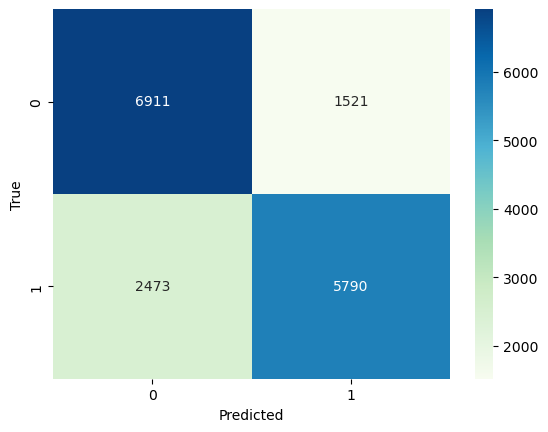

In [1300]:
y_prediccion = modelo1.predict(x_test)
df_resultados = pd.DataFrame(zip(y_test,y_prediccion), columns=['test','pred'])
tabla = confusion_matrix(y_test, y_prediccion)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Es un buen comienzo, pero vamos a seguir jugando con las variables elegidas. Nuestro objetivo es mejorar el f1 score ya que es la métrica uqe va a utilizar kaggle.

In [1301]:
def mostrar_scores(y_test, y_prediccion):
    accuracy = accuracy_score(y_test,y_prediccion)
    recall = recall_score(y_test,y_prediccion)
    f1 = f1_score(y_test,y_prediccion,)
    precision = precision_score(y_test,y_prediccion)

    print("Accuracy: "+str(accuracy))
    print("Recall: "+str(recall))
    print("Precision: "+str(precision))
    print("f1 score: "+str(f1))

In [1302]:
mostrar_scores(y_test, y_prediccion)

Accuracy: 0.7607666966157532
Recall: 0.7007140263826698
Precision: 0.7919573245794009
f1 score: 0.7435469372030308


Ahora vamos a intentar sumando la variable del país pero filtrada de distintas maneras ya que hay multiples opciones de país. En primer lugar, vamos a filtrar los países que tengan mas de 1000 reservas y vamos a ver si mejora el modelo. En segundo lugar, vamos filtrar en base de si es de Portugal o no, ya que ahi se encuentra el patron encontrado.

#### Paises con mas de 1000 reservas

Primero, comenzamos filtrando los países com mas de 1000 reservas. Luego, al resto de los países los metemos bajo una categoría de 'Otros'. Esto lo hacemos para reducir la cantidad de variables dummies y poder analizar mejor el modelo.

In [1303]:
paises = df_arboles[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 800]
paises_minoritarios = paises[paises['cantidad'] <= 800]

df_paises_mayoritarios = df_arboles[df_arboles['country'].isin(paises_mayoritarios['country'])]
df_paises_minoritarios = df_arboles[df_arboles['country'].isin(paises_minoritarios['country'])]
df_paises_minoritarios.loc[df_arboles['country'].isin(paises_minoritarios['country']),'country'] = 'Otros'

df_paises = pd.concat([df_paises_mayoritarios, df_paises_minoritarios])

Luego generamos un test_train_split para poder entrenar nuestro modelo y ver que tan bien predice.

In [1304]:
df_filtrado = df_paises[['hotel', 'lead_time', 'required_car_parking_spaces', 'deposit_type', 'total_of_special_requests', 'week_number', 'average_daily_rate', 'is_canceled', 'country']]
df_con_dummies = pd.get_dummies(df_filtrado, columns=['hotel', 'deposit_type', 'country'])

df_trabajo_x = df_con_dummies.drop(['is_canceled'], axis='columns', inplace=False)
df_trabajo_y = df_con_dummies['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.3,    
                                                    random_state=13,  
                                                    stratify=df_con_dummies[target].values) 


Por último, entrenamos el modelo, predicteamos y mostramos los resultados con la matriz de confusión y su respectivos scores.

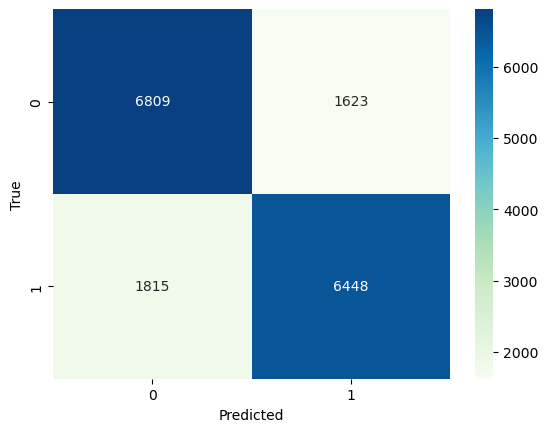

In [1305]:
modelo_2 = modelo_de_arbol.fit(X = x_train, y = y_train)
y_prediccion = modelo_2.predict(x_test)
tabla=confusion_matrix(y_test, y_prediccion)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [1306]:
mostrar_scores(y_test, y_prediccion)

Accuracy: 0.7940700808625337
Recall: 0.7803461212634636
Precision: 0.7989096766199976
f1 score: 0.7895187951512183


Podemos notar que todas las métricas subieron notablemente, lo cual es un gran avance. Sin embargo, vamos a seguir probando con otras opciones.

#### Encode Portugal - No Portugal

Luego de haber generado un modelo con los países con mas de 1000 reservas, vamos a probar con un modelo donde solo tengamos dos categorías, Portugal y el resto de los países. Esto lo hacemos ya que notamos que Portugal es el país que más cancela reservas, y por lo tanto, puede ser un buen predictor.

In [1307]:
df_encode = df_arboles.copy()
df_encode['es_portugal'] = df_encode['country'].apply(lambda x: 1 if x == 'PRT' else 0)

df_filtrado = df_encode[['hotel', 'lead_time', 'required_car_parking_spaces', 'deposit_type', 'total_of_special_requests', 'week_number', 'average_daily_rate', 'is_canceled', 'es_portugal']]

df_con_dummies = pd.get_dummies(df_filtrado, columns=['hotel', 'deposit_type'])

df_trabajo_x = df_con_dummies.drop(['is_canceled'], axis='columns', inplace=False)
df_trabajo_y = df_con_dummies['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.3,    
                                                    random_state=13,  
                                                    stratify=df_con_dummies[target].values)


Luego entrenamos el modelo, predecimos y mostramos los resultados con la matriz de confusión y su respectivos scores.

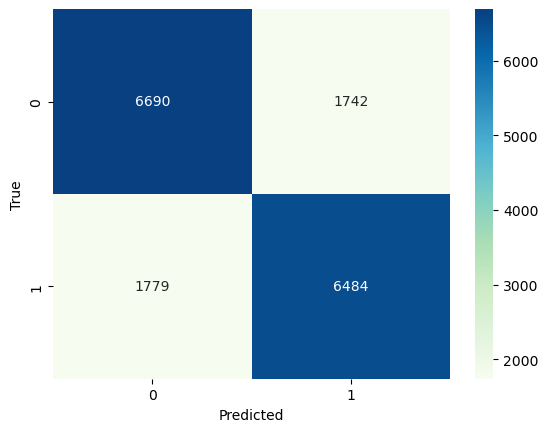

In [1308]:
modelo_3 = modelo_de_arbol.fit(X = x_train, y = y_train)
y_prediccion = modelo_3.predict(x_test)
tabla=confusion_matrix(y_test, y_prediccion)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [1309]:
mostrar_scores(y_test, y_prediccion)

Accuracy: 0.7890985324947589
Recall: 0.7847028924119569
Precision: 0.788232433746657
f1 score: 0.7864637030747771


Como podemos ver el modelo no mejoro al realizar este encoding, a pesar que la presicion aumento, el recall, accuracy y f1 score disminuyeron. Es por esto que vamos a quedarnos con la opcion anterior.

#### Unas variables más...

Por último, vamos a agregar esta variable ya que tenía bastante correlacion con el target, pero no la habíamos utilizado ya que sus registros en la gran mayoría valen cero.

In [1647]:
paises = df_arboles[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 800]
paises_minoritarios = paises[paises['cantidad'] <= 800]

df_paises_mayoritarios = df_arboles[df_arboles['country'].isin(paises_mayoritarios['country'])]
df_paises_minoritarios = df_arboles[df_arboles['country'].isin(paises_minoritarios['country'])]
df_paises_minoritarios.loc[df_arboles['country'].isin(paises_minoritarios['country']),'country'] = 'Otros'

df_paises = pd.concat([df_paises_mayoritarios, df_paises_minoritarios])

agentes = df_paises[['agent_id']].value_counts().reset_index()
agentes.columns = ['agent_id', 'cantidad']
agentes_mayoritarios = agentes[agentes['cantidad'] > 100]
agentes_minoritarios = agentes[agentes['cantidad'] <= 100]

df_agentes_mayoritarios = df_paises[df_paises['agent_id'].isin(agentes_mayoritarios['agent_id'])]
df_agentes_minoritarios = df_paises[df_paises['agent_id'].isin(agentes_minoritarios['agent_id'])]
df_agentes_minoritarios.loc[df_paises['agent_id'].isin(agentes_minoritarios['agent_id']),'agent_id'] = 'Otros'

df_agentes = pd.concat([df_agentes_mayoritarios, df_agentes_minoritarios])


In [1657]:
columns = ['hotel', 'lead_time', 'required_car_parking_spaces', 'deposit_type', 
                         'total_of_special_requests',  'week_number', 'is_canceled', 'country', 'is_repeated_guest',
                          'market_segment',   'booking_changes', 'previous_cancellations', 'customer_type', 
                           'days_in_waiting_list', 'agent_id', 'total_people', 'year' ]

df_filtrado = df_agentes[columns]

dummy_columns = ['hotel', 'deposit_type', 'country', 'market_segment', 
                                                       'customer_type', 'agent_id']
df_con_dummies = pd.get_dummies(df_filtrado, columns=dummy_columns,  drop_first=True)

df_con_dummies['cuarto_correcto'] = df_paises['reserved_room_type'] == df_paises['assigned_room_type']
df_con_dummies['cuarto_correcto'] = df_con_dummies['cuarto_correcto'].apply(lambda x: 1 if x == True else 0)


df_trabajo_x = df_con_dummies.drop(['is_canceled'], axis='columns', inplace=False)
df_trabajo_y = df_con_dummies['is_canceled'].copy()

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.3,    
                                                    random_state=11457890,  
                                                    stratify=df_con_dummies[target].values) 
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.3,    
                                                    random_state=56578,  
                                                    stratify=df_con_dummies[target].values) 
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.3,    
                                                    random_state=9087,  
                                                    stratify=df_con_dummies[target].values) 


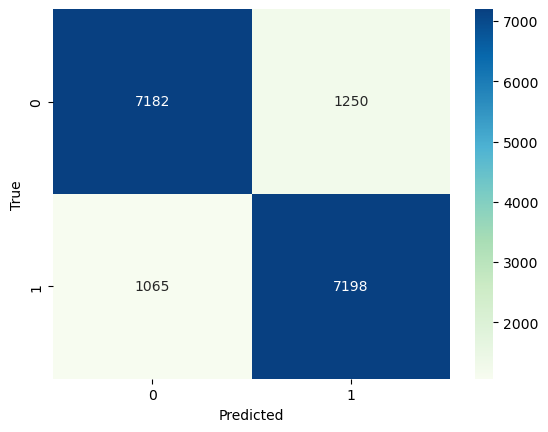

In [1653]:
modelo_4_1 = modelo_de_arbol.fit(X = x_train_1, y = y_train_1)
y_prediccion_1 = modelo_4_1.predict(x_test_1)
tabla=confusion_matrix(y_test_1, y_prediccion_1)

modelo_4_2 = modelo_de_arbol.fit(X = x_train_2, y = y_train_2)
y_prediccion_2 = modelo_4_2.predict(x_test_2)

modelo_4_3 = modelo_de_arbol.fit(X = x_train_3, y = y_train_3)
y_prediccion_3 = modelo_4_3.predict(x_test_3)

sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [1654]:
mostrar_scores(y_test_1, y_prediccion_1)
print('-------------------------')
mostrar_scores(y_test_2, y_prediccion_2)
print('-------------------------')
mostrar_scores(y_test_3, y_prediccion_3)

Accuracy: 0.8613357292602576
Recall: 0.8711121868570737
Precision: 0.8520359848484849
f1 score: 0.8614684938064747
-------------------------
Accuracy: 0.8539682539682539
Recall: 0.8455766670700714
Precision: 0.8574058166646215
f1 score: 0.8514501584206678
-------------------------
Accuracy: 0.8519916142557652
Recall: 0.8521118237928114
Precision: 0.8493365500603136
f1 score: 0.8507219235183954


In [1660]:
y_prediccion_train = modelo_4_1.predict(x_train_1)
mostrar_scores(y_train_1, y_prediccion_train)

Accuracy: 0.8583750481324606
Recall: 0.8627074688796681
Precision: 0.8528431523355381
f1 score: 0.8577469509836784


Las métricas del conjunto de train y de test son similares, por lo tanto podemos asumir que no hay overfitting.

### Búsqueda de hiperparámetros

In [1662]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

n = 100

parametros = {
  'criterion' : ['entropy'],
  'min_samples_leaf' : list(range(5,30)),
  # 'min_samples_split' : list(range(15, 100)),
  'max_depth' : list(range(90,170)),
  # 'ccp_alpha' : np.linspace(0,0.05,n)
}

randomcv = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                              param_distributions = parametros,
                              scoring=make_scorer(f1_score),
                              cv=StratifiedKFold(n_splits=5),
                              n_iter=n)

randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [90, 91, 92, 93, 94, 95,
                                                      96, 97, 98, 99, 100, 101,
                                                      102, 103, 104, 105, 106,
                                                      107, 108, 109, 110, 111,
                                                      112, 113, 114, 115, 116,
                                                      117, 118, 119, ...],
                                        'min_samples_leaf': [5, 6, 7, 8, 9, 10,
                                                             11, 12, 13, 14, 15,
                                                             16, 17, 18, 19, 20,
                                                             21, 22, 23, 24, 25,
                                                             26, 27, 28, 29]},
                   scoring=make_scorer(f1_score))

In [1663]:
print(randomcv.best_params_)
print(randomcv.best_score_)

{'min_samples_leaf': 26, 'max_depth': 97, 'criterion': 'entropy'}
0.8422598507142552


### Evaluación con el dataset de test

In [1664]:
df_test = pd.read_csv('https://drive.usercontent.google.com/download?id=1ruDne6JVJTwK0TbDNQEUfUtoxA6gVTiy&export=download&authuser=0&confirm=t&uuid=2892328a-d7d8-47c7-98e1-3e69ef723100&at=APZUnTU5aCf9tHsTaF3PM7aD9Lym:1695760323667')

df_test.shape

(26535, 31)

##### Imputación

Primero imputamos el dataset tal cual lo hicimos con el de train, sin inspeccionar casos bordes para evitar data leakage.

In [1665]:
nuevas_columnas = {
    'arrival_date_year' : 'year',
    'arrival_date_month' : 'month',
    'arrival_date_week_number' : 'week_number',
    'arrival_date_day_of_month' : 'day_of_month',
    'meal' : 'meal_type',
    'agent' : 'agent_id',
    'adr' : 'average_daily_rate'
}
df_test.rename(columns = nuevas_columnas, inplace = True)

Imputación de children, company y adults

In [1666]:
df_test['total_nights'] = df_test['stays_in_week_nights'] + df_test['stays_in_weekend_nights']
df_test['children'].fillna(0, inplace=True)
df_test['total_people'] = df_test['adults'] + df_test['children'] + df_test['babies']
df_test['meal_type'].replace(['SC', 'Undefined'], 'NoMeal', inplace=True)
df_test.drop(columns=['company'], inplace=True)

Imputación de agent id

In [1667]:
for index, row in df_test.iterrows():
    if (pd.isna(row['agent_id'])) & (row['distribution_channel'] == 'Direct'):
        df_test.loc[index, 'agent_id'] = -1

for index, row in df_test.iterrows():
    if (not pd.isna(row['agent_id'])) or (row['distribution_channel'] == 'Direct'):
        continue
    if row['hotel'] == 'City Hotel':
        if row['country'] == 'PRT':
            df_test.loc[index, 'agent_id'] = 1.0
        else: 
            df_test.loc[index, 'agent_id'] = 9.0
    else:
        df_test.loc[index, 'agent_id'] = 240.0

Imputación de country

In [1668]:
for index, row in df_test.iterrows():
    if pd.isna(row['country']) and row['deposit_type'] == 'Non Refund':
        df_test.loc[index, 'country'] = 'PRT'

for index, row in df_test.iterrows():
    if pd.isna(row['country']) and (row['market_segment'] == 'Corporate' or row['market_segment'] == 'Offline TA/TO' or row['market_segment'] == 'Direct'):
        df_test.loc[index, 'country'] = 'PRT'

In [1671]:
df_paises = df_test.copy()

df_paises['country'] = df_test['country'].apply(lambda x: x if x in list(paises_mayoritarios['country']) else 'Otros')
df_paises['agent_id'] = df_test['agent_id'].apply(lambda x: x if x in list(df_agentes_mayoritarios['agent_id']) else 'Otros')
columns.remove('is_canceled')
df_filtrado = df_paises[columns]
columns.append('is_canceled')
df_test_con_dummies = pd.get_dummies(df_filtrado, columns=dummy_columns,
                                      drop_first=True).reset_index(drop=True)

df_test_con_dummies['cuarto_correcto'] = df_paises['reserved_room_type'] == df_paises['assigned_room_type']
df_test_con_dummies['cuarto_correcto'] = df_test_con_dummies['cuarto_correcto'].apply(lambda x: 1 if x == True else 0)


# arbol = DecisionTreeClassifier().set_params(**randomcv.best_params_)
# arbol.fit(x_train,y_train)
y_pred= modelo_4_1.predict(df_test_con_dummies)


df_prediccion = pd.DataFrame(y_pred, columns=['is_canceled'])
df_prediccion['id'] = df_test['id']
df_prediccion = df_prediccion[['id', 'is_canceled']]


df_prediccion.to_csv('prediccion.csv', index=False)


In [1670]:
df_paises.shape

(26535, 32)